# A Study on Adult Income around the World (1994)

### [Adult Income Dataset](https://archive.ics.uci.edu/ml/datasets/Adult)

 Developed by:  
 Beatriz Gonçalves – 115367​ 

## Table of contents


1. [Introduction](#Introduction)

2. [Required Libraries](#Required-libraries)

3. [Data Pre-Processing (Pre-Visualization)](#Data-Pre-Processing-(Pre-Visualization))

4. [Data Visualization](#Data-Visualization)

5. [Data Pre-Processing (Pre-Supervised-Learning)](#Data-Pre-Processing-(Pre-Supervised-Learning))

5. [Supervised Learning](#Supervised-Learning)

6. [Conclusions](#Conclusions)

7. [References](#References)

***

## Introduction
[[ go back to the top ]](#Table-of-contents)    

This project concers a supervised learning problem. The main goal of this supervised learning problem is to learn how to classify examples in terms of the concept under analysis using different learning algorithms. Then they should be compared using appropriate evaluation metrics. For this particular example we will study/implement the previous for [this](https://archive.ics.uci.edu/ml/datasets/Adult) dataset.

***

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **NumPy**: Provides a fast numerical array structure and helper functions.

In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra


# Visualization

import matplotlib.pyplot as plt # plotting
from matplotlib.colors import ListedColormap # color maps
import seaborn as sns # plotting
from scipy.stats import probplot, multivariate_normal # plotting and statistics: multi-variate normal distribution
from scipy.stats import chi2_contingency # statistics: chi-square test (check for multicolinearity of categorical variables)

#Supervised Learning

from sklearn.model_selection import train_test_split # split data
from imblearn.over_sampling import SMOTE # Using SMOTE
from sklearn.model_selection import GridSearchCV # hyperparameter tuning

## Random Forest 
from sklearn.ensemble import RandomForestClassifier # random forest classifier

## Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier # neural network
import re # regular expressions
from io import StringIO  # string input/output
import sys # system functions
from sklearn.metrics import log_loss # log loss

# Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score



import warnings
warnings.filterwarnings('ignore')

***

## Data Pre-Processing (Pre-Visualization)
[[ go back to the top ]](#Table-of-contents)  

Statistics on adult salary are included in our dataset from the **1994 Census database**. About 14 columns in the data contain details about specific people, including their age, education, marital status, employment, and income. This dataset will be used to train, validate and test our model.   
Before attempting to apply any ML models, some data analysis and preprocessing is required. **Taking care of missing values, encoding categorical variables, and scaling number variables** may all be necessary.
The data must first be loaded. Then, we might print some information about the dataset to familiarize ourselves with how the data is arranged and to determine what our next course of action should be. This information might include statistics and any potential missing or repeated values. The descriptions of each column are indicated by the subjects listed below:

#### Column Description:
- **age**: Describes the age of individuals. *Continuous*.
- **workclass**: Describes the type of work an individual does:
    - Private: the person works for a private company or business;
    - Self-emp-not-inc: the person is self-employed but not incorporated;
    - Self-emp-inc: the person is self-employed and incorporated;
    - Federal-gov: the person works for the federal government;
    - Local-gov: the person works for a local government (e.g., city or county);
    - State-gov: the person works for a state government;
    - Without-pay: the person is not paid for their work (e.g., a volunteer);
    - Never-worked: the person has never worked or has not worked for a long time.
    *Categorical*.
- **fnlwgt**:  Represents a statistical weight that is used to adjust for the complex sampling design used to collect the data. It's important to understand that the fnlwgt variable is not a direct measure of the number of people in the population, and should not be interpreted as such. Also, the exact formula used to calculate the fnlwgt is not publicly available, as it is considered confidential by the US Census Bureau to protect the privacy of individuals in the dataset. *Continuous*.
- **education**: Describes the highest level of education an individual has achieved:
    - Bachelors: a bachelor's degree;
    - Some-college: some college but no degree;
    - 11th: 11th grade;
    - HS-grad: a high school diploma or equivalent;
    - Prof-school: a professional degree (e.g., MD, JD, etc.);
    - Assoc-acdm: an associate's degree in a technical or academic field;
    - Assoc-voc: an associate's degree in a trade or vocational field;
    - 9th: 9th grade;
    - 7th-8th: 7th or 8th grade;
    - 12th: 12th grade;
    - Masters: a master's degree;
    - 1st-4th: 1st, 2nd, 3rd, or 4th grade;
    - 10th: 10th grade;
    - Doctorate: a doctorate degree (e.g., PhD, EdD, etc.);
    - 5th-6th: 5th or 6th grade;
    - Preschool: a preschool education.
    *Categorical*.
- **education-num**: Describes the years spent in education in numerical form. *Continuous*.
- **marital-status**: Describes the marital status of an individual:
    - Married-civ-spouse: the person is married and a civilian spouse is present;
    - Divorced: the person is divorced;
    - Never-married: the person has never been married;
    - Separated: the person is separated;
    - Widowed: the person is widowed;
    - Married-spouse-absent: the person is married but their spouse is absent;
    - Married-AF-spouse: the person is married and their spouse is in the armed forces.
    *Categorical*.
- **occupation**: Describes the occupation of an individual:
    - Tech-support: the person provides technical support;
    - Craft-repair: the person repairs things;
    - Other-service: the person provides other services;
    - Sales: the person sells things;
    - Exec-managerial: the person manages things;
    - Prof-specialty: the person provides professional services;
    - Handlers-cleaners: the person cleans things;
    - Machine-op-inspct: the person inspects things;
    - Adm-clerical: the person provides administrative services;
    - Farming-fishing: the person farms or fishes;
    - Transport-moving: the person moves things;
    - Priv-house-serv: the person provides private household services;
    - Protective-serv: the person provides protective services;
    - Armed-Forces: the person is in the armed forces.
    *Categorical*.
- **relationship**: Describes the relationship between an individual and their spouse:
    - Wife: the person is a wife;
    - Own-child: the person is a child;
    - Husband: the person is a husband;
    - Not-in-family: the person is not in the family;
    - Other-relative: the person is some other type of relative;
    - Unmarried: the person is unmarried.
    (We can see that, although there is some overlap between the "relationship" and "marital-status" columns, they are not exactly the same thing. So, while there is some **correlation** between the two columns, they are not exactly the same thing and may provide different information for predictive modeling purposes.)
    *Categorical*.
- **race**: Refers to the race of the individual. The possible values are:
    - White: person classified as White;
    - Black: person classified as Black or African American;
    - Asian-Pac-Islander: person classified as Asian or Pacific Islander;
    - Amer-Indian-Eskimo: person classified as American Indian or Eskimo;
    - Other: person classified as Other.
    (I might add that it is important to note that the use of racial categories can be controversial and may not accurately reflect the complexity of an individual's racial or ethnic identity. Additionally, the meaning and significance of race can vary widely across different cultures and contexts.) *Categorical*
- **sex**: represents the gender of an individual. It can take two values:
    - Male: represents male gender;
    - Female: represents female gender.
    *Categorical*
- **capital-gain**: Describes the capital gains for an individual. *Continuous*.
- **capital-loss**: Describes the capital losses for an individual. *Continuous*.
- **hours-per-week**: Describes the average number of hours worked per week. *Continuous*.
- **native-country**: Describes the native country of an individual:
    - United-States
    - Cuba
    - Jamaica
    - India
    - Mexico
    - Puerto-Rico
    - Honduras
    - England
    - Canada
    - Germany
    - Iran
    - Philippines
    - Poland
    - Columbia
    - Cambodia
    - Thailand
    - Ecuador
    - Laos
    - Taiwan
    - Haiti
    - Portugal
    - Dominican-Republic
    - El-Salvador
    - France
    - Guatemala
    - Italy
    - China
    - South
    - Japan
    - Yugoslavia
    - Peru
    - Outlying-US(Guam-USVI-etc)
    - Scotland
    - Trinadad&Tobago
    - Greece
    - Nicaragua
    - Vietnam
    - Hong
    - Ireland
    - Hungary
    - Holand-Netherlands
    *Categorical*.
- **income**: Describes whether an individual makes more or less than $50,000 per year. It can take two values:
    - <=50K: the person makes less than or equal to $50,000 per year;
    - \>50K: the person makes more than $50,000 per year.  
    *Categorical*. **This is the target variable**.

In [2]:
# Loading data 
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] # column names

raw_df = pd.read_csv('adult.data', header = None, names=columns) # loading data with column names we defined above
raw_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Select information

Our first step is to select information. Since our goal is, within these listed individuals, to predict if their income is less or greater than 50K, we will select the information that we think is important and least important for this prediction (**feature selection**). 
Analyzing the meaning of each column, listed above, we decided that the "*fnlwgt*" column has no influence on the income prediction. As explained above, it works as a weighting factor in statistical analyses to account for the sampling design. Therefore, we will drop this column before training our models.

In [3]:
# Drop the fnlwgt column 
df = raw_df.drop(['fnlwgt'], axis=1)

Now, looking at the "education" column, we can see that it is highly correlated with the "education-num" column, which contains the same information but in numerical form. Including both columns in our models may lead to multicollinearity and overfitting, so we will drop one of them. 
  
In a first approach, we tried dropping the "education-num" column and leave the categorical one. Then, we encoded the "education" column using one-hot encoding. However, this feature has 16 possible values as we have seen before. This means that, after encoding, we will have 16 new columns, which will increase the dimensionality of our dataset. This, combined with the other categorical features that we have to encode, may lead to overfitting and, in addition, it will make our models harder to interpret. Therefore, in a second approach, we decided to drop the "education" column and keep the "education-num" column. This way, we will have a single column with the years of education, which will be easier to interpret and will not increase the dimensionality of our dataset.

In [4]:
# Drop the education column
df = df.drop(['education'], axis=1)

Finally, we will drop the "capital-gain" and "capital-loss" columns, as they are highly skewed: most of the values are 0. In fact, more than 91% of the values in these columns are 0, as we can see here:

In [5]:
# Count the number of 0's in the column capital-gain
count_0 = (df['capital-gain'] == 0).sum()

# Calculate the percentage of 0's in the column capital-gain
percentage_0 = (count_0 / len(df)) * 100

print(f"Percentage of 0's in capital-gain: {percentage_0}%")

Percentage of 0's in capital-gain: 91.67101747489328%


In [6]:
# Count the number of 0's in the column capital-loss
count_0 = (df['capital-loss'] == 0).sum()

# Calculate the percentage of 0's in the column capital-loss
percentage_0 = (count_0 / len(df)) * 100

print(f"Percentage of 0's in capital-loss: {percentage_0}%")

Percentage of 0's in capital-loss: 95.33490986149073%


As a result, the distribution of values in these columns is heavily skewed towards 0, and this can negatively affect the performance of some machine learning algorithms. In addition, since most of the values are 0, these columns are unlikely to have a significant impact on predicting an individual's income level. 

In [7]:
# Drop the capital-gain  and capital-loss columns
df = df.drop(['capital-gain'], axis=1)
df = df.drop(['capital-loss'], axis=1)

Let's have a look on our data after dropping these columns:

In [8]:
df.shape

(32561, 11)

So, right now, we have a dataset with 11 columns and 32561 rows. However, there are still some transformations to make.

#### Null values

In [9]:
# Data information (number of non-null values and data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
 10  income          32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


- We first saw that our dataset, after our data selection, has shape (32561, 11), that is, it has 32561 rows and 11 columns. We can see that the number of entries on the Non-Null Count column is also 32561 entries, so we can conclude that the dataset contains absolutely **no null values**;
- "age", "hours-per-week", and "education-num" are **integer** columns;
- There are no float datatypes in the dataset;
- "workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country" and "income" are of **object** datatypes;
- Although the dataset does not contain any null values, a closer look tells us that there are a lot of '*?*' values in our dataset. We will have to **replace those values by null values and then drop them**.

Let's have a closer look on the columns that contain the '*?*' values:

In [10]:
print(df['workclass'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [11]:
print(df['occupation'].unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [12]:
print(df['native-country'].unique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [13]:
# Replace the ? with null values (NaN)
df.replace(' ?', np.nan, inplace=True)

Now that we replaced the '*?*' values by null values, we can check the sum of null values in each column:

In [14]:
print(df.isna().sum())

age                  0
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
income               0
dtype: int64


Let's drop the null values:

In [15]:
# Drop the rows with missing values
df.dropna(inplace=True)

# Check if there are any missing values
print(df.isna().sum())

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64


#### Repeated Rows

In this case, we won't drop the repeated rows. It is very common to have repeated rows in datasets like this one, that contains demographic information. If I have two individuals with very similar characteristics, it doesn't necessarily mean that one of them is a duplicate of the other. In fact, it is very likely that they are two different individuals. Therefore, we will not drop the repeated rows.

#### Brief statistical summary of the dataset 

In [16]:
# Shape of the data
df.shape

(30162, 11)

We can see that after dropping the null values, our dataset has shape (30162, 11), that is, it has 30162 rows and 11 columns. Comparing this number with the original number of rows (32561), we can see that we dropped 2399 rows. This is a significant number, but it was necessary since they contained null values and wouldn't be useful for our analysis. We also decided by not substituting the null values by the mean or median of the column, since this would have a significant impact on the distribution of the data.

In [17]:
# Data information (number of non-null values and data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education-num   30162 non-null  int64 
 3   marital-status  30162 non-null  object
 4   occupation      30162 non-null  object
 5   relationship    30162 non-null  object
 6   race            30162 non-null  object
 7   sex             30162 non-null  object
 8   hours-per-week  30162 non-null  int64 
 9   native-country  30162 non-null  object
 10  income          30162 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.8+ MB


Now, yes, we can say that we have absolutely no null values in our dataset. Let's have a look on the brief statistical summary of the dataset:

In [18]:
df.describe(include = 'all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30162.0,NaN,NaN,NaN,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0
workclass,30162,7,Private,22286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,30162.0,NaN,NaN,NaN,10.121312,2.549995,1.0,9.0,10.0,13.0,16.0
marital-status,30162,7,Married-civ-spouse,14065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30162,14,Prof-specialty,4038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30162,6,Husband,12463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30162,5,White,25933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30162,2,Male,20380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,30162.0,NaN,NaN,NaN,40.931238,11.979984,1.0,40.0,40.0,45.0,99.0
native-country,30162,41,United-States,27504,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For **numeric data**, the result’s index will include **count**, **mean**, **std**, **min**, **max** as well as **lower**, **50** and **upper** **percentiles**. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.  
As we already saw, there are only three columns with numeric data: **age**, **hours-per-week**, and **education-num**. Analysing the results we can conclude that:  

- The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 37;
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours;
- The minimum and maximum number of years of education is 1 and 16 years respectively, while the average number of years of education is 10.


For **object data** (e.g. strings), the result’s index will include **count**, **unique**, **top**, and **freq.** The top is the most common value. The freq is the most common value’s frequency.   

If *include='all'* is provided as an option, the result will include a union of attributes of each type. This is why we get null values when applying the indexes  **count**, **mean**, **min**, **max** as well as **lower**, **50** and **upper** **percentiles** to object data or when we apply  **count**, **unique**, **top**, and **freq.** to numeric data.

We can see the dataset, in terms of our target variable, is extremelly **unbalanced**. From the 30162 entries, about 22654 are <=50K. This way, it is crucial to address class imbalance in the dataset before building machine learning models. (We will do this when preparing the data for the models).

***

## Data Visualization

[[ go back to the top ]](#Table-of-contents)  

Before we do any other kind of transformation to our data, let's **visually analyse** it.
In the previous section we analysed some of the data provided and made a few changes in order to easily have a better approach for the problem (feature selection and data pre-processing). Now, we will provide some different types of graphics and plots for a user friendly comprehension of the data to study. It's always good to actually know our data before working further with it, and this is the main purpose of this section.

#### Target Variable Distribution
We start by analysing the distribution of the target variable, the **income**.

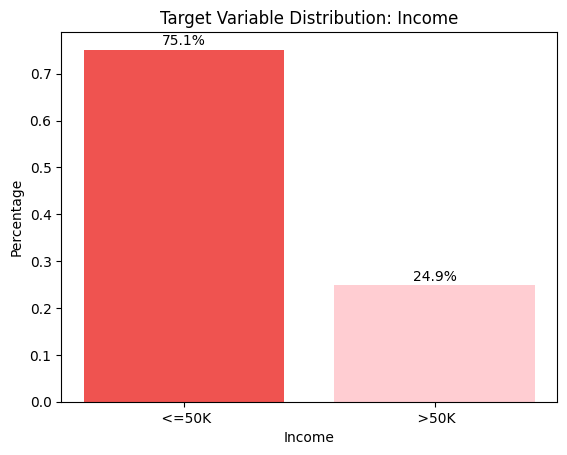

In [19]:
# Define custom colors for the colormap
colors = ['#FFCDD2', '#EF5350'] # dark red and light red

# Plot the target variable distribution
counts = df['income'].value_counts(normalize=True) # normalize=True to get the proportion of each class
fig, ax = plt.subplots() # create a figure and axes object

# Define a colormap with custom colors
cmap = ListedColormap(colors)

# Create the bar plot
ax.bar(counts.index, counts.values, color=cmap(counts.values / counts.values.max())) 

# Add percentage labels
for i, v in enumerate(counts.values):
    ax.text(i, v + 0.01, '{:.1%}'.format(v), ha='center')

# Add title and axis labels
ax.set_title('Target Variable Distribution: Income')
ax.set_xlabel('Income')
ax.set_ylabel('Percentage')

plt.show()

Once again, we can see how unbalanced our dataset is. We have **75.1%** of the entries with income **<=50K** and **24.9%** with income **>50K**. This is a very important information to keep in mind when training our models.

### Numerical Variables

Let's now have a look on the distribution of the numerical variables: **age**, **education-num**, and **hours-per-week**.

#### Age Density Distribution

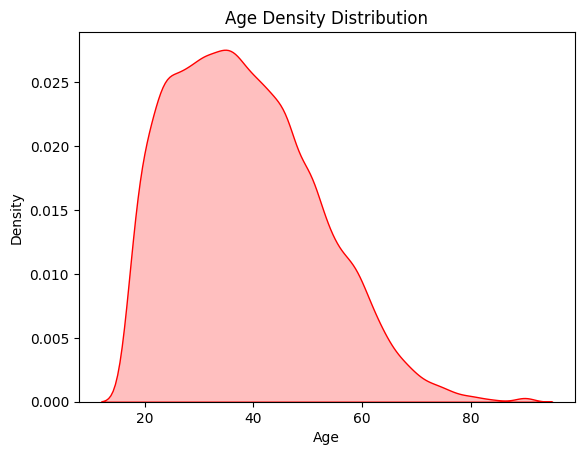

In [20]:
# Create a density plot of the age variable
sns.kdeplot(df['age'], shade=True, color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Density Distribution')

# Display the plot
plt.show()

From the age density plot, we can see that the distribution of age in the dataset is roughly bell-shaped with a **peak around 35-40 years old**, and then gradually decreases as the age increases or decreases. This may suggest that there are more middle-aged individuals in the dataset compared to younger or older individuals.  
  
Let's have a look on the **'age' distribution for each income level**:

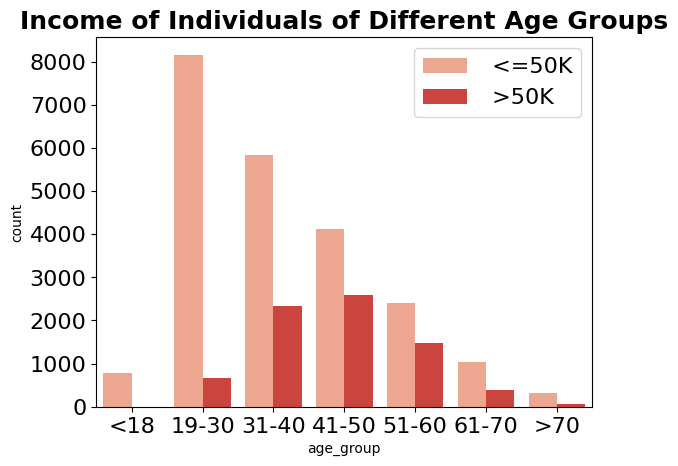

In [21]:
# Define the age bins and labels
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['<18', '19-30', '31-40', '41-50', '51-60', '61-70', '>70']

# Create the age group column using the cut method
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Plot the income distribution for each age group
sns.countplot(x='age_group', hue='income', data=df, palette='Reds', order=labels)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [22]:
# Drop the age_group column we created for visualization
df = df.drop(['age_group'], axis=1)

The graph shows the distribution of income across different age groups. We can see that people in the age groups of **31-50** have the highest number of individuals earning **>50K** income.  For the people of age group **41-50** and **51-60**, the number of people earning **more than 50K** is quite **comparable** to those earning **less than it**.
The age group of age **<18** and **greater than 70** have the lowest number of individuals earning **>50K** income. Also, we can say that the number of people earning more than 50K is quite **negligible** amongst people of age groups **19-30** adn **61-70**. Finally, we can also observe that for all age groups, there are more individuals earning <=50K income than >50K income.

#### Education-num Density Distribution

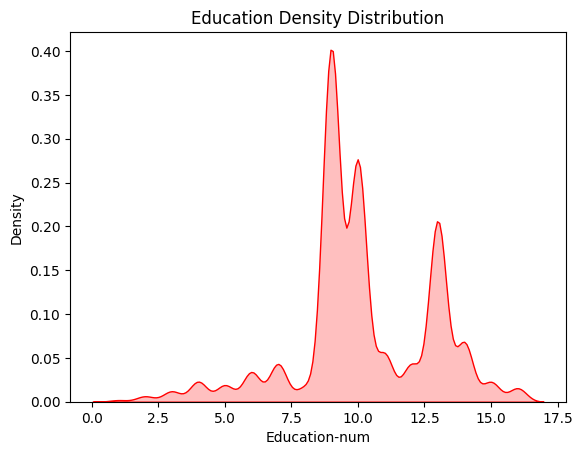

In [23]:
# Create a density plot of the age variable
sns.kdeplot(df['education-num'], shade=True, color='red')

# Add labels and title
plt.xlabel('Education-num')
plt.ylabel('Density')
plt.title('Education Density Distribution')

# Display the plot
plt.show()

The plot shows that the education level is **bimodal**, with peaks around the values 9 and 13, indicating that there are more individuals in the dataset with education levels of 9 and 13.  
  
Bimodal is a term used to describe a distribution with two peaks or modes. In a bimodal distribution, the frequency of values is concentrated around two different values or ranges of values, creating two distinct peaks in the histogram or density plot. A bimodal distribution is often an indication that there are two subpopulations or groups within the data that have different characteristics or behaviors. 
  
In this case, value 9 corresponds to a high school diploma or equivalent, while the value 13 corresponds to a Bachelor's degree. Therefore, this plot suggests that the dataset has a large number of individuals with a high school diploma or Bachelor's degree.  
  
Let's have a look on the **'education-num' distribution for each income level**:

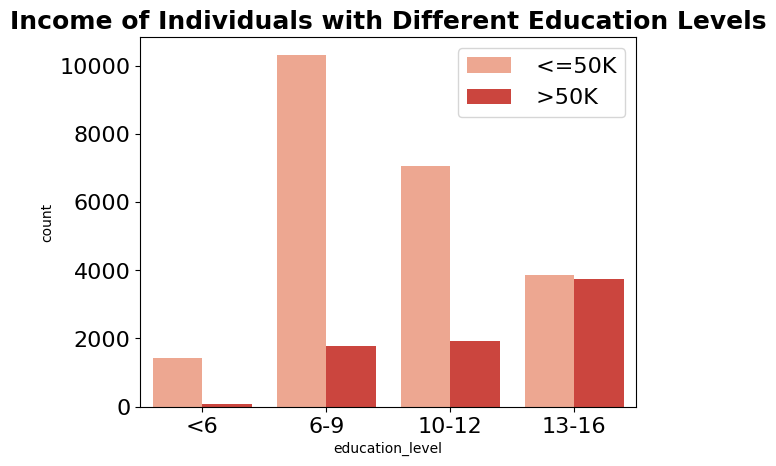

In [24]:
# Define the education levels and labels
bins = [0, 5, 9, 12, 16]
labels = ['<6', '6-9', '10-12', '13-16']

# Create the education level group column using the cut method
df['education_level'] = pd.cut(df['education-num'], bins=bins, labels=labels)

# Plot the income distribution for each education level group
sns.countplot(x='education_level', hue='income', data=df, palette='Reds', order=labels)
plt.title('Income of Individuals with Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [25]:
# Drop the education_level column we created for visualization
df = df.drop(['education_level'], axis=1)

From the plot, we can see that individuals with **higher education levels** (i.e., those in the 10-12, 13-16 education level groups) have a **higher proportion of high-income earners** compared to those with lower education levels. Additionally, individuals with lower education levels (i.e., those in the <6, 6-9 education level groups) have a higher **proportion** of low-income earners compared to those with higher education levels.

Overall, this plot suggests that education level is an important predictor of income, with higher education levels generally associated with higher income levels.

#### Hours-per-week Density Distribution

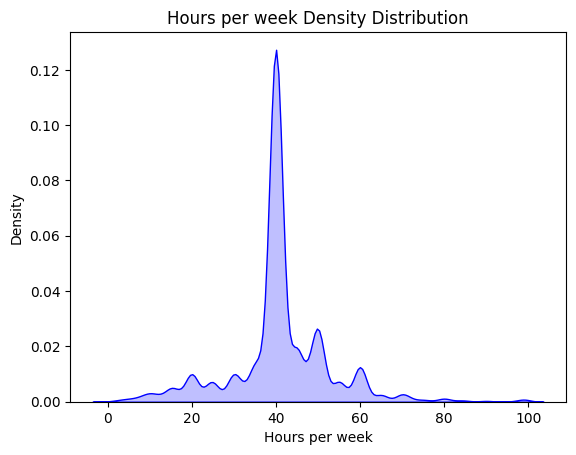

In [26]:
# Create a density plot of the age variable
sns.kdeplot(df['hours-per-week'], shade=True, color='blue')

# Add labels and title
plt.xlabel('Hours per week')
plt.ylabel('Density')
plt.title('Hours per week Density Distribution')

# Display the plot
plt.show()

From the graph, we can see that the majority of individuals work between 35 to 45 hours per week. The distribution is skewed towards the left, indicating that **there are more individuals who work fewer hours per week** than those who work more. There are also small bumps in the distribution around 50 and 60 hours per week, indicating that **there is a subset of individuals who work longer hours**.  
  
Let's have a look on the hours per week distribution for each income level:

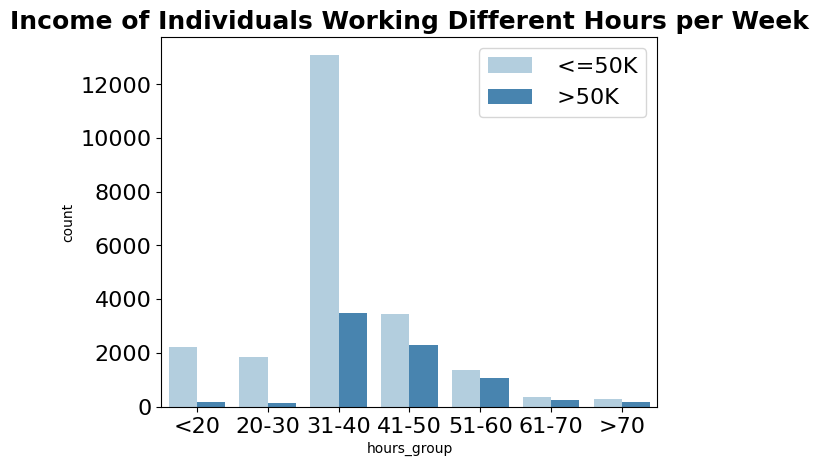

In [27]:
# Define the hours per week bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['<20', '20-30', '31-40', '41-50', '51-60', '61-70', '>70']

# Create the hours per week group column using the cut method
df['hours_group'] = pd.cut(df['hours-per-week'], bins=bins, labels=labels)

# Plot the income distribution for each hours per week group
sns.countplot(x='hours_group', hue='income', data=df, palette='Blues', order=labels)
plt.title('Income of Individuals Working Different Hours per Week', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [28]:
# Drop the hours_group column we created for visualization
df = df.drop('hours_group', axis=1)

We can see that the majority of individuals who work between 31-40 hours per week earn less than 50K per year. However, as the number of hours worked per week increases, the **proportion** of individuals earning more than 50K per year also increases. This trend is particularly noticeable for those working **more than 50 hours per week**, where a **higher proportion of individuals earn more than 50K** per year compared to those working fewer hours.  
  
Let's have a look on the 'hours-per-week' distribution using a **boxplot**:

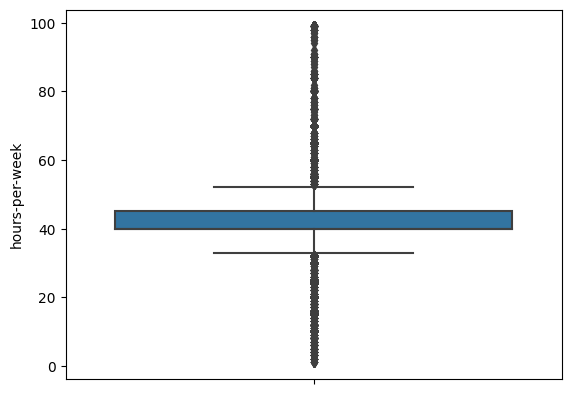

In [29]:
# Select the numerical variable of interest
num_var = 'hours-per-week'

# Create a dataframe with the numerical variable
data = df[num_var]

# Plot the vertical boxplot for the variable
sns.boxplot(y=num_var, data=df)
plt.ylabel(num_var)
plt.show()


From the plot, we can see that the median hours-per-week value is around 40, with the middle 50% of values falling between around 35 and 50 hours per week. The plot also shows a number of outliers on the high end of the range, indicating that there are individuals in the dataset who work significantly more than the median number of hours per week. There's also a number of outliers on the low end of the range, indicating that there are individuals in the dataset who work significantly less than the median number of hours per week.

By plotting this boxplot we found that there's a better aproach than using the "hours-per-week" feature directly, that is to **group** the values into **categories**:

In [30]:
# Define the bin edges and labels for the categories
bin_edges = [0, 30, 60, np.inf]
bin_labels = ['<30', '30-60', '>60']

# Use pd.cut() function to create a new column called "hours"
df['hours'] = pd.cut(df['hours-per-week'], bins=bin_edges, labels=bin_labels)

# Drop the original "hours-per-week" column
df.drop('hours-per-week', axis=1, inplace=True)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,native-country,income,hours
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,30-60
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,<30
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,30-60
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,30-60
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,30-60
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,30-60
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,30-60
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,30-60
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,<30


This way, by transforming the "**hours-per-week**" feature into a **categorical feature**, we can reduce the number of final features when doing the one-hot encoding. This will be useful when we prepare the data for the models.

### Checking for outliers of numerical variables

So, now, we only have two numerical variables: age, and education-num. To check for numerical data outliers, we will use, one more time, the **boxplot**. The boxplot is a very useful tool for visualizing the **distribution of data**, as we saw with the "hours-per-week" variable. It is a very simple and intuitive way to **detect outliers**. It presents information from a five-number summary: the **minimum**, **first quartile**, **median**, **third quartile**, and **maximum**. This way, it can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped, and if and how our data is skewed.

Let's have a look on the boxplots of the numerical variables:

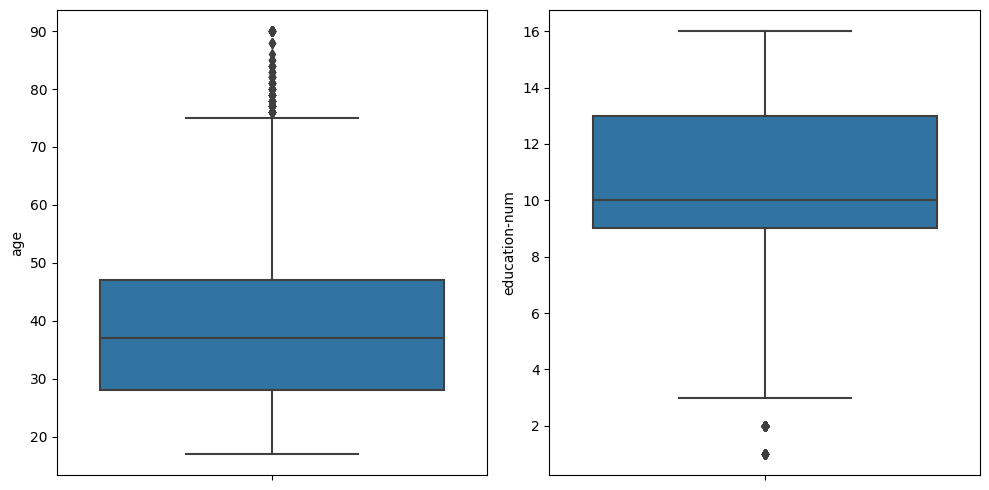

In [31]:
# Select the numerical variables of interest
num_vars = ['age', 'education-num']

# Create a dataframe with the numerical variables
data = df[num_vars]

# Plot side by side vertical boxplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(num_vars), figsize=(10,5))
for i, var in enumerate(num_vars):
    sns.boxplot(y=var, data=data, ax=axes[i])
    axes[i].set_ylabel(var)
plt.tight_layout()
plt.show()

The "age" plot shows a number of **outliers on the high end of the range**, indicating that there are some individuals in the dataset who are significantly older than the median age.

For the "education-num variable", the plot also shows a relatively symmetrical distribution with only a small number of outliers (two) on the low end of the range. This suggests that the majority of individuals in the dataset have a relatively similar education level.  
  
We will create a new dataset without those outliers that we identified here and, later, we will compare the results of our models with and without these outliers, to measure the effect these have on the models.

#### 1st Hypothesis) Mahalanobis Distance

One first approach we could try is using the **Mahalanobis distance**. This is a known way of detecting outliers. The Mahalanobis distance is a **measure of the distance between a point and a distribution**. It is a generalization of the idea of **Euclidean distance to multiple dimensions**. It is used to **detect outliers in multivariate data**.   

However,there's an important thing we need to have in mind before applying the Mahalanobis distance: it assumes that the data follows a **multivariate normal distribution**, and that the **covariance matrix is representative of the population**. If these assumptions are not met, the method may not be effective in detecting outliers.

This way, let's start by verifying if our data follows a multivariate normal distribution. To check this, we will simply do a **multivariate normal probability plot**: we will do this for both of the numerical features (age and education-num). If the data follow a multivariate normal distribution, the **points on the plot will follow a straight line**.

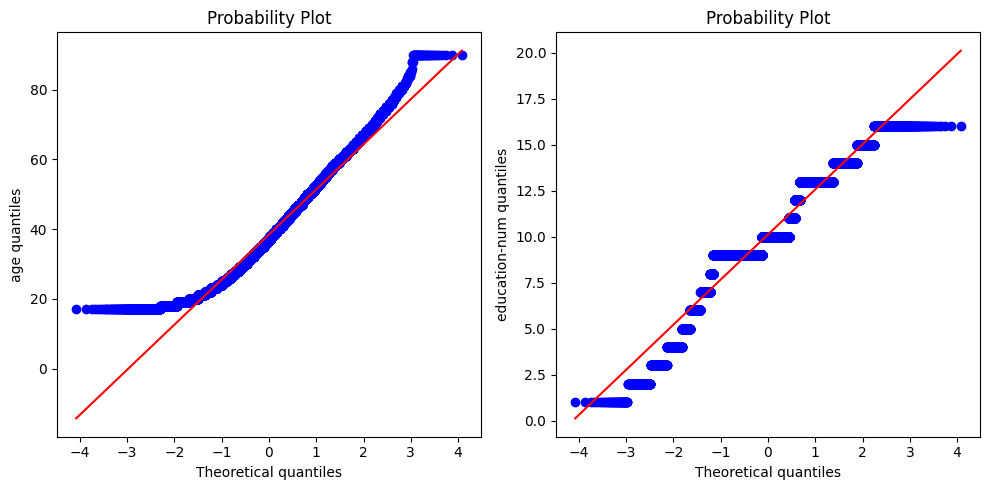

In [32]:
# Select the numerical variables of interest
num_vars = ['age', 'education-num']

# Create a dataframe with the numerical variables
data = df[num_vars]

# Check if the data follow a multivariate normal distribution
mu = data.mean()
cov = data.cov()
rv = multivariate_normal(mean=mu, cov=cov)
samples = rv.rvs(size=len(data))

# Create separate univariate probability plots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(num_vars), figsize=(10,5))
for i, var in enumerate(num_vars):
    probplot(data[var], plot=axes[i])
    axes[i].set_xlabel('Theoretical quantiles')
    axes[i].set_ylabel(f'{var} quantiles')
plt.tight_layout()
plt.show()

Since the probability plots for age and education-num do not follow a straight line, it suggests that the **data does not follow a multivariate normal distribution**, and the Mahalanobis distance may **not be** an appropriate method to identify outliers for these features.

#### 2nd Hypothesis) Winsorization and Removal of Outliers

Removing all outliers identified from the dataset would result in a loss of almost 3000 entries, and influence the distribution of the data. This is a significant amount of data and we would like to **avoid losing as much data as possible**.  An alternative is **winsorizing** the data: this involves replacing the extreme values with the nearest non-extreme value. This method can help **preserve the distribution** of the data and **prevent distortion**.   
We will **winsorize** the "**age**" column. However, as we saw from the boxplot of the "**education-num**" column, there are only two outliers, so we will simply **remove** this ones, since it wont affect the distribution of the data, nor lose a significant amount of information. To remove them we will use the **Interquartile Rule** (IQR rule). First, we calculate the first quartile (q1), third quartile (q3), and interquartile range (iqr) of the 'education-num' variable. Next, we calculate the lower and upper bounds for outliers using the IQR rule, which states that **any data point below $q1-1.5*iqr$ or above $q3+1.5*iqr$ is considered an outlier**.
To finish, we create a new dataset without the outliers, which we call "df_no_outliers".

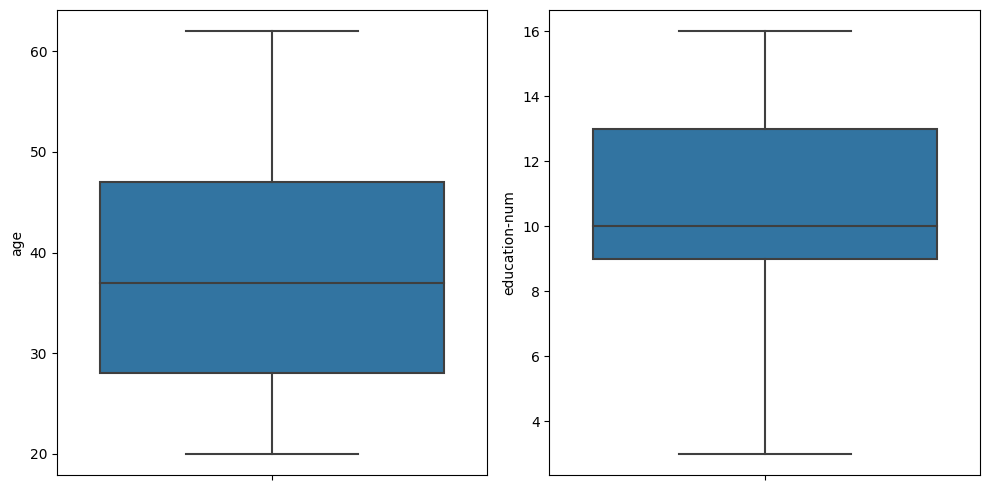

In [33]:
from scipy.stats.mstats import winsorize

# Calculate the lower and upper bounds for 'education-num'
q1 = df['education-num'].quantile(0.25)
q3 = df['education-num'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove the outliers from 'education-num'
df_no_outliers = df[(df['education-num'] >= lower_bound) & (df['education-num'] <= upper_bound)]

# Update the 'age' column in the new dataframe
df_no_outliers.loc[:, 'age'] = winsorize(df_no_outliers['age'], limits=[0.05, 0.05])

# Select the numerical variables of interest
num_vars = ['age', 'education-num']

# Create a dataframe with the numerical variables
data = df_no_outliers[num_vars]

# Plot side by side vertical boxplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(num_vars), figsize=(10,5))
for i, var in enumerate(num_vars):
    sns.boxplot(y=var, data=data, ax=axes[i])
    axes[i].set_ylabel(var)
plt.tight_layout()
plt.show()

Now, we can check the boxplots of the numerical variables again, to see if the outliers were removed, and if the distribution of the data was preserved, which was done with success.

In [34]:
# Shape of the dataframe without outliers
df_no_outliers.shape

(29966, 11)

### Categorical Variables

Let's now have a closer look on the categorical features:

#### Income Distribution by Marital Status	

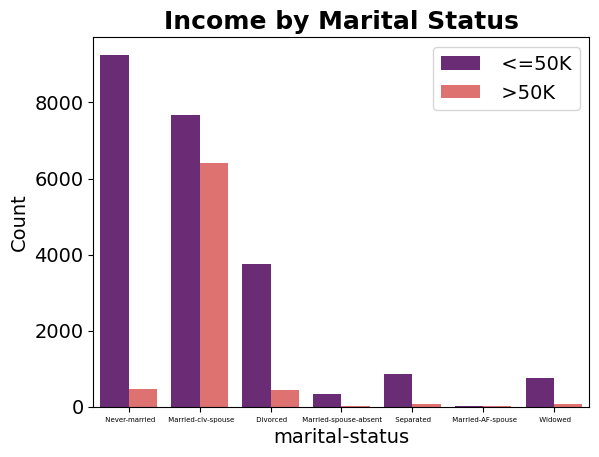

In [35]:
# Plot the income distribution for each education level
sns.countplot(x='marital-status', hue='income', data=df, palette='magma')
plt.title('Income by Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('marital-status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=5)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

It appears that **married** individuals have a **higher proportion of individuals earning more than 50K** compared to other categories. We also have to note that most of the individuals in this dataset fall into this category (about 14065). It also seems that individual in the category "**Married-spouse-absent**" and "**Married-AF-spouse**" have the **lowest proportion of individuals earning more than 50K**.

**Normalizing** the marital-status feature before plotting can help to better compare the **proportion** of individuals with income greater than 50K across the different categories of marital-status:

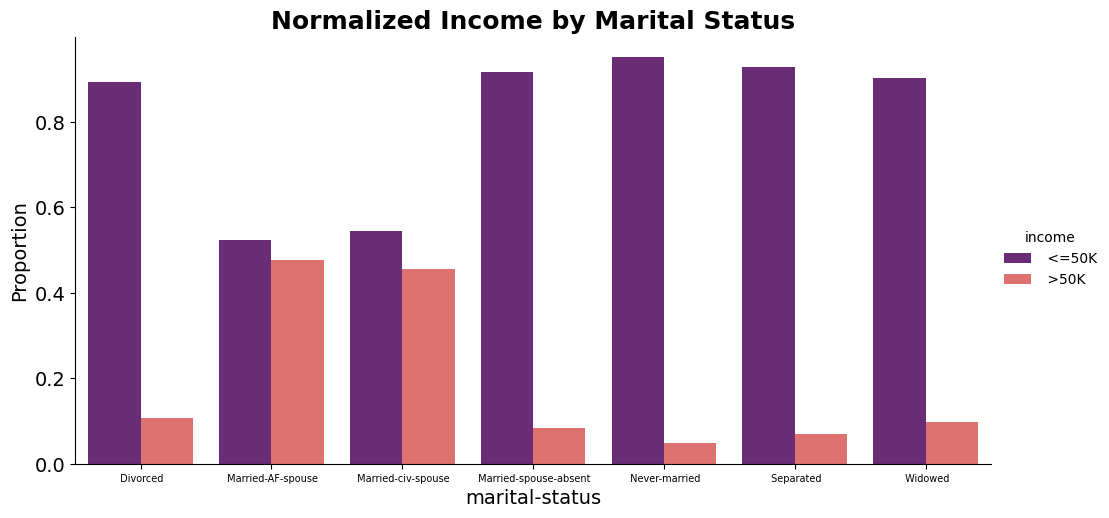

In [36]:
# Calculate the normalized value counts for each education level and income level
maritalstat_income_counts = df.groupby(['marital-status'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
maritalstat_income_counts = maritalstat_income_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each education level
sns.catplot(x='marital-status', y='proportion', hue='income', data=maritalstat_income_counts, kind='bar', height=5, aspect=2, palette='magma')
plt.title('Normalized Income by Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('marital-status', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(fontsize=7)
plt.yticks(fontsize=14)
plt.show()

We can see that individuals who are "**married-AF-spouse**" have the **highest proportion of individuals earning more than 50K**, followed by individuals who are "**married-civ-spouse**". This suggests that being married is associated with higher income levels. However, we should also keep in mind that **correlation does not necessarily imply causation**, and there may be other factors at play. On the other hand, individuals who have **never been married, separated and whose spouse is absent** have the **lowest proportion of individuals earning more than 50K**.

#### Income Distribution by Relationship

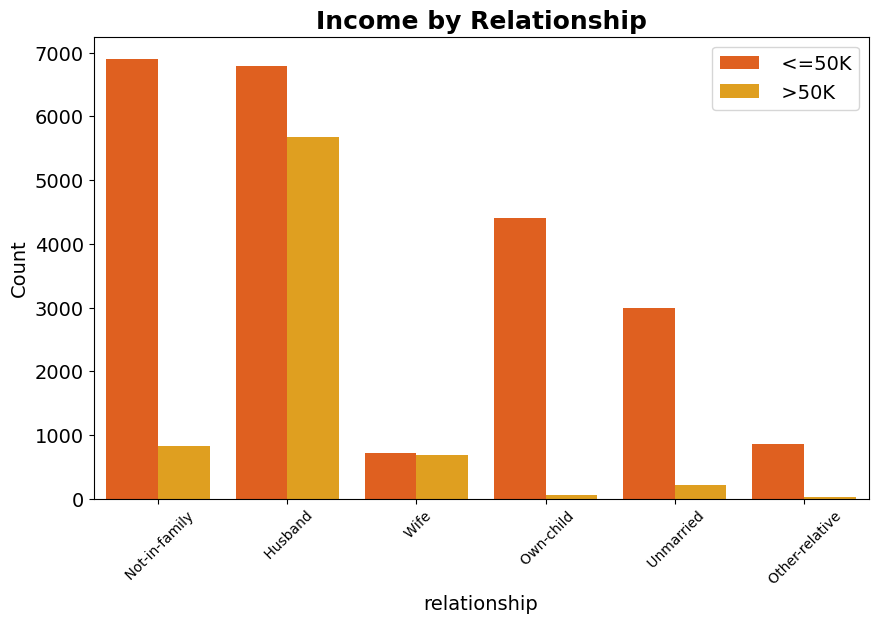

In [37]:
# Plot the income distribution for each relationship 
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=df, palette='autumn')
plt.title('Income by Relationship', fontsize=18, fontweight='bold')
plt.xlabel('relationship', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

We can see that the majority of individuals in the dataset are either husbands or not in a family, and the **majority of individuals with an income over 50K are husbands or wives**. 

As usual, **normalizing** the "relationship" feature before plotting can help us compare the income distribution across different categories by accounting for the fact that some categories may have more individuals than others.

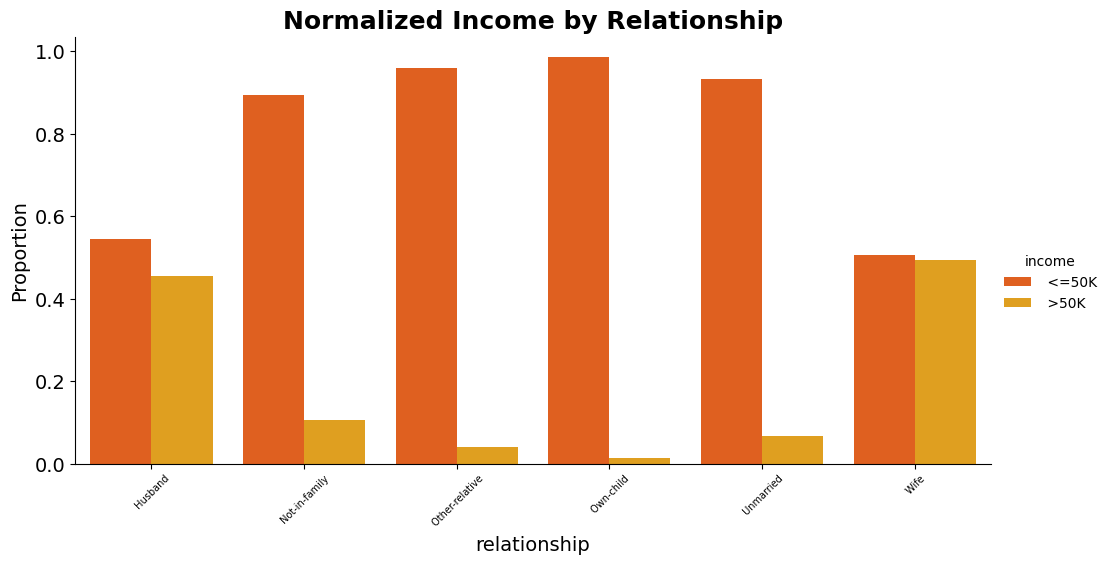

In [38]:
# Calculate the normalized value counts for each education level and income level
relationship_income_counts = df.groupby(['relationship'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
relationship_income_counts = relationship_income_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each education level
sns.catplot(x='relationship', y='proportion', hue='income', data=relationship_income_counts, kind='bar', height=5, aspect=2, palette='autumn')
plt.title('Normalized Income by Relationship', fontsize=18, fontweight='bold')
plt.xlabel('relationship', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(fontsize=7, rotation=45)
plt.yticks(fontsize=14)
plt.show()

We can see that some relationship categories have a higher proportion of individuals with incomes greater than 50K than others. For example, **individuals classified as husbands and wives have a higher proportion of incomes greater than 50K** compared to other categories such as unmarried, not in family, and other relative.

#### Income Distribution by Gender

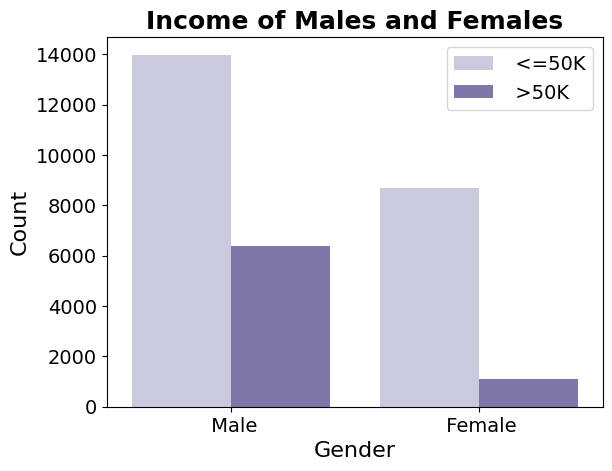

In [39]:
# Plot the income distribution for each gender
sns.countplot(x='sex', hue='income', data=df, palette='Purples')
plt.title('Income of Males and Females', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

We should be aware that this graph can be **misleading**. When we looked at the dataset statistics, we saw that the **number of males was much higher than the number of females** (about 20380 out of a total of 30162 individuals). To be able to draw conclusions from the income distribution by gender and the existence of a gender income gap, we must therefore normalize our data to the "sex" feature before plotting the graph.

But from this one we can definitely conclude that there is a significant difference in income between males and females **in the dataset**. The graph shows that there are more males than females in the high-income category but there's is also a higher number of males with an income lower than 50K.

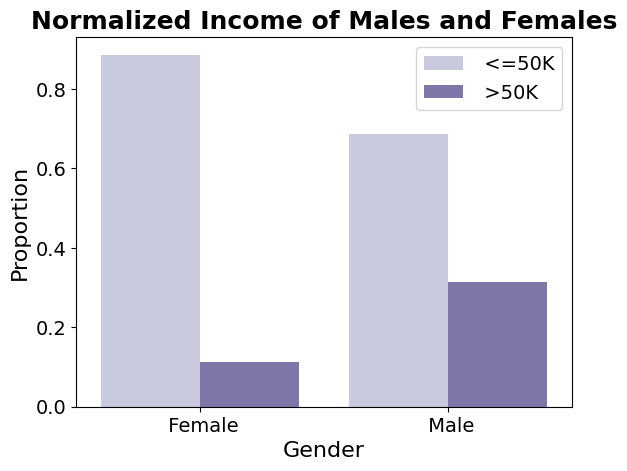

In [40]:
# Calculate the normalized value counts for each gender
gender_counts = df.groupby('sex')['income'].value_counts(normalize=True)

# Plot the normalized income distribution for each gender
sns.barplot(x=gender_counts.index.get_level_values(0), y=gender_counts.values, hue=gender_counts.index.get_level_values(1), palette='Purples')
plt.title('Normalized Income of Males and Females', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

Now, we can take more accurate conclusions about income distribution per gender. 
We can see that there is a **larger proportion of females than males in the low income category**, and a **larger proportion of males than females in the high income category**. This suggests that there may be a gender income gap. However, we cannot make any definitive conclusions about the existence or magnitude of the income gap without further analysis of the different features in the dataset. This way, from now on, to understand and outsand the **magnitude of the income gender gap** we will visualize the different features and then **distinguish the gender for each feature**.

#### Income Distribution by Hours per Week

Now, our "hours" feature is categorical, so we will use the **bar plot** to visualize the income distribution by hours per week:

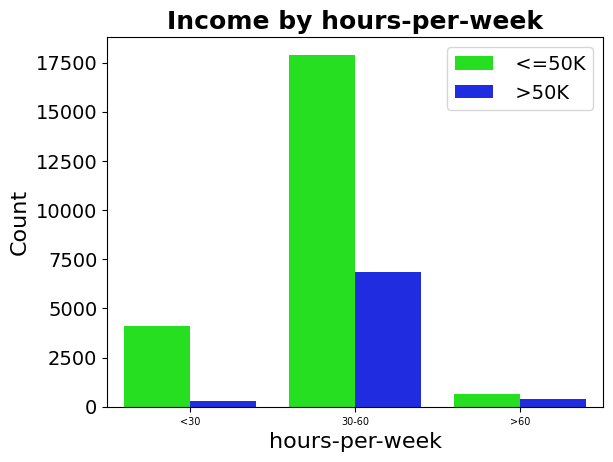

In [41]:
# Plot the income distribution for each gender
sns.countplot(x='hours', hue='income', data=df, palette='hsv')
plt.title('Income by hours-per-week', fontsize=18, fontweight='bold')
plt.xlabel('hours-per-week', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=7)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

We can see that our dataset has more individuals that work **30-60 hours per week**. We can also see that the **proportion of individuals with an income greater than 50K is higher for individuals working more than 30 hours per week**. This suggests that working more hours per week may be associated with higher income levels. However, as in our previous visualizations, we should normalize our data before taking any conclusions:

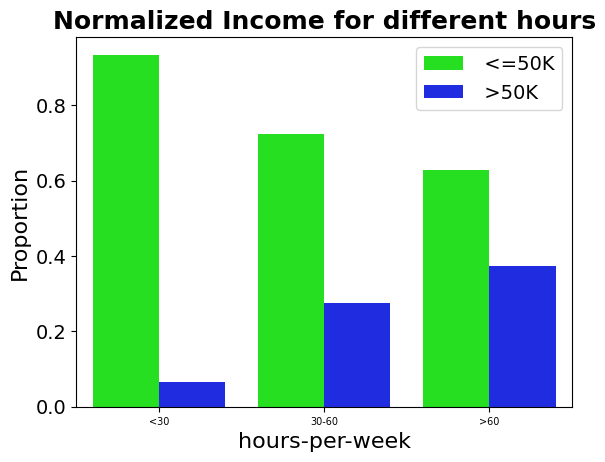

In [42]:
# Calculate the normalized value counts for each gender
hours_counts = df.groupby('hours')['income'].value_counts(normalize=True)

# Plot the normalized income distribution for each gender
sns.barplot(x=hours_counts.index.get_level_values(0), y=hours_counts.values, hue=hours_counts.index.get_level_values(1), palette='hsv')
plt.title('Normalized Income for different hours', fontsize=18, fontweight='bold')
plt.xlabel('hours-per-week', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.xticks(fontsize=7)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

The plot shows that as the **number of hours per week increases**, the **proportion of individuals earning more than 50K per year also increases**. Additionally, for each category of hours per week, there are **more individuals earning less than 50K per year than those earning more** than 50K per year. This indicates that the dataset is imbalanced towards the lower income bracket, as we already stated.  
  
Now, let's compare this also by gender. We want to check if, working the same hours per week, there's still a gap on the income of males and females:

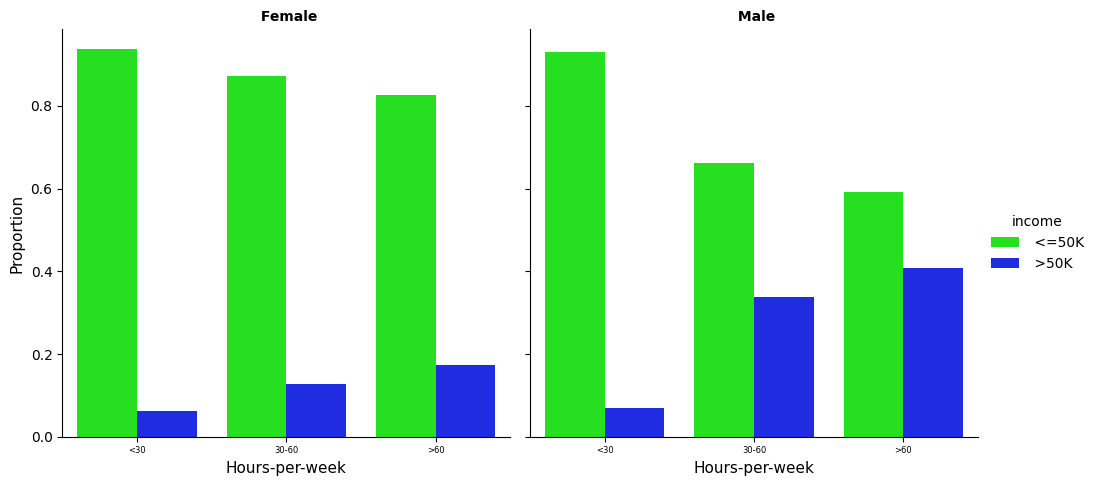

In [43]:
# Calculate the normalized value counts for each race and gender
hours_gender_counts = df.groupby(['hours', 'sex'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
hours_gender_counts = hours_gender_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each race and gender
g = sns.catplot(x='hours', y='proportion', hue='income', col='sex', data=hours_gender_counts, kind='bar', palette='hsv', sharex=True)
g.set_axis_labels('Hours-per-week', 'Proportion', fontsize=11)
g.set_xticklabels(fontsize=6)
g.set_titles(col_template="{col_name}", fontsize=16, fontweight='bold')

plt.show()

From the plot, it is possible to see that, for both males and females, those who work more hours per week tend to have a higher proportion of people earning more than $50K. However, there are some differences in the income distribution between genders and hours-per-week groups. That is, for males, the proportion of people earning more than $50K is higher when comparing with the same "hours" group for the females.
These differences suggest that gender and hours-per-week may have an impact on income, and should be considered when building predictive models for income.

#### Income Distribution by Ethnic Group

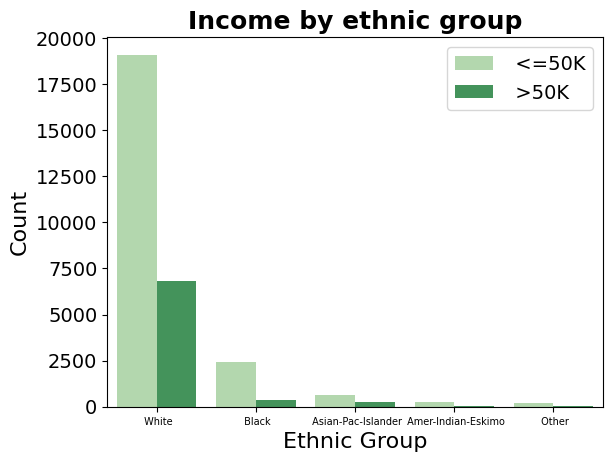

In [44]:
# Plot the income distribution for each ethnic group
sns.countplot(x='race', hue='income', data=df, palette='Greens')
plt.title('Income by ethnic group', fontsize=18, fontweight='bold')
plt.xlabel('Ethnic Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=7)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

We can observe that the White ethnic group has the highest count of individuals earning more than 50K, followed by the Asian-Pac-Islander group. On the other hand, the Amer-Indian-Eskimo and Other ethnic groups have the lowest count of individuals earning more than 50K.

We should normalize the race feature before plotting because the counts of individuals in each ethnic group is not the same, and this could lead to a biased interpretation of the results. Normalizing the feature ensures that each ethnic group is represented proportionally, which allows for a fair comparison of the income distribution across ethnic groups.

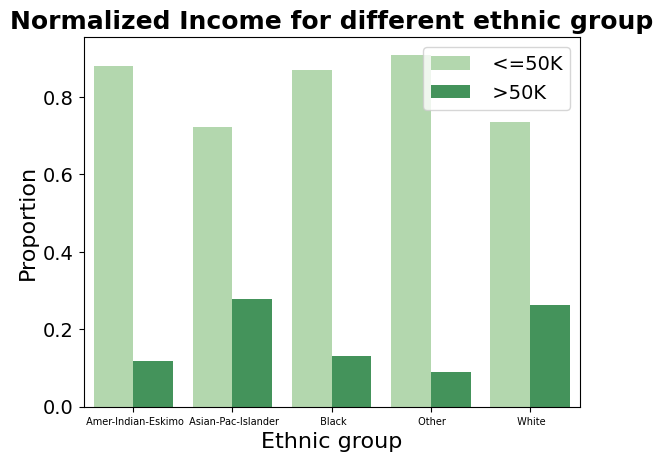

In [45]:
# Calculate the normalized value counts for each ethnic group
gender_counts = df.groupby('race')['income'].value_counts(normalize=True)

# Plot the normalized income distribution for each ethnic group
sns.barplot(x=gender_counts.index.get_level_values(0), y=gender_counts.values, hue=gender_counts.index.get_level_values(1), palette='Greens')
plt.title('Normalized Income for different ethnic group', fontsize=18, fontweight='bold')
plt.xlabel('Ethnic group', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.xticks(fontsize=7)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

We can more clearly see that there are **significant income differences between different ethnic groups**. For example, individuals from the Asian-Pac-Islander and White ethnic groups are more likely to have income greater than 50K, while individuals from the Black and Amer-Indian-Eskimo groups are less likely to have income greater than 50K.  
  
Let's now distinguish by ethnicity and gender:

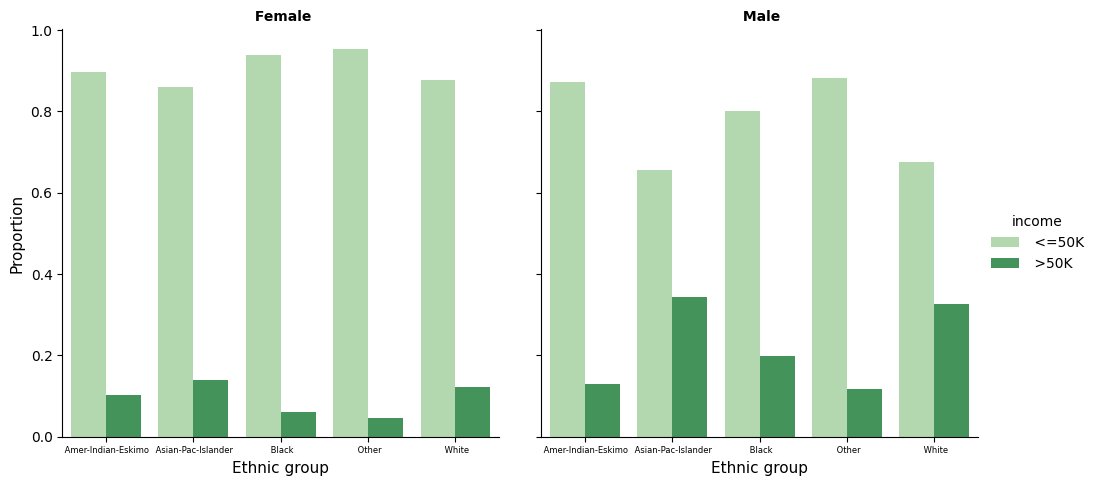

In [46]:
# Calculate the normalized value counts for each race and ethnic group
race_gender_counts = df.groupby(['race', 'sex'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
race_gender_counts = race_gender_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each race and ethnic group
g = sns.catplot(x='race', y='proportion', hue='income', col='sex', data=race_gender_counts, kind='bar', palette='Greens', sharex=True)
g.set_axis_labels('Ethnic group', 'Proportion', fontsize=11)
g.set_xticklabels(fontsize=6)
g.set_titles(col_template="{col_name}", fontsize=16, fontweight='bold')

plt.show()

We can see that there are significant differences in income between different ethnicities and genders. For example, among **females**, those in the **White** and **Asian/Pacific Islander** categories have a **higher proportion of high-income** earners compared to other ethnic groups. Among **males**, also those in the **White** and **Asian/Pacific Islander** categories have a **higher proportion of high-income earners**, however this proportion is higher for males than females.
  
Again, can conclude that there is a significant **gender gap** in income, with a higher proportion of males in the high-income category compared to females. This trend is observed across **all ethnic groups in the dataset**.

Furthermore, we can observe that the gender gap is more pronounced in some ethnic groups than others. For example, in the White and Asian/Pacific Islander groups, the gap between males and females is wider than in the other ethnic groups.

Overall, the plots suggest that there are disparities in income by both gender and ethnic group, and these disparities may intersect and compound one another.

#### Income Distribution by Workclass

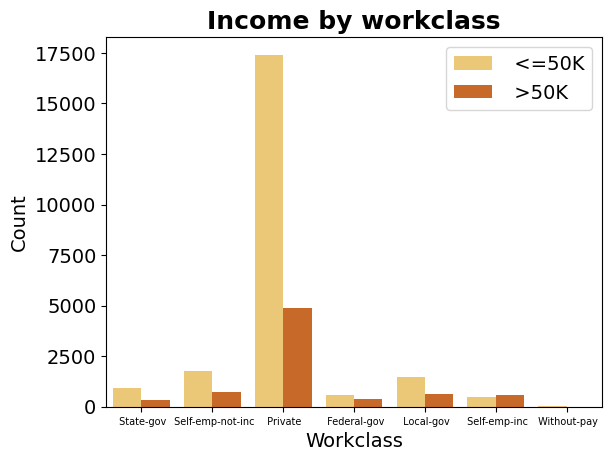

In [47]:
# Plot the income distribution for each workclass
sns.countplot(x='workclass', hue='income', data=df, palette='YlOrBr')
plt.title('Income by workclass', fontsize=18, fontweight='bold')
plt.xlabel('Workclass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=7)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

We can see that the majority of individuals work in the **Private** workclass, and a large proportion of them earn less than or equal to 50K. On the other hand, individuals in the **Self-emp-inc workclass** have a **higher likelihood of earning over 50K**. We can clearly see that there is a substantial income disparity between different workclasses.

Again, **normalizing** the workclass feature allows us to compare the income distribution of each workclass on a level playing field, without being biased towards workclasses that have a larger number of samples. This makes it easier to compare and draw conclusions about the income distribution of different workclasses. Let's have a look at the normalized income distribution by workclass:

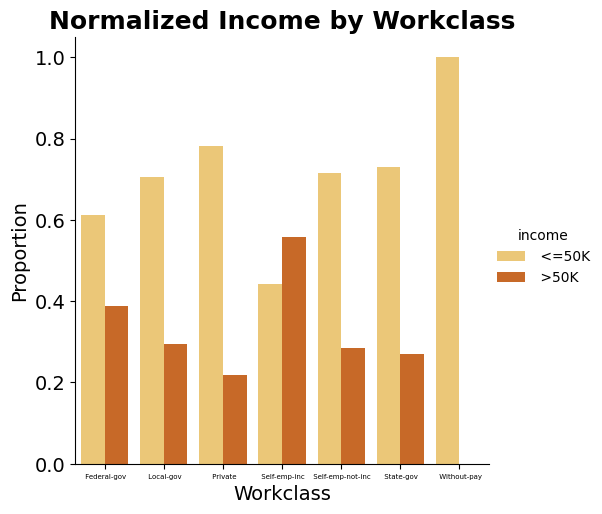

In [48]:
# Calculate the normalized value counts for each workclass and income level
workclass_income_counts = df.groupby(['workclass'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
workclass_income_counts = workclass_income_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each workclass
sns.catplot(x='workclass', y='proportion', hue='income', data=workclass_income_counts, kind='bar', palette='YlOrBr')
plt.title('Normalized Income by Workclass', fontsize=18, fontweight='bold')
plt.xlabel('Workclass', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(fontsize=5)
plt.yticks(fontsize=14)
plt.show()

Now, we can conclude that there are significant differences in income levels among different workclasses. We can see that some workclasses such as '**Self-emp-inc**' and '**Federal-gov**' have a **higher proportion of people with income above 50k**, while others like '**Private**' and '**Self-emp-not-inc**' have a **lower proportion**.  
  
As before, let's distinguish by wokclass but also gender:

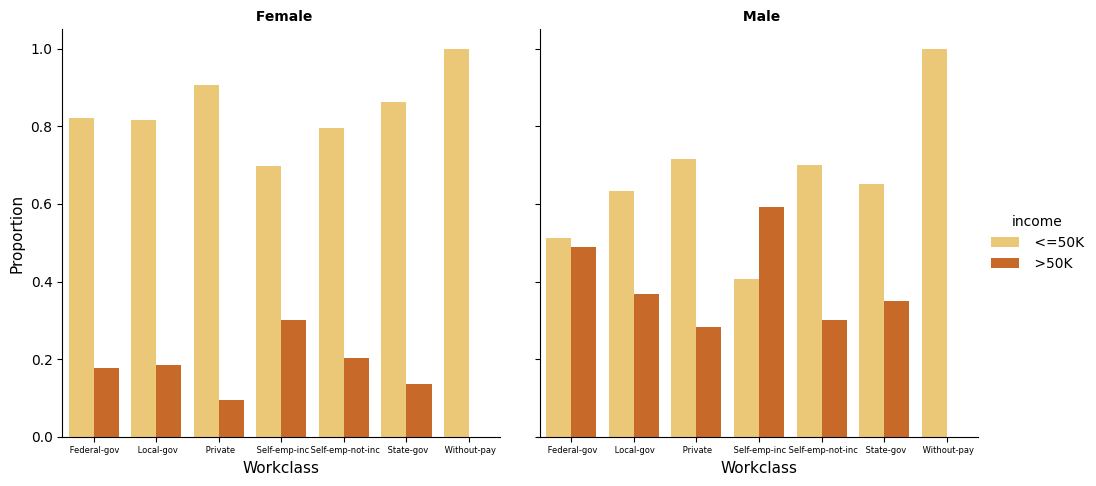

In [49]:
# Calculate the normalized value counts for each workclass, gender, and income level
workclass_gender_income_counts = df.groupby(['workclass', 'sex'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
workclass_gender_income_counts = workclass_gender_income_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each workclass and gender
g = sns.catplot(x='workclass', y='proportion', hue='income', col='sex', data=workclass_gender_income_counts, kind='bar', palette='YlOrBr', sharex=True)
g.set_axis_labels('Workclass', 'Proportion', fontsize=11)
g.set_xticklabels(fontsize=6)
g.set_titles(col_template="{col_name}", fontsize=16, fontweight='bold')

plt.show()

One more time, we can see that there are significant disparities. For example, **in almost all workclass categories, a higher proportion of males earn more than 50K** compared to females. Additionally, for some workclass categories such as **Private** and **Self-emp-not-inc**, the **proportion of males earning more than 50K is significantly higher than the proportion of females**. This suggests that there may be gender-based income disparities in certain occupations or work environments.    
  
We've already noticed some gender discrepancies in the previous visualizations, but comparing the gender together with different features (such as workclass, education, etc) may help us see these disparities more clearly.

#### Income Distribution by Occupation

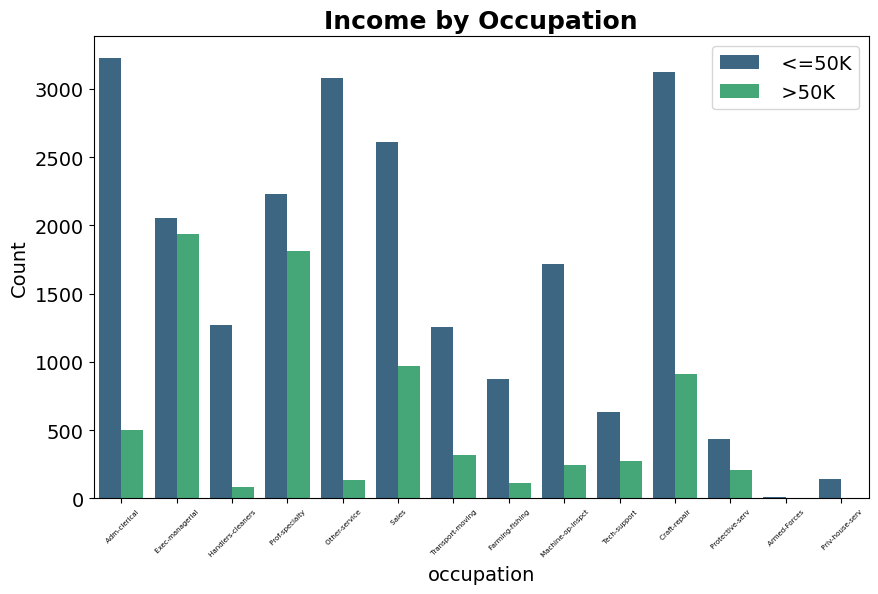

In [50]:
# Plot the income distribution for each education level
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=df, palette='viridis')
plt.title('Income by Occupation', fontsize=18, fontweight='bold')
plt.xlabel('occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

We can conclude that individuals in the **executive/managerial** and **professional specialty** occupations have a **higher proportion of individuals earning more than 50K**. Conversely, individuals in the **Armed-Forces** and **private household service** occupations have the **lowest proportion of individuals earning more than 50K**.  
  
Once more, **normalizing** the occupation feature before plotting is important because different occupations may have significantly different numbers of individuals in the dataset. By normalizing the values, we can compare the proportion of individuals in each occupation that earn more than 50K, rather than simply comparing the raw counts. This allows for a more accurate comparison of the income distributions across different occupations.

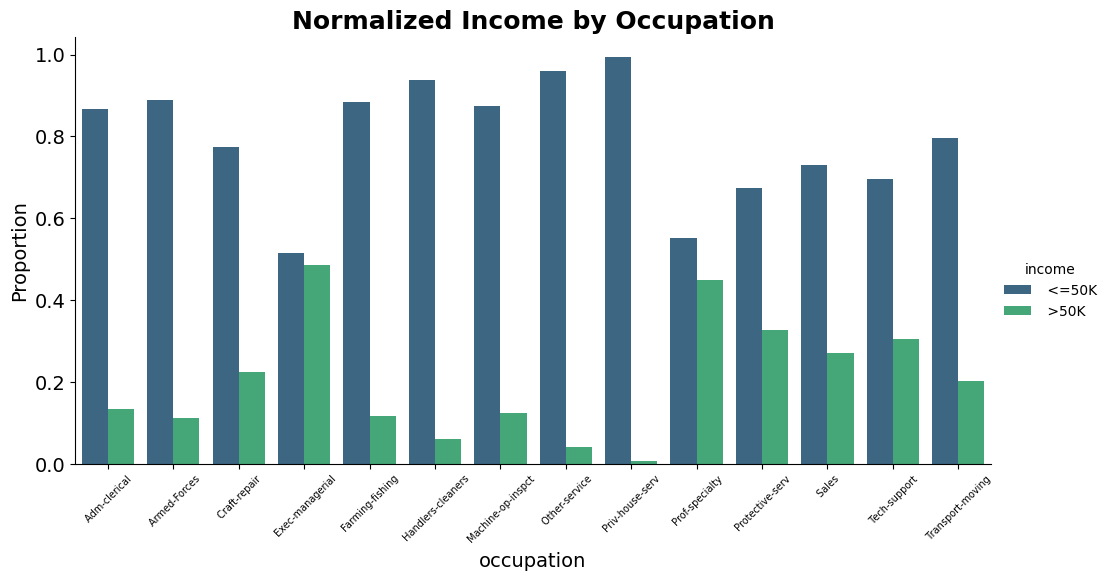

In [51]:
# Calculate the normalized value counts for each occupation and income level
occupation_income_counts = df.groupby(['occupation'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
occupation_income_counts = occupation_income_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each occupation
sns.catplot(x='occupation', y='proportion', hue='income', data=occupation_income_counts, kind='bar', height=5, aspect=2, palette='viridis')
plt.title('Normalized Income by Occupation', fontsize=18, fontweight='bold')
plt.xlabel('occupation', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(fontsize=7, rotation=45)
plt.yticks(fontsize=14)
plt.show()

We can see that individuals in the **executive/managerial** and **professional specialty** occupations have a higher proportion of individuals earning **more than 50K**. Conversely, individuals in the **private household service** and **other-service** occupations have the **lowest proportion of individuals earning more than 50K**.  
  
Again, let's add the comparison between genders:

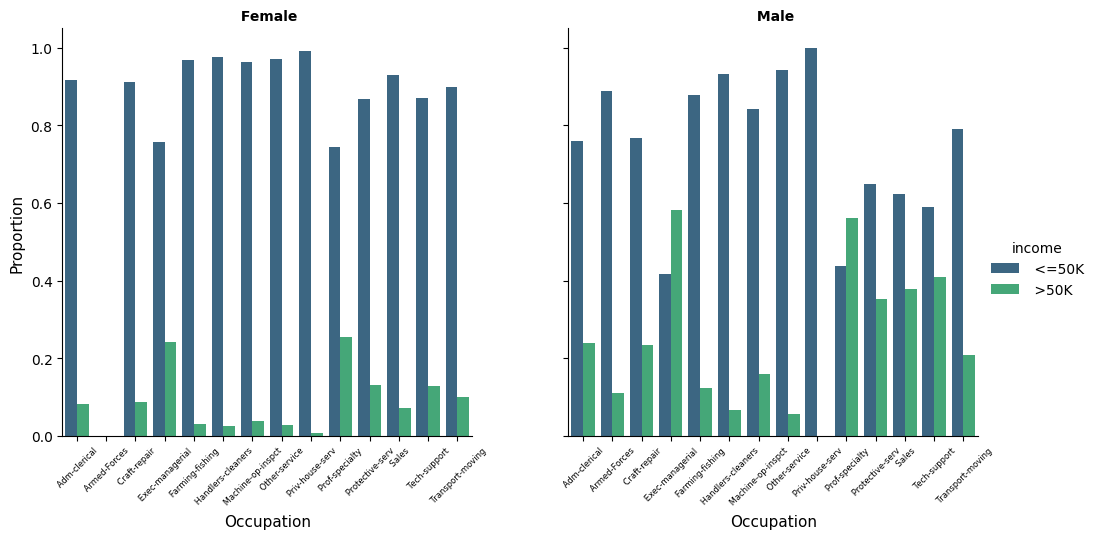

In [52]:
# Calculate the normalized value counts for each workclass, gender, and income level
occupation_gender_income_counts = df.groupby(['occupation', 'sex'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
occupation_gender_income_counts = occupation_gender_income_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each workclass and gender
g = sns.catplot(x='occupation', y='proportion', hue='income', col='sex', data=occupation_gender_income_counts, kind='bar', palette='viridis', sharex=True)
g.set_axis_labels('Occupation', 'Proportion', fontsize=11)
g.set_xticklabels(rotation=45, fontsize=6)
g.set_titles(col_template="{col_name}", fontsize=16, fontweight='bold')


plt.show()

We can see that the proportion of individuals who **earn more than 50K is generally higher among males than females** across all occupations, except for "Other-Service" where the proportions are similar for both genders.
Among **females**, the proportion of those who earn more than 50K is generally **highest in the "Exec-managerial" and "Prof-specialty"** occupations, as it is for the **males**.
The "**Farming-fishing**" and "**Priv-house-serv**" occupations have the highest proportion of individuals who earn **less than or equal to 50K** across both genders.

#### Income Distribution by Native Country

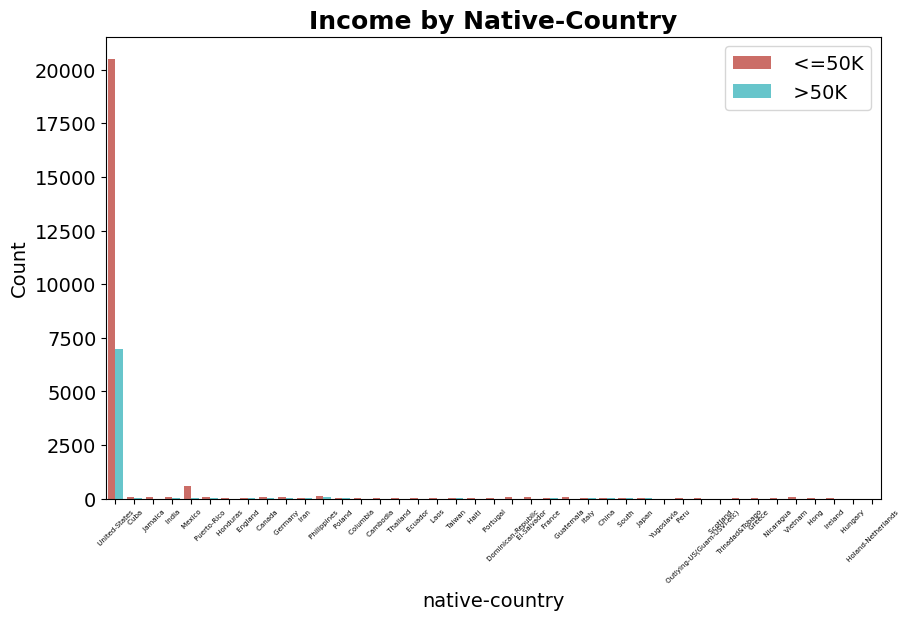

In [53]:
# Plot the income distribution for each native country
plt.figure(figsize=(10, 6))
sns.countplot(x='native-country', hue='income', data=df, palette='hls')
plt.title('Income by Native-Country', fontsize=18, fontweight='bold')
plt.xlabel('native-country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

We can observe that the majority of people in the dataset are from the United States. We already saw this when we did a brief statistical analysis of the dataset (about 27504 indidividual are from the US). The majority of people in each country have an income less than 50K. 

**Normalizing** the "native-country" feature will help us with further conclusions. Let's have a look at the normalized income distribution by native country:

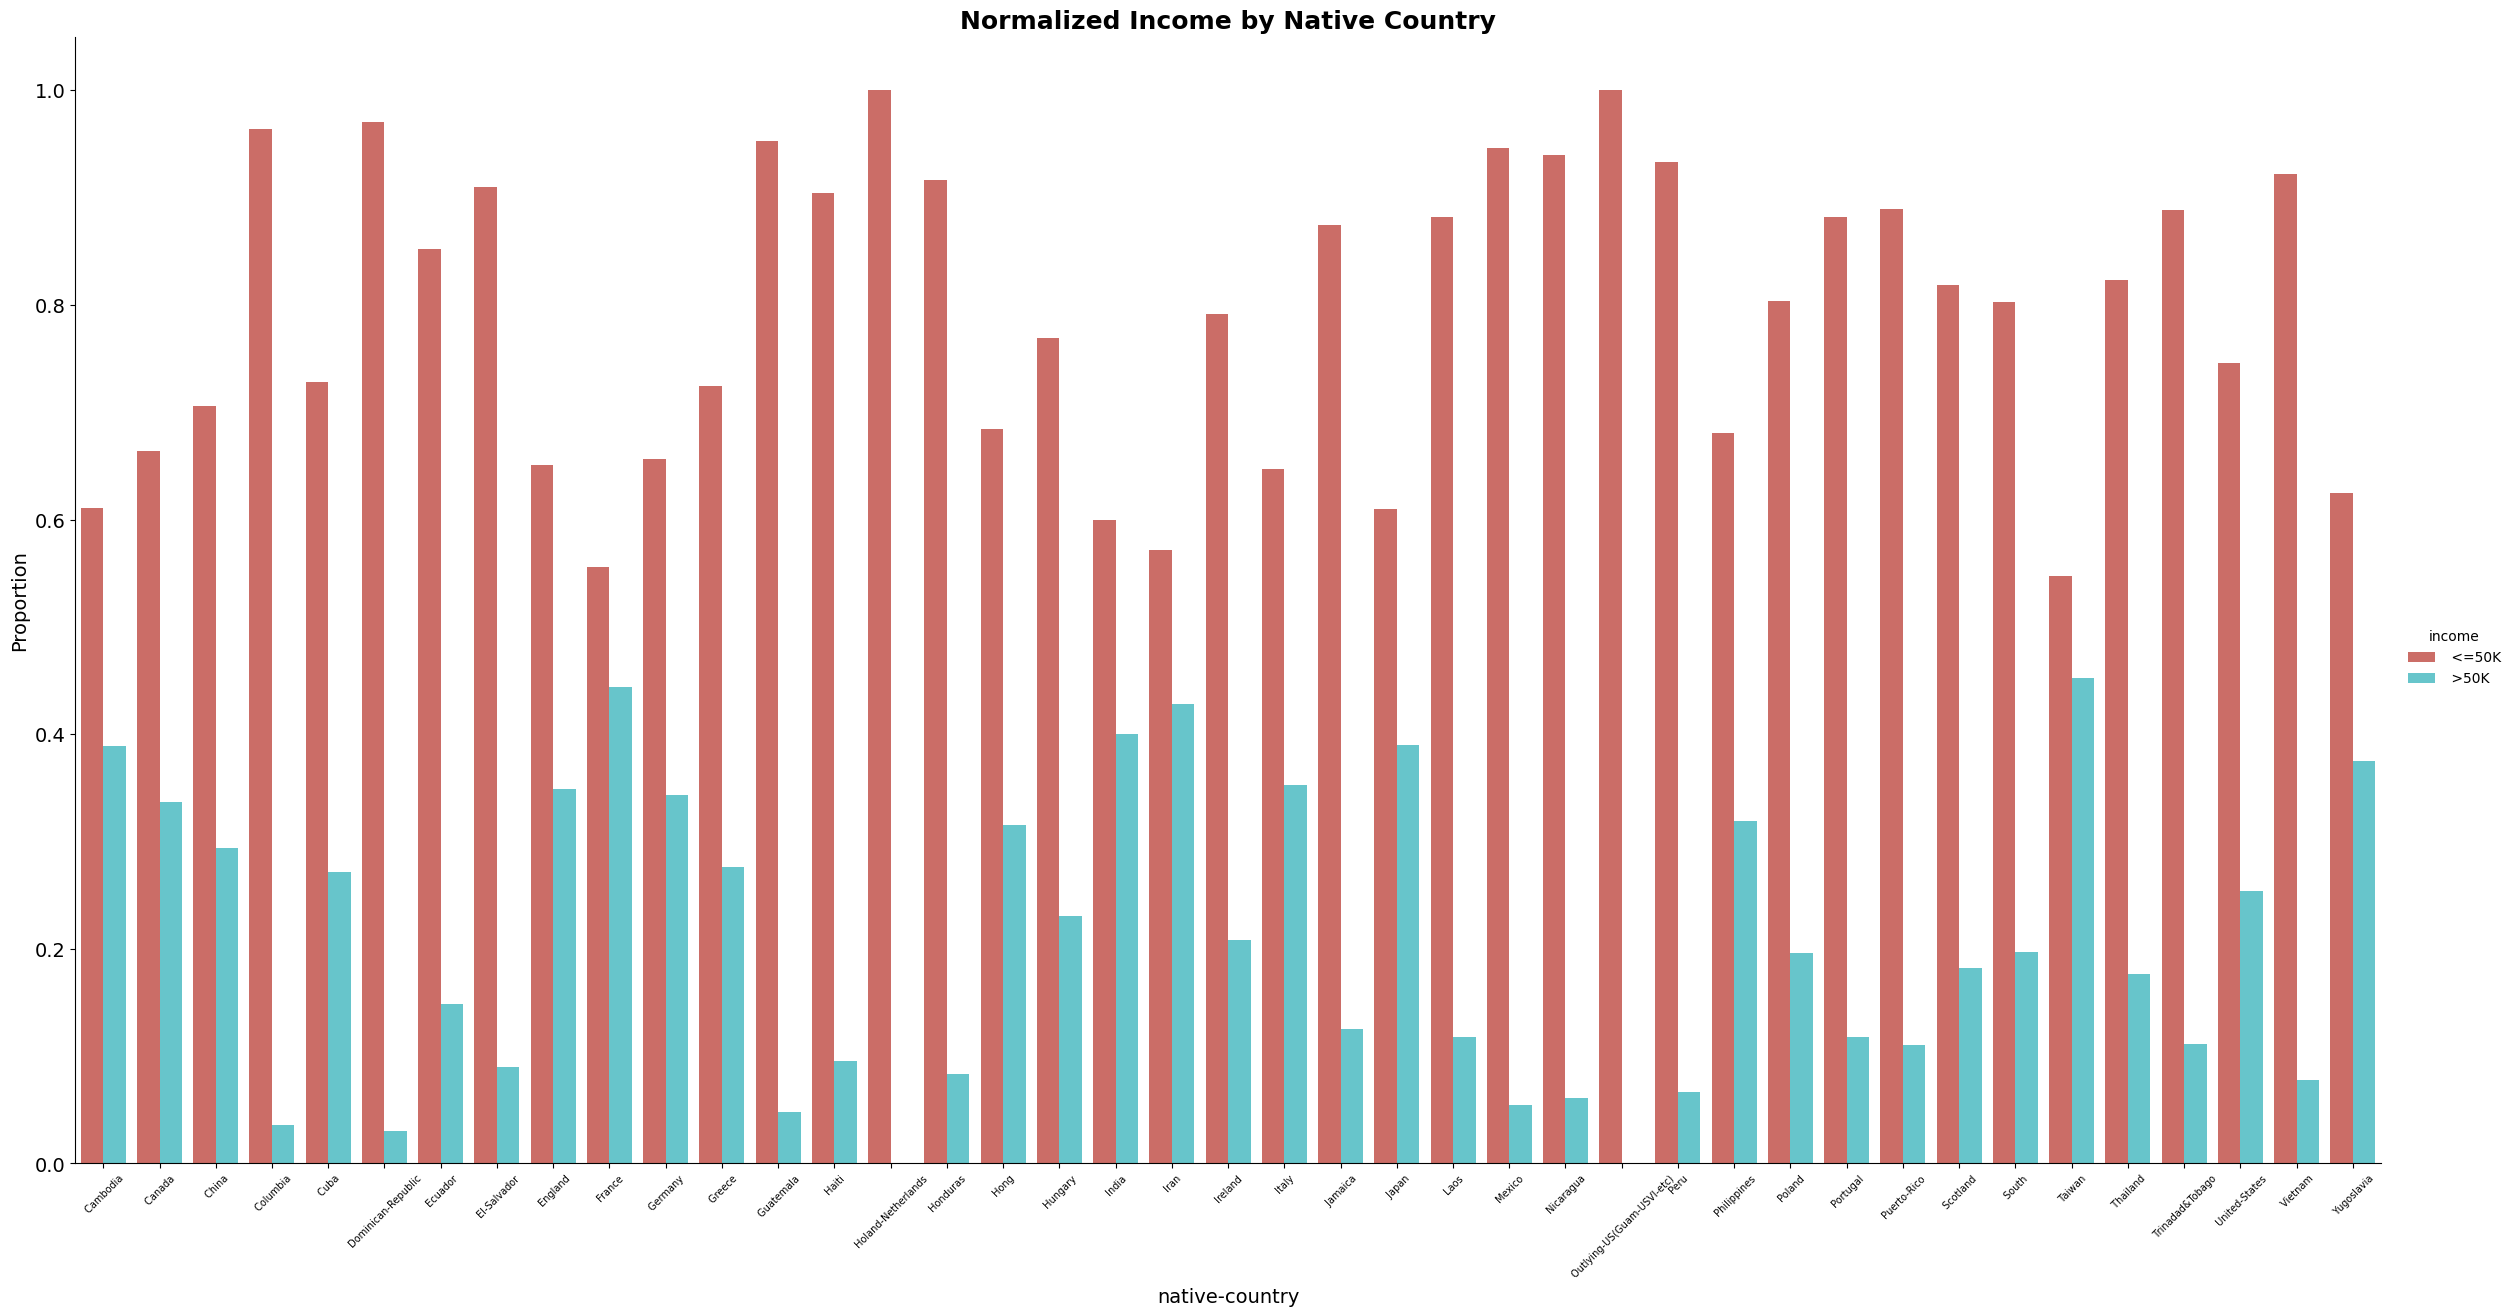

In [54]:
# Calculate the normalized value counts for each native country and income level
occupation_income_counts = df.groupby(['native-country'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
occupation_income_counts = occupation_income_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each education level
sns.catplot(x='native-country', y='proportion', hue='income', data=occupation_income_counts, kind='bar', height=12, aspect=2, palette='hls')
plt.title('Normalized Income by Native Country', fontsize=18, fontweight='bold')
plt.xlabel('native-country', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(fontsize=7, rotation=45)
plt.yticks(fontsize=14)
plt.show()

Now, we can see more clearly that there are **significant differences in the income distribution across different native countries**. For example, countries like Iran, India, and Taiwan have a higher proportion of people with an income greater than or equal to 50K compared to countries like Outlying US (Guam-USVI-etc), Dominican Republic, and Columbia.

Once again, let's also add the comparison between genders:

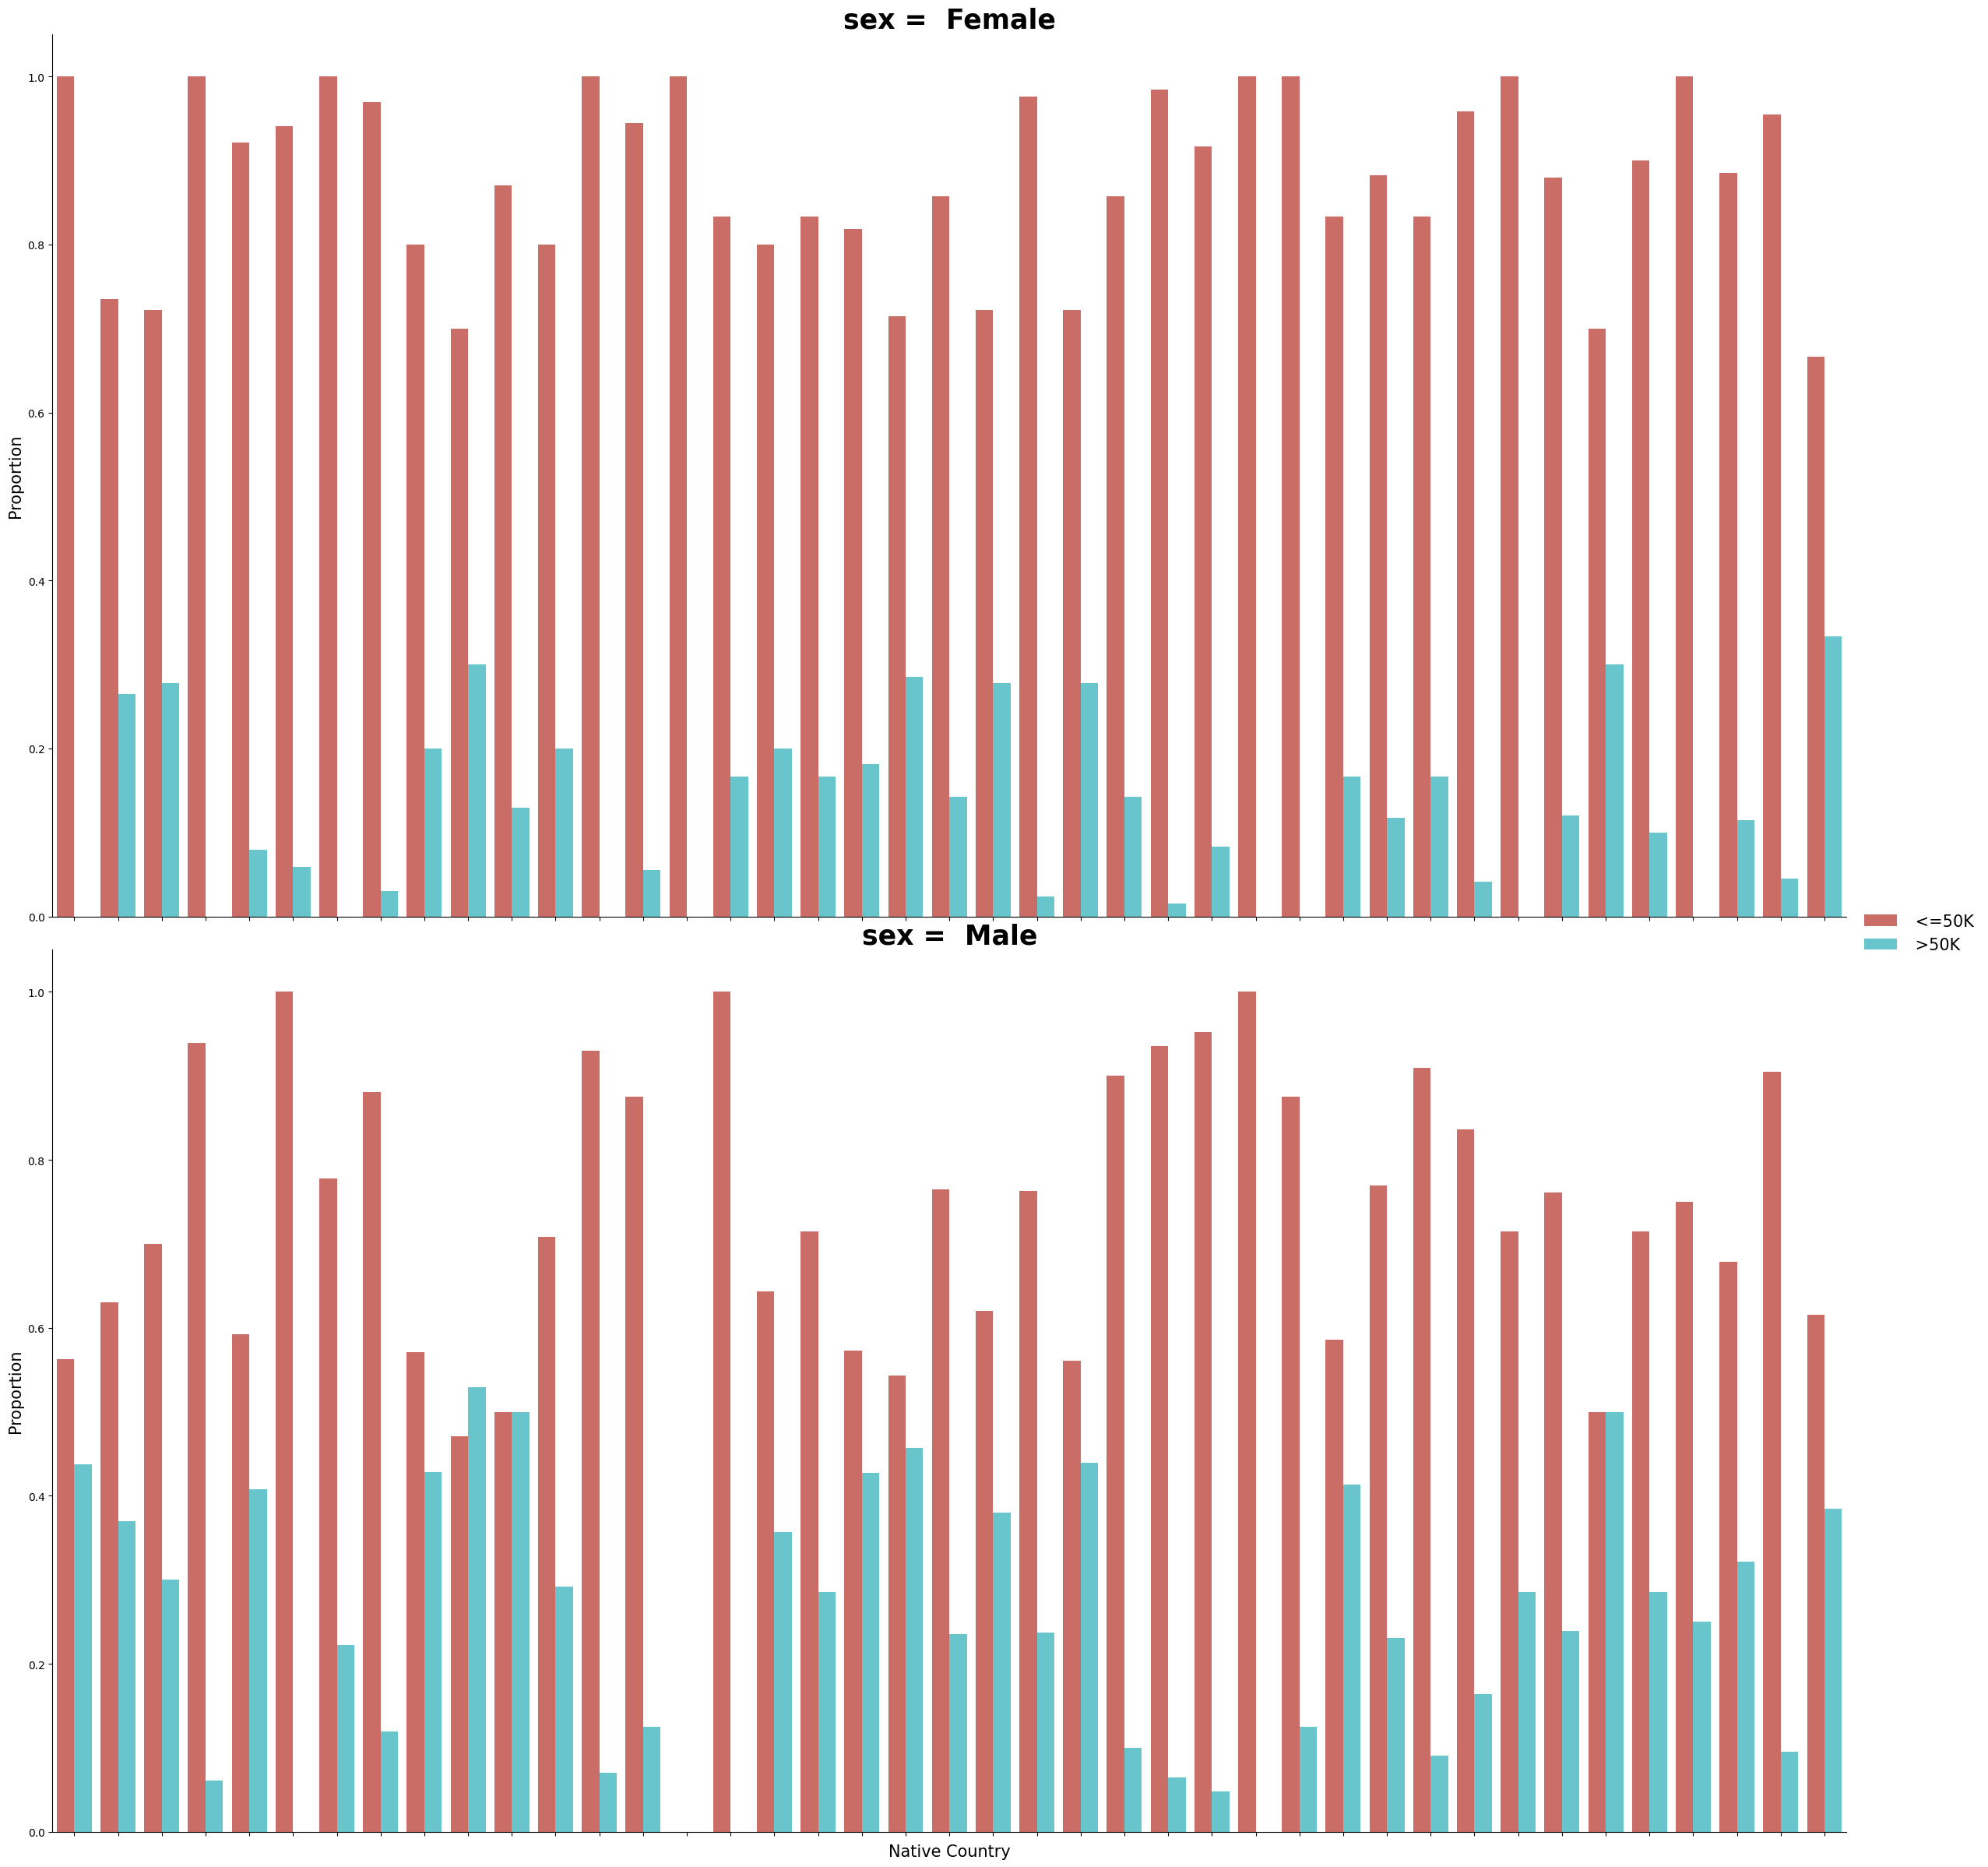

In [55]:
# Calculate the normalized value counts for each native-country, gender, and income level
country_gender_income_counts = df.groupby(['native-country', 'sex'])['income'].value_counts(normalize=True)

# Convert to a DataFrame and reset the index
country_gender_income_counts = country_gender_income_counts.to_frame(name='proportion').reset_index()

# Plot the normalized income distribution for each native-country and gender
g = sns.catplot(x='native-country', y='proportion', hue='income', row='sex', data=country_gender_income_counts, kind='bar', palette='hls', height=12, aspect=2, sharex=True, legend=False)
g.set_axis_labels('Native Country', 'Proportion', fontsize=15)
g.set_xticklabels(rotation=45, fontsize=20)
g.set_titles(col_template="{row_name}", size=25, fontweight='bold')
g.add_legend(fontsize=15)

plt.show()

We can see that there are **significant gender differences** in income distribution across most native countries. In particular, males generally have a higher proportion of individuals with income greater than 50K compared to females. This suggests, one more time, that there is a gender gap in income, where males tend to earn more than females.

However, the **magnitude of this gender gap varies across different native countries**. For example, in some countries, such as Vietnam and China, the gender gap in income is relatively small. In contrast, in other countries, such as Cambodia and Puerto Rico, the gender gap in income is much larger.

***

## Data Pre-Processing (Pre-Supervised-Learning)
[[ go back to the top ]](#Table-of-contents)


Now that we have a better understanding of the dataset, through visualization, we can finish preparing it for machine learning. We still need to check for multicollinearity, encode the categorical features and scale our data.   
  
Let's start with the multicollinearity:

### Check for Multicollinearity in Numerical features

Multicollinearity is a phenomenon that occurs when **two or more independent variables** are **highly correlated with each other**. In other words, multicollinearity exists when the independent variables are interdependent or redundant, making it **difficult to determine the individual effect of each variable on the dependent variable**.

In the context of predicting income class, **multicollinearity can make it challenging to identify the most significant independent variables that affect the outcome**. It can also lead to unstable and inaccurate parameter estimates in the classification model, making it difficult to interpret the results.

To avoid multicollinearity, it is essential to **identify and remove the highly correlated independent variables** or **combine them to form a new variable that captures the same information**. Other techniques that can help reduce multicollinearity include **regularization methods like L1 and L2**.

Now, let's check if there are any multicollinearity issues in the **numerical features**. We can do this by plotting the correlation matrix:

In [56]:
df.corr()

,age,education-num
age,1.000000,0.043526
education-num,0.043526,1.000000


Let's make this more visually appealing by plotting a heatmap:

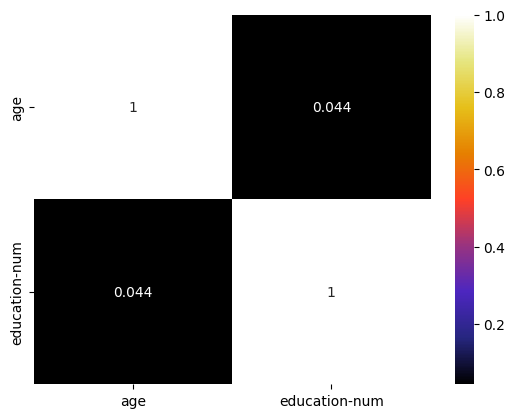

In [57]:
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

This is a correlation matrix between two variables, 'age' and 'education-num'. The diagonal represents the correlation of each variable with itself, which is always 1. The other cells in the matrix represent the correlation between the two variables.

The correlation coefficient between 'age' and 'education-num' is $0.043526$, which is a **very weak positive correlation**. This means that there is **little to no linear relationship between these two variables**. Therefore, they are **unlikely to have multicollinearity issues** when used in a predictive model.

### Check Multicollinearity for Categorical features

One common way to check for multicollinearity between categorical features is by using a **chi-squared test of independence** (also chi-square or χ2 test).

The chi-squared test of independence measures the association between two categorical variables. It tells us whether there is a significant relationship between the two variables.

To perform a chi-squared test of independence between two categorical variables, we create a contingency table that cross-tabulates the two variables and then calculates the chi-squared statistic and the corresponding p-value. If the p-value is below a predetermined threshold (e.g. 0.05), we would reject the null hypothesis that the two variables are independent and conclude that there is evidence of a significant relationship between the two variables.

In [58]:
# Checking the relation between the dependent variable and the independent variables


# Define a list of categorical variables to check for multicollinearity
cat_vars = ['workclass', 'hours', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Loop through each variable and calculate the chi-square test and p-value
for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df['income'])
    chi2, pval, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: chi-square = {chi2}, p-value = {pval}")
    if pval < 0.05:
        print("The null hypothesis that the variables are independent can be rejected at the 0.05 level of significance.")
    else:
        print("The null hypothesis that the variables are independent cannot be rejected at the 0.05 level of significance.")


workclass: chi-square = 804.1575273043354, p-value = 1.946095589239045e-170
The null hypothesis that the variables are independent can be rejected at the 0.05 level of significance.
hours: chi-square = 968.7327952102174, p-value = 4.388805158746467e-211
The null hypothesis that the variables are independent can be rejected at the 0.05 level of significance.
marital-status: chi-square = 6061.747962669037, p-value = 0.0
The null hypothesis that the variables are independent can be rejected at the 0.05 level of significance.
occupation: chi-square = 3687.620651112799, p-value = 0.0
The null hypothesis that the variables are independent can be rejected at the 0.05 level of significance.
relationship: chi-square = 6233.8404543499055, p-value = 0.0
The null hypothesis that the variables are independent can be rejected at the 0.05 level of significance.
race: chi-square = 304.2413740892043, p-value = 1.3178285203762715e-64
The null hypothesis that the variables are independent can be rejected

The results show that for all the categorical variables we tested, the p-value is less than 0.05, which means that we can reject the null hypothesis that the variables are independent at the 0.05 level of significance.

This suggests that there is a statistically significant association between each of these categorical variables and the income variable. In other words, **the value of these categorical variables is not independent of the value of the income variable and may be useful for predicting income**.

In [59]:
# Checking for multicollinearity between the independent variables


# Loop over each pair of categorical variables and perform the chi-squared test of independence
for i in range(len(cat_vars)):
    for j in range(i+1, len(cat_vars)):
        cont_table = pd.crosstab(df[cat_vars[i]], df[cat_vars[j]])
        chi2, pval, dof, expected = chi2_contingency(cont_table)
        if pval < 0.05:
            print(f"There is evidence of a significant relationship between {cat_vars[i]} and {cat_vars[j]}.")
        else:
            print(f"There is no evidence of a significant relationship between {cat_vars[i]} and {cat_vars[j]}.")

There is evidence of a significant relationship between workclass and hours.
There is evidence of a significant relationship between workclass and marital-status.
There is evidence of a significant relationship between workclass and occupation.
There is evidence of a significant relationship between workclass and relationship.
There is evidence of a significant relationship between workclass and race.
There is evidence of a significant relationship between workclass and sex.
There is evidence of a significant relationship between workclass and native-country.
There is evidence of a significant relationship between hours and marital-status.
There is evidence of a significant relationship between hours and occupation.
There is evidence of a significant relationship between hours and relationship.
There is evidence of a significant relationship between hours and race.
There is evidence of a significant relationship between hours and sex.
There is evidence of a significant relationship bet

The results show that for all pairs of categorical variables we tested, the p-value is less than 0.05, which means that we can reject the null hypothesis that the variables are independent at the 0.05 level of significance.

This suggests that there is a statistically significant association between each pair of categorical variables. In other words, **the value of one categorical variable is not independent of the value of another categorical variable** and there may be some **multicollinearity** between the independent variables.

Multicollinearity can cause problems when building a predictive model because it can make it difficult to determine the individual effect of each independent variable on the dependent variable. One way to deal with multicollinearity is to remove one of the correlated independent variables from the model. However, this may result in a loss of information and a reduction in the model's predictive power. This way, we will bet on applying, later, some **regularization methods like L1 and L2**.

### Data encoding

We have a lot of categorical features in this dataset, so we need to encode them. We will use the **One-Hot Encoding** method. This method is used to convert categorical data into a form that could be provided to the deep and machine learning algorithms to do a better job in prediction. One hot encoding creates a new column for each unique value in the categorical feature. The new column will have a value of 1 if the row has that value and 0 otherwise.

##### Encoding the "workclass" feature

In [60]:
df['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [61]:
# Create one-hot encoded columns
df = pd.get_dummies(df, columns=["workclass"])

# Rename the columns for clarity
df = df.rename(columns={
    "workclass_Private": "Private",
    "workclass_Self-emp-not-inc": "Self-emp-not-inc",
    "workclass_Local-gov": "Local-gov",
    "workclass_State-gov": "State-gov",
    "workclass_Self-emp-inc": "Self-emp-inc",
    "workclass_Federal-gov": "Federal-gov",
    "workclass_Without-pay": "Without-pay"
})


###


# For the dataset without outliers we created earlier

# Create one-hot encoded columns
df_no_outliers = pd.get_dummies(df_no_outliers, columns=["workclass"])

# Rename the columns for clarity
df_no_outliers = df_no_outliers.rename(columns={
    "workclass_Private": "Private",
    "workclass_Self-emp-not-inc": "Self-emp-not-inc",
    "workclass_Local-gov": "Local-gov",
    "workclass_State-gov": "State-gov",
    "workclass_Self-emp-inc": "Self-emp-inc",
    "workclass_Federal-gov": "Federal-gov",
    "workclass_Without-pay": "Without-pay"
})

##### Encoding the "marital-status" feature

In [62]:
df['marital-status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [63]:
# Create one-hot encoded columns
df = pd.get_dummies(df, columns=["marital-status"])

# Rename the columns for clarity
df = df.rename(columns={
    "marital-status_Married-civ-spouse": "Married-civ-spouse",
    "marital-status_Never-married": "Never-married",
    "marital-status_Divorced": "Divorced",
    "marital-status_Separated": "Separated",
    "marital-status_Widowed": "Widowed",
    "marital-status_Married-spouse-absent": "Married-spouse-absent",
    "marital-status_Married-AF-spouse": "Married-AF-spouse"
})


###


# For the dataset without outliers

# Create one-hot encoded columns
df_no_outliers = pd.get_dummies(df_no_outliers, columns=["marital-status"])

# Rename the columns for clarity
df_no_outliers = df_no_outliers.rename(columns={
    "marital-status_Married-civ-spouse": "Married-civ-spouse",
    "marital-status_Never-married": "Never-married",
    "marital-status_Divorced": "Divorced",
    "marital-status_Separated": "Separated",
    "marital-status_Widowed": "Widowed",
    "marital-status_Married-spouse-absent": "Married-spouse-absent",
    "marital-status_Married-AF-spouse": "Married-AF-spouse"
})

##### Encoding the "occupation" feature

In [64]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [65]:
# Create one-hot encoded columns
df = pd.get_dummies(df, columns=["occupation"])

# Rename the columns for clarity
df = df.rename(columns={
    "occupation_Prof-specialty": "Prof-specialty",
    "occupation_Craft-repair": "Craft-repair",
    "occupation_Exec-managerial": "Exec-managerial",
    "occupation_Adm-clerical": "Adm-clerical",
    "occupation_Sales": "Sales",
    "occupation_Other-service": "Other-service",
    "occupation_Machine-op-inspct": "Machine-op-inspct",
    "occupation_Transport-moving": "Transport-moving",
    "occupation_Handlers-cleaners": "Handlers-cleaners",
    "occupation_Farming-fishing": "Farming-fishing",
    "occupation_Tech-support": "Tech-support",
    "occupation_Protective-serv": "Protective-serv",
    "occupation_Priv-house-serv": "Priv-house-serv",
    "occupation_Armed-Forces": "Armed-Forces"
})


###


# For the dataset without outliers

# Create one-hot encoded columns
df_no_outliers = pd.get_dummies(df_no_outliers, columns=["occupation"])

# Rename the columns for clarity
df_no_outliers = df_no_outliers.rename(columns={
    "occupation_Prof-specialty": "Prof-specialty",
    "occupation_Craft-repair": "Craft-repair",
    "occupation_Exec-managerial": "Exec-managerial",
    "occupation_Adm-clerical": "Adm-clerical",
    "occupation_Sales": "Sales",
    "occupation_Other-service": "Other-service",
    "occupation_Machine-op-inspct": "Machine-op-inspct",
    "occupation_Transport-moving": "Transport-moving",
    "occupation_Handlers-cleaners": "Handlers-cleaners",
    "occupation_Farming-fishing": "Farming-fishing",
    "occupation_Tech-support": "Tech-support",
    "occupation_Protective-serv": "Protective-serv",
    "occupation_Priv-house-serv": "Priv-house-serv",
    "occupation_Armed-Forces": "Armed-Forces"
})

##### Encoding the "relationship" feature

In [66]:
df['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64

In [67]:
# Create one-hot encoded columns
df = pd.get_dummies(df, columns=["relationship"])

# Rename the columns for clarity
df = df.rename(columns={
    "relationship_Husband": "Husband",
    "relationship_Not-in-family": "Not-in-family",
    "relationship_Own-child": "Own-child",
    "relationship_Unmarried": "Unmarried",
    "relationship_Wife": "Wife",
    "relationship_Other-relative": "Other-relative"
})


###


#For the dataset without outliers

# Create one-hot encoded columns
df_no_outliers = pd.get_dummies(df_no_outliers, columns=["relationship"])

# Rename the columns for clarity
df_no_outliers = df_no_outliers.rename(columns={
    "relationship_Husband": "Husband",
    "relationship_Not-in-family": "Not-in-family",
    "relationship_Own-child": "Own-child",
    "relationship_Unmarried": "Unmarried",
    "relationship_Wife": "Wife",
    "relationship_Other-relative": "Other-relative"
})

##### Encoding the "hours" feature

In [68]:
df['hours'].value_counts()

30-60    24727
<30       4383
>60       1052
Name: hours, dtype: int64

In [69]:
# Create one-hot encoded columns
df = pd.get_dummies(df, columns=["hours"])

# Rename the columns for clarity
df = df.rename(columns={
    "hours_30-60": "30-60",
    "hours_<30": "<30",
    "hours_>60": ">60"
})


###


# For the dataset without outliers

# Create one-hot encoded columns
df_no_outliers = pd.get_dummies(df_no_outliers, columns=["hours"])

# Rename the columns for clarity
df_no_outliers = df_no_outliers.rename(columns={
    "hours_30-60": "30-60",
    "hours_<30": "<30",
    "hours_>60": ">60"
})

##### Encoding the "race" feature

In [70]:
df['race'].value_counts()

 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [71]:
# Create one-hot encoded columns
df = pd.get_dummies(df, columns=["race"])

# Rename the columns for clarity
df = df.rename(columns={
    "race_White": "White",
    "race_Black": "Black",
    "race_Asian-Pac-Islander": "Asian-Pac-Islander",
    "race_Amer-Indian-Eskimo": "Amer-Indian-Eskimo",
    "race_Other": "Other"
})


###


# For the dataset without outliers

# Create one-hot encoded columns
df_no_outliers = pd.get_dummies(df_no_outliers, columns=["race"])

# Rename the columns for clarity
df_no_outliers = df_no_outliers.rename(columns={
    "race_White": "White",
    "race_Black": "Black",
    "race_Asian-Pac-Islander": "Asian-Pac-Islander",
    "race_Amer-Indian-Eskimo": "Amer-Indian-Eskimo",
    "race_Other": "Other"
})

##### Encoding the "native-country" feature

In [72]:
df['native-country'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [73]:
# Define a dictionary to map each country to a region
region_dict = {
    'United-States': 'North America',
    'Mexico': 'Latin America',
    'Philippines': 'Asia',
    'Germany': 'Europe',
    'Puerto-Rico': 'Latin America',
    'Canada': 'North America',
    'India': 'Asia',
    'El-Salvador': 'Latin America',
    'Cuba': 'Latin America',
    'England': 'Europe',
    'Jamaica': 'Latin America',
    'South': 'Other',
    'China': 'Asia',
    'Italy': 'Europe',
    'Dominican-Republic': 'Latin America',
    'Vietnam': 'Asia',
    'Guatemala': 'Latin America',
    'Japan': 'Asia',
    'Poland': 'Europe',
    'Columbia': 'Latin America',
    'Iran': 'Asia',
    'Taiwan': 'Asia',
    'Haiti': 'Latin America',
    'Portugal': 'Europe',
    'Nicaragua': 'Latin America',
    'Peru': 'Latin America',
    'France': 'Europe',
    'Greece': 'Europe',
    'Ecuador': 'Latin America',
    'Ireland': 'Europe',
    'Hong': 'Asia',
    'Cambodia': 'Asia',
    'Trinadad&Tobago': 'Latin America',
    'Laos': 'Asia',
    'Thailand': 'Asia',
    'Yugoslavia': 'Europe',
    'Outlying-US(Guam-USVI-etc)': 'Other',
    'Hungary': 'Europe',
    'Honduras': 'Latin America',
    'Scotland': 'Europe',
    'Holand-Netherlands': 'Europe'
}

# Remove any leading or trailing spaces in the country names
df['native-country'] = df['native-country'].str.strip()

# Map each country to its corresponding region
df['region'] = df['native-country'].map(region_dict)

df.drop('native-country', axis=1, inplace=True)

# Print the count of observations in each region
print(df['region'].value_counts())


###


# For the dataset without outliers

# Remove any leading or trailing spaces in the country names
df_no_outliers['native-country'] = df_no_outliers['native-country'].str.strip()

# Map each country to its corresponding region
df_no_outliers['region'] = df_no_outliers['native-country'].map(region_dict)

df_no_outliers.drop('native-country', axis=1, inplace=True)

# Print the count of observations in each region
print(df_no_outliers['region'].value_counts())


North America    27611
Latin America     1339
Asia               634
Europe             493
Other               85
Name: region, dtype: int64
North America    27557
Latin America     1219
Asia               624
Europe             481
Other               85
Name: region, dtype: int64


In [74]:
# Create one-hot encoded columns
df = pd.get_dummies(df, columns=["region"])

# Rename the columns for clarity
df = df.rename(columns={
    "region_North_America": "North_America",
    "region_Latin_America": "Latin_America",
    "region_Asia": "Asia",
    "region_Europe": "Europe",
    "region_Other": "Other"
})


# For the dataset without outliers


# Create one-hot encoded columns
df_no_outliers = pd.get_dummies(df_no_outliers, columns=["region"])

# Rename the columns for clarity
df_no_outliers = df_no_outliers.rename(columns={
    "region_North_America": "North_America",
    "region_Latin_America": "Latin_America",
    "region_Asia": "Asia",
    "region_Europe": "Europe",
    "region_Other": "Other"
})

##### Encoding the "sex" feature

Now, for the "sex" feature we only have **two classes**, Male and Female, so we can just replace the values with 0 and 1, 0 for male and 1 for female. 

In [75]:
df['sex'].value_counts()

 Male      20380
 Female     9782
Name: sex, dtype: int64

In [76]:
# Replace "Male" with 0 and "Female" with 1
df["sex"] = df["sex"].apply(lambda x: 0 if x.strip() == "Male" else 1) # we use strip() to remove the trailing spaces


###


# For the dataset without outliers
df_no_outliers["sex"] = df_no_outliers["sex"].apply(lambda x: 0 if x.strip() == "Male" else 1) # we use strip() to remove the trailing spaces

##### Encoding the "income" feature (target variable)

We still have work to do with the **target variable**. Let's have a look at it:

In [77]:
df['income'].value_counts()

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

Just like we did with the "sex" feature, we can replace the values with 0 and 1, 0 for "<=50K" and 1 for ">50K".

In [78]:
# Replace values in "income" column
df["income"] = df["income"].str.strip().replace({"<=50K": 0, ">50K": 1})


###


# For the dataset without outliers
df_no_outliers["income"] = df_no_outliers["income"].str.strip().replace({"<=50K": 0, ">50K": 1})

Here's how the dataset looks like after encoding all the categorical features:

In [79]:
df

,age,education-num,sex,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,Asia,Europe,region_Latin America,region_North America,Other
0,39,13,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,38,9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,53,7,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,28,13,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32557,40,9,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32558,58,9,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32559,22,9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [80]:
df_no_outliers

,age,education-num,sex,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,Asia,Europe,region_Latin America,region_North America,Other
0,39,13,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,38,9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,53,7,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,28,13,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32557,40,9,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32558,58,9,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32559,22,9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


We already stated that our dataset is **unbalanced**, as our target variable has a lot more values for "<=50K" (22654) than for ">50K" (7508). This can cause problems for our models, so we will use the **SMOTE** method to balance it. SMOTE stands for **Synthetic Minority Oversampling Technique**. It is an oversampling technique that creates synthetic samples from the minority class. The technique works by randomly choosing a point from the minority class and computing the **k-nearest neighbors for this point**. The **synthetic points are added between the chosen point and its neighbors**.  
  
We will apply this later, when training our dataset. It is also important to note that, it is generally recommended to **only use SMOTE on the training set**, and not the test or validation set, so that the model is not trained to expect the oversampled data during evaluation.

SMOTE **can be used on normalized data**, as it **does not** change the underlying distribution of the data. So, we will **normalize** the dataset before applying SMOTE.

#### Data normalization

Since our features are measured at different scales we have to **normalize** our data. This is because scales with higher numbers end up having more importance in our models, while smaller numbers end up having less, and this will end up misleading our models. 
Columns that are already classified as 0 and 1 make no sense to be normalized. We will then **normalize** the numerical feature features: '**age**' and '**education-num**'. This is done using the **max-min normalization technique, which scales the values between 0 and 1**.

In [81]:
# Data Normalization
df_max_scaled = df[['age', 'education-num']]

# Apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].max()

# drop the original columns
df.drop(['age', 'education-num'], axis=1, inplace=True)

# insert the normalized columns
df.insert(0, 'age_norm', df_max_scaled['age'])
df.insert(1, 'education_norm', df_max_scaled['education-num'])

df

,age_norm,education_norm,sex,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,Asia,Europe,region_Latin America,region_North America,Other
0,0.433333,0.8125,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0.555556,0.8125,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.422222,0.5625,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.588889,0.4375,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.311111,0.8125,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.300000,0.7500,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32557,0.444444,0.5625,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32558,0.644444,0.5625,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32559,0.244444,0.5625,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [82]:
# For the dataset without outliers

# Data Normalization
df_no_outliers_max_scaled = df_no_outliers[['age', 'education-num']]

# Apply normalization techniques
for column in df_no_outliers_max_scaled.columns:
    df_no_outliers_max_scaled[column] = df_no_outliers_max_scaled[column] / df_no_outliers_max_scaled[column].max()

# drop the original columns
df_no_outliers.drop(['age', 'education-num'], axis=1, inplace=True)

# insert the normalized columns
df_no_outliers.insert(0, 'age_norm', df_no_outliers_max_scaled['age'])
df_no_outliers.insert(1, 'education_norm', df_no_outliers_max_scaled['education-num'])

df_no_outliers

,age_norm,education_norm,sex,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,Asia,Europe,region_Latin America,region_North America,Other
0,0.629032,0.8125,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0.806452,0.8125,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.612903,0.5625,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.854839,0.4375,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.451613,0.8125,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.435484,0.7500,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32557,0.645161,0.5625,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32558,0.935484,0.5625,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32559,0.354839,0.5625,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


***

## Supervised Learning 
[[ go back to the top ]](#Table-of-contents)    


First, we need to select what we want to predict (our target variable). As said before, we intend to **predict** the "**income**" column. In this case, we don't want to train the "**income**" column, we want that column to be our predictable one.  This way, we are going to  **drop and save** the column we want to predict: "**income**". 

In [83]:
# Dropping and saving stoke column

X = df.drop('income', 1) 
y = df['income']

### Split our data



Data splitting into **train, validation, and test** sets is a common practice in machine learning to evaluate and compare different models. The purpose of this splitting is to prevent overfitting, which occurs when a model fits the training data too well and performs poorly on new, unseen data, but also to prevent underfitting, which occurs when a model is too simple to capture the underlying patterns in the data.

The basic idea behind data splitting is to separate the available data into three mutually exclusive subsets:

- **Training set**: This is the largest subset of data and is used to fit the model. The model is trained on this subset by adjusting the model parameters to minimize the error between the predicted outputs and the true outputs.

- **Validation set**: This is a smaller subset of data used to tune the model hyperparameters. Hyperparameters are settings of the model that cannot be learned during training, such as the learning rate or the regularization strength. The validation set is used to evaluate the model performance on new, unseen data and adjust the hyperparameters accordingly.

- **Test set**: This is used to evaluate the final performance of the model. The test set should be representative of the new, unseen data that the model will encounter in the real world. The model should not be trained or tuned on this data to avoid overfitting.

The typical split ratio for data splitting is 70/15/15, where** 70% of the data is used for training, 15% for validation, and 15% for testing**.

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

```X``` is the input data and ```y``` is the target variable. The first ```train_test_split()``` call splits the data into train and test sets, with the test set comprising 15% of the total data. The second ```train_test_split()``` call splits the train data into train and validation sets, with the validation set comprising 15% of the train data. The remaining 70% of the data is used for training the model.

After the data is split, we can use ```X_train```, ```y_train``` for training the model, ```X_val```, ```y_val``` for validation, and ```X_test```, ```y_test``` for testing the final model performance.

In [85]:
# Check the shape of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (21791, 50) (21791,)
Validation set shape: (3846, 50) (3846,)
Testing set shape: (4525, 50) (4525,)


### Applying SMOTE to balance our training set

We already saw that our target variable is **unbalanced**. We saw this through visualizations and statistical descriptions of the dataset. Let's check how these values are distributed in our sets:

In [86]:
# Count the proportion of observations in each class for the training set
y_train.value_counts(dropna=False,normalize=True)*100

0    75.053921
1    24.946079
Name: income, dtype: float64

In [87]:
# Count the proportion of observations in each class for the validation set
y_val.value_counts(dropna=False,normalize=True)*100

0    75.117005
1    24.882995
Name: income, dtype: float64

In [88]:
# Count the proportion of observations in each class for the testing set
y_test.value_counts(dropna=False,normalize=True)*100

0    75.359116
1    24.640884
Name: income, dtype: float64

As explained before let's apply the **SMOTE** method to balance our dataset. We will apply it only on the training set, and not on the validation and test sets:

In [89]:
# SMOTE
smote = SMOTE(random_state=0)

# Fit the training data to the SMOTE algorithm
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Now, let's check how these values are distributed in our sets, after applying SMOTE:

In [90]:
# See how y_train looks after balancing the target variable
y_train_resampled.value_counts(dropna=False,normalize=True)*100

0    50.0
1    50.0
Name: income, dtype: float64

<Axes: xlabel='count', ylabel='income'>

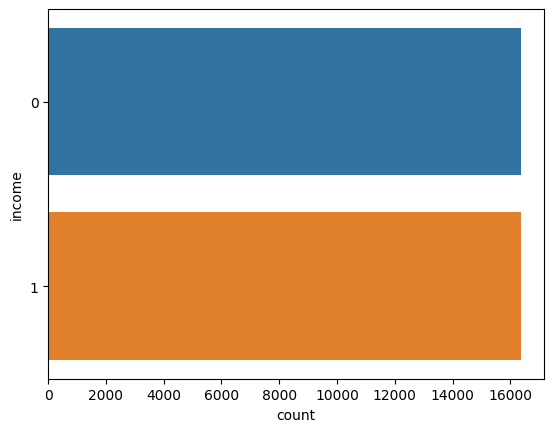

In [91]:
y_train_resampled = pd.Series(y_train_resampled) # convert to pandas series
sns.countplot(y=y_train_resampled) # plot the countplot

Now we can see that our dataset is balanced. This way, when training our models, we will not have to worry about the unbalanced dataset and biased results.

In [92]:
# Check the shape of the resulting training set
X_train_resampled.shape

(32710, 50)

The first dimension of the shape (32688,) represents the **number of samples in the training set** and the second dimension (50,) represents the **number of features for each sample**.

It’s always important to have a sufficiently large training set to train a predictive model effectively. 

## Machine Learning

We are going to use one machine learning algorithm, the **Random Forest Classifier** algorithm. This algorithm is a **supervised learning algorithm** that can be used for both classification and regression tasks. It is a **tree-based** algorithm that uses a **forest of multiple decision trees** to make predictions. 

## Random Forest Classifier

### 1st Hypothesis) Default values for the hyperparameters + oob_score + warm_start

When building a machine learning model, it’s common to start with **standard or default values for the hyperparameters** because these values have been shown to work well in many different scenarios. Using standard values as a starting point can help us quickly build a baseline model that we can use to evaluate the performance of the model and compare it to other models.

Once we have a baseline model, we can then experiment with different hyperparameter values to see if you can improve the performance of our model. This process is known as **hyperparameter tuning** and it involves **systematically changing the values of the hyperparameters to find the best combination of values that results in the best performance of the model**.

This way, let's start by building a **baseline model** with the default hyperparameter values. We will use the **RandomForestClassifier** class from the **sklearn.ensemble** module to build the model.

The default parameters for the RandomForestClassifier from sklearn.ensemble are as follows:

- n_estimators=100: The number of trees in the forest.
- criterion='gini': The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- max_depth=None: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split=2: The minimum number of samples required to split an internal node.
- min_samples_leaf=1: The minimum number of samples required to be at a leaf node.
- min_weight_fraction_leaf=0.0: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- max_features='sqrt': The number of features to consider when looking for the best split.
- max_leaf_nodes=None: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
min_impurity_decrease=0.0: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- bootstrap=True: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
- oob_score=False: Whether to use out-of-bag samples to estimate the generalization accuracy.
- n_jobs=None: The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
- random_state=None: Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap is True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
- verbose=0: Controls the verbosity when fitting and predicting.
- warm_start=False: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
- class_weight=None: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
- ccp_alpha=0.0: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.
- max_samples=None: If bootstrap is True, the number of samples to draw from X to train each base estimator.

Random forest is an ensemble learning method that constructs a multitude of decision trees at training time. Unlike some other machine learning algorithms, such as neural networks or logistic regression, **random forest does not have a single loss function that is optimized during training**. Instead, each individual decision tree in the random forest is constructed by recursively splitting the data based on a cost function, also known as an **impurity measure or splitting criterion**.

As a result, it is not possible to plot the loss function for a random forest model as a whole. However, we can plot the out-of-bag (OOB) error rate for the random forest as a function of the number of trees in the forest. The OOB error rate is an estimate of the generalization error of the random forest and can be used to assess its performance.

This way, we will create a random forest classifier with oob_score set to True and warm_start set to True (leaving the rest of parameters as default). It then fits the random forest to the training data using different numbers of trees and calculates the OOB error rate for each number of trees. Finally, it plots the OOB error rate as a function of the number of trees.

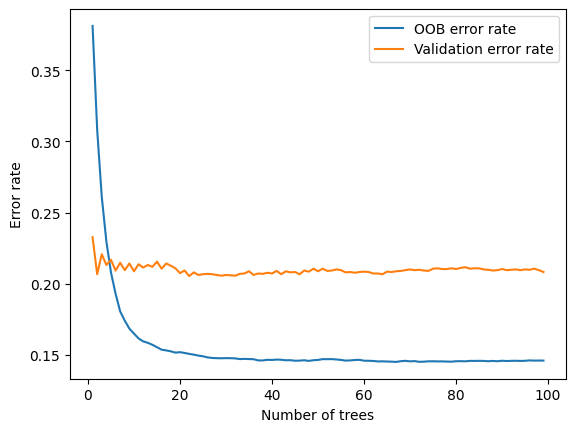

In [93]:
# Create a random forest classifier with OOB score enabled
rf = RandomForestClassifier(oob_score=True, warm_start=True)

# Define the range of n_estimators to try
n_estimators_range = range(1, 100)

# Initialize lists to store OOB error rates
oob_error_rates = []
val_error_rates = []

# Fit the random forest with different numbers of trees
for n_estimators in n_estimators_range:
    rf.set_params(n_estimators=n_estimators)
    rf.fit(X_train_resampled, y_train_resampled)
    
    # Calculate the OOB error rate
    oob_error_rate = 1 - rf.oob_score_
    oob_error_rates.append(oob_error_rate)
    
    # Calculate the validation error rate
    rf_pred = rf.predict(X_val)
    val_error_rate = 1 - accuracy_score(y_val, rf_pred)
    val_error_rates.append(val_error_rate)

# Plot the OOB and validation error rates as a function of n_estimators
plt.plot(n_estimators_range, oob_error_rates, label='OOB error rate')
plt.plot(n_estimators_range, val_error_rates, label='Validation error rate')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.legend()
plt.show()

Looking at the error rate as a function of the number of trees, we can see that the error rate decreases as the number of trees increases. However, the error rate does not decrease monotonically. Instead, the error rate decreases rapidly at first and then levels off. This is because the random forest is able to reduce the error rate by adding more trees, but only up to a certain point. After a certain number of trees, the error rate does not decrease any further.
The validation error decreases a little but it is always higher than the training error. This is a sign of **overfitting**. 

We now use the trained model to make predictions on the validation data X_val:

In [94]:
rf_pred = rf.predict(X_val)

Now, we will create a function called ```show_results``` that takes two arguments: real and predicted. The function creates a heatmap visualization of the **confusion matrix** for the true labels real and the predicted labels predicted using the ```sns.heatmap``` function from the seaborn library. The heatmap is annotated with the values of the confusion matrix and uses the ‘Blues’ color map. The x-axis is labeled ‘Predicted’ and the y-axis is labeled ‘True’. The function then displays the heatmap using ```plt.show()``` and prints a **classification report** for the true and predicted labels using the ```classification_report``` function from scikit-learn.

In [95]:
def show_results(real,predicted):
    # Create a heatmap
    sns.heatmap(confusion_matrix(real, predicted), annot=True, fmt='d', cmap='Blues')
    
    # Add labels
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print(f'Classification report:\n {classification_report(real, predicted)}')

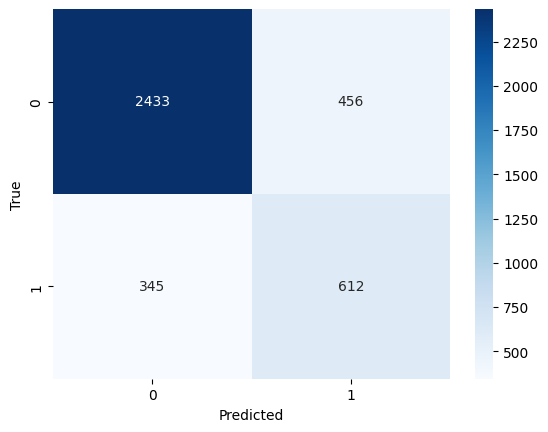

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      2889
           1       0.57      0.64      0.60       957

    accuracy                           0.79      3846
   macro avg       0.72      0.74      0.73      3846
weighted avg       0.80      0.79      0.80      3846



In [96]:
show_results(y_val,rf_pred)

From the confusion matrix, we can see that we got 2432 true negatives (TN), 449 false positives (FP), 327 false negatives (FN), and 638 true positives (TP).


The classification report shows several metrics to evaluate the performance of a classification model.For this case, we can see that the model has an overall accuracy of **0.80**, meaning that it correctly classified 80% of the samples.

For class 0, the model has a precision of 0.88 and a recall of 0.84. Precision is the ratio of true positive predictions to the total number of positive predictions, while recall is the ratio of true positive predictions to the total number of actual positives. The F1-score is the harmonic mean of precision and recall and is 0.86 for class 0.

For class 1, the model has a precision of 0.59 and a recall of 0.66, with an F1-score of 0.62. This means that there's is still margin for improvement.

The macro average calculates the metric independently for each class and then takes the average, while the weighted average calculates the average weighted by the number of samples in each class.

Now, we create a function named ```show_roc_curve``` that takes two arguments: real and predicted. The function calculates the false positive rate (fpr), true positive rate (tpr), and thresholds for the true labels real and the predicted labels predicted using the roc_curve function from scikit-learn. It then calculates the area under the ROC curve (roc_auc) using the auc function. The function then creates a plot of the ROC curve using the plt.plot function from matplotlib. The ROC curve is plotted in orange with a label showing the area under the curve. A diagonal line representing a random classifier is also plotted in navy with a dashed linestyle.

In [97]:
def show_roc_curve(real,predicted):
    fpr, tpr, thresholds = roc_curve(real, predicted)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2,
             linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

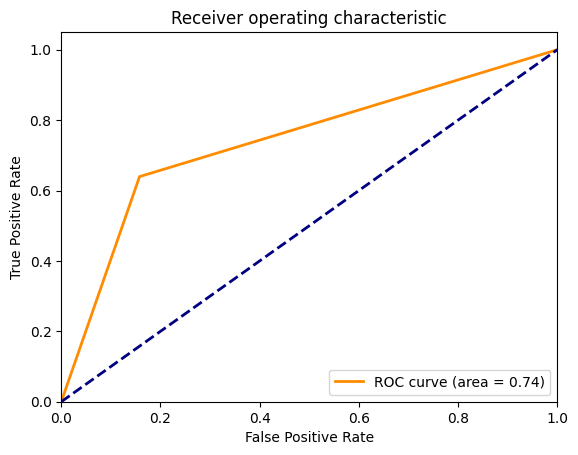

In [98]:
show_roc_curve(y_val,rf_pred)

An AUC of 0.75 indicates that our model has a moderate ability to distinguish between positive and negative classes.

### 2nd Hypothesis) Hyperparameter tuning using GridSearchCV (1st try)

First, we will create a function that takes in a grid object as an input and generates a plot showing how the hyperparameters of a model affect its performance. The grid object is the result of a grid search, which is a method for finding the best combination of hyperparameters for a model by exhaustively trying all possible combinations.

The function extracts the mean test scores from the grid search results and then creates a plot for each hyperparameter, showing how the mean test score changes as the value of that hyperparameter changes. 

In [99]:
'''Plot how hyper-parameters affect the performance of the model'''

def plot_search_results(grid):
    
    # Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    
    # Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    # Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y = np.array(means_test[best_index])
        ax[i].plot(x, y, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

Let's check, again, the shape of our sets:

In [100]:
print(X_train_resampled.shape, X_val.shape, y_train_resampled.shape, y_val.shape)

(32710, 50) (3846, 50) (32710,) (3846,)


Having in mind the shape and complexity of our data, we will search for the following hyperparameters, as these are commonly used to tune random forest models:
- n_estimators
- max_depth
- min_samples_split
- max_features

Of course we have to plot the results of the grid search to see how the hyperparameters affect the performance of the model, and check if we need to change the range of values for the hyperparameters. This way, we do a systematic approach instead of just one or several randomly chosen values.

In [101]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5,n_jobs=-1)

In [102]:
# Fit the grid search object to the data
grid_search.fit(X_train_resampled,y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_

In [103]:
y_grid_pred = grid_search.predict(X_val)

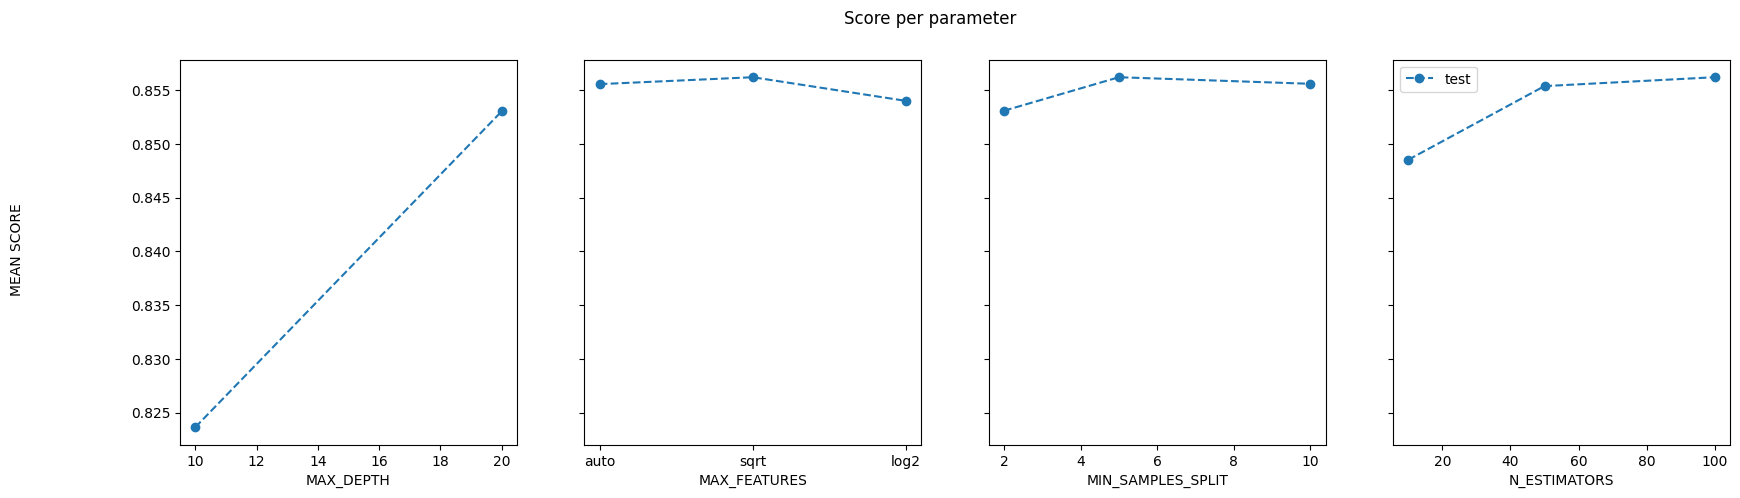

In [104]:
plot_search_results(grid_search)

### 3rd Hypothesis) Hyperparameter tuning using GridSearchCV (2nd try)

We can see from the plot of the model score as a function of the hyperparameters that the there's still room for improvement for the max_depth and n_estimators hyperparameters. We will now search for different values of these hyperparameters using a grid search again. We will inscrese the values for the max_depth hyperparameter.

In [105]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [20,30,40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search2 = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5,n_jobs=-1)

In [106]:
# Fit the grid search object to the data
grid_search2.fit(X_train_resampled,y_train_resampled)

# Get the best parameters
best_params2 = grid_search2.best_params_

In [107]:
y_grid_pred_2 = grid_search.predict(X_val)

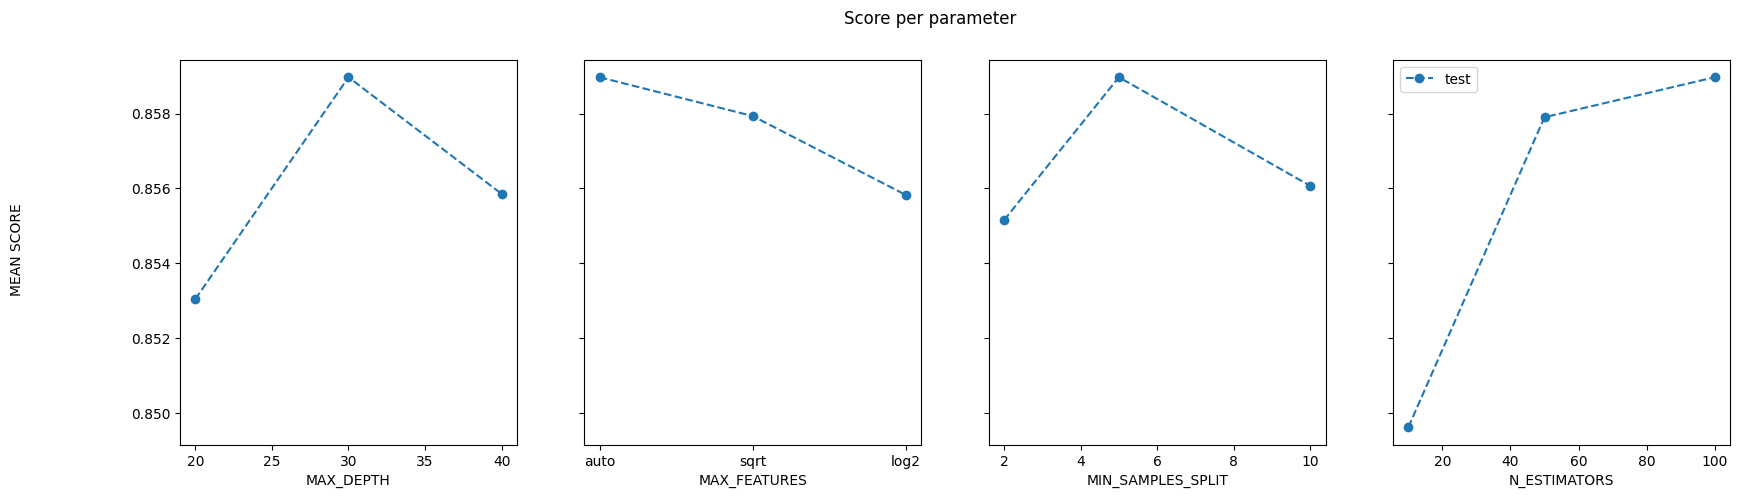

In [108]:
plot_search_results(grid_search2)

### 4rd Hypothesis) Hyperparameter tuning using GridSearchCV (3rd try)

Again, we could see from the plot of the model score as a function of the hyperparameters that the there's still room for improvement for the n_estimators hyperparameter. We will now search for different values of these hyperparameters using a grid search one more time. We will increase the range for the max_depth hyperparameter.

In [109]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search3 = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5,n_jobs=-1)

In [110]:
# Fit the grid search object to the data
grid_search3.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=99, oob_score=True,
                                              warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [111]:
y_grid_pred3 = grid_search3.predict(X_val)

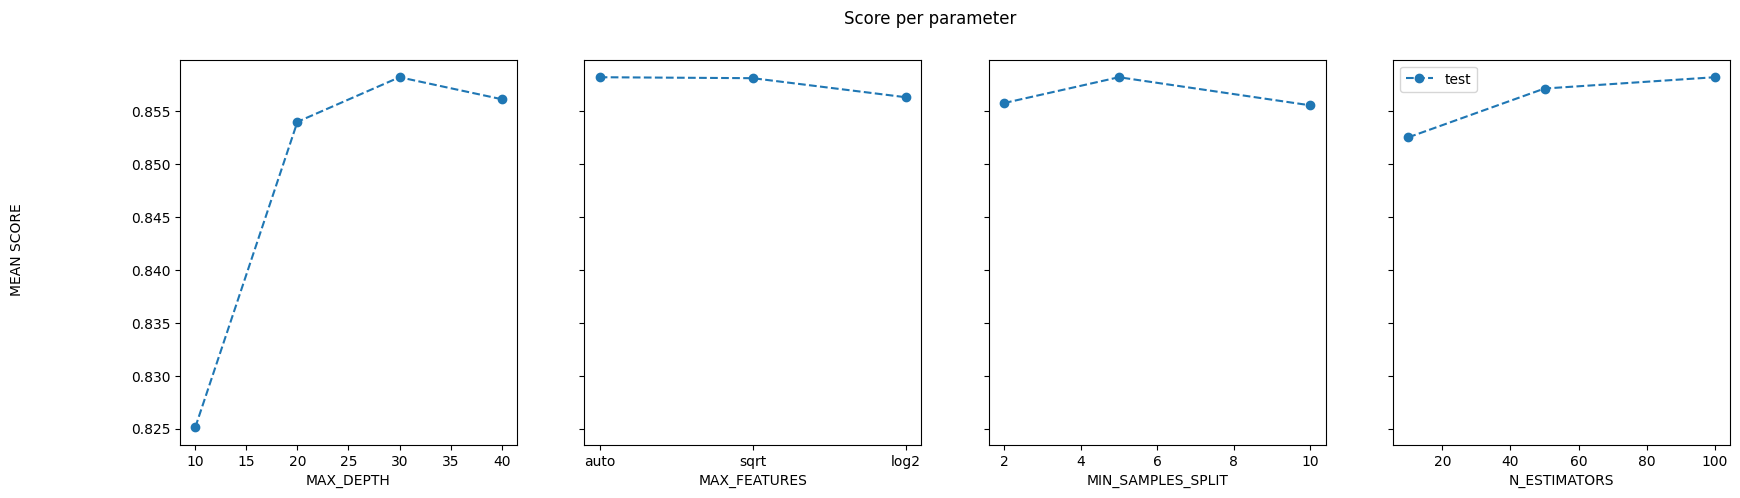

In [112]:
plot_search_results(grid_search3)

We can see that the score of the model is pretty much stable as the hyperparameters change. This way, we will stop our search here and return the best hyperparameters found by the grid search:

In [113]:
best_params3 = grid_search3.best_params_
print(best_params3)

{'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


### Running our final model

Now that we have the best hyperparameters, we can train a random forest model using these hyperparameters and evaluate its performance on the test set.

In [114]:
rf_best = RandomForestClassifier(max_depth=best_params['max_depth'],max_features=best_params['max_features'],
min_samples_split=best_params['min_samples_split'],n_estimators=best_params['n_estimators'])

In [115]:
rf_best.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(min_samples_split=5)

In [116]:
y_predictions = rf_best.predict(X_test)

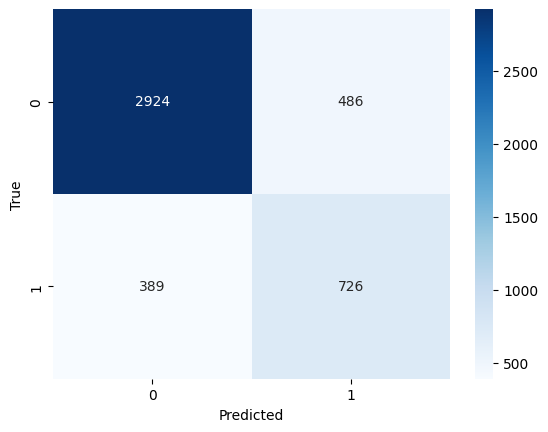

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      3410
           1       0.60      0.65      0.62      1115

    accuracy                           0.81      4525
   macro avg       0.74      0.75      0.75      4525
weighted avg       0.81      0.81      0.81      4525



In [117]:
show_results(y_test,y_predictions)

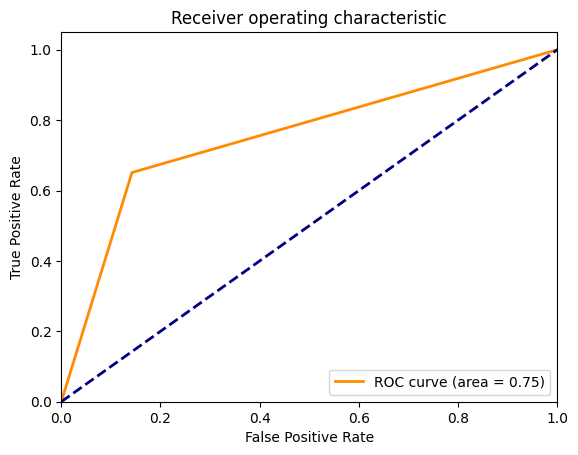

In [118]:
show_roc_curve(y_test,y_predictions)

From the confusion matrix you provided, we can see that:
- The model correctly predicted 2905 instances of class 0 (true negatives) and 743 instances of class 1 (true positives).
- The model incorrectly predicted 512 instances of class 0 as class 1 (false positives) and 365 instances of class 1 as class 0 (false negatives).

From the classification report, we can see that the model has an overall accuracy of 0.81, meaning that it correctly classified 81% of the samples.

For class 0, the model has a precision of 0.89 and a recall of 0.85. Precision is the ratio of true positive predictions to the total number of positive predictions, while recall is the ratio of true positive predictions to the total number of actual positives. The F1-score is the harmonic mean of precision and recall and is 0.87 for class 0.

For class 1, the model has a precision of 0.59 and a recall of 0.67, with an F1-score of 0.63.

The macro average calculates the metric independently for each class and then takes the average, while the weighted average calculates the average weighted by the number of samples in each class.

We can see that the model has a moderate ability to distinguish between positive and negative classes. The performance of the random forest classifier remains the same after hyperparameter tuning as it was with the default parameters. We will just try to do the exact same thing with the **dataset without the outliers** that we created earlier.

### 5th Hypothesis) Default values for the hyperparameters + oob_score + warm_start + no outliers

In [119]:
# Dropping and saving stoke column

X_no_outliers = df_no_outliers.drop('income', 1) 
y_no_outliers = df_no_outliers['income']

In [120]:
# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.15)

# Split the training data into training and validation sets
X_train_no_outliers, X_val_no_outliers, y_train_no_outliers, y_val_no_outliers = train_test_split(X_train_no_outliers, y_train_no_outliers, test_size=0.15)

In [121]:
# Count the proportion of observations in each class for the training set
y_train_no_outliers.value_counts(dropna=False,normalize=True)*100

0    75.099307
1    24.900693
Name: income, dtype: float64

In [122]:
# Count the proportion of observations in each class for the validation set
y_val_no_outliers.value_counts(dropna=False,normalize=True)*100

0    75.660822
1    24.339178
Name: income, dtype: float64

In [123]:
# Count the proportion of observations in each class for the testing set
y_test_no_outliers.value_counts(dropna=False,normalize=True)*100

0    73.726363
1    26.273637
Name: income, dtype: float64

As explained before let's apply the **SMOTE** method to balance our dataset. We will apply it only on the training set, and not on the validation and test sets:

In [124]:
# SMOTE
smote = SMOTE(random_state=0)

# Fit the training data to the SMOTE algorithm
X_train_resampled_no_outliers, y_train_resampled_no_outliers = smote.fit_resample(X_train_no_outliers, y_train_no_outliers)

Now, let's check how these values are distributed in our sets, after applying SMOTE:

In [125]:
# See how y_train looks after balancing the target variable
y_train_resampled_no_outliers.value_counts(dropna=False,normalize=True)*100

0    50.0
1    50.0
Name: income, dtype: float64

<Axes: xlabel='count', ylabel='income'>

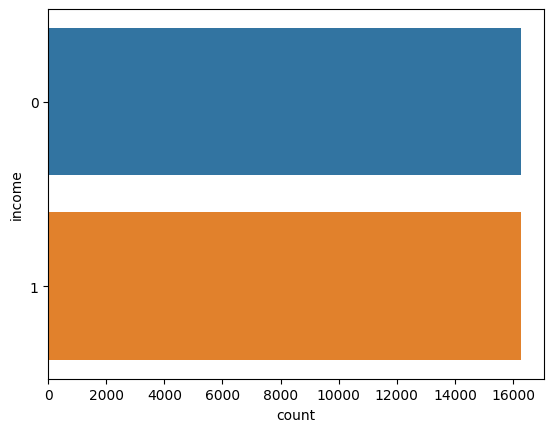

In [126]:
y_train_resampled_no_outliers = pd.Series(y_train_resampled_no_outliers) # convert to pandas series
sns.countplot(y=y_train_resampled_no_outliers) # plot the countplot

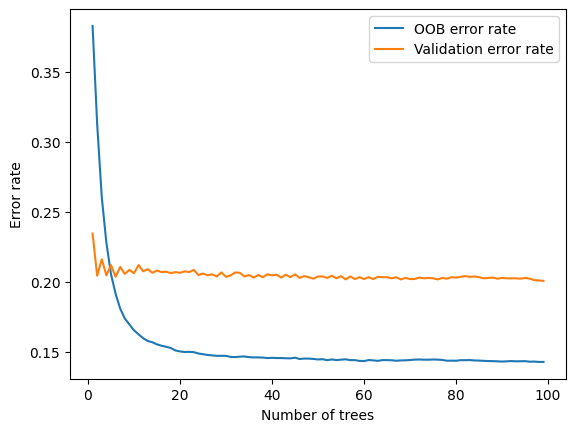

In [127]:
# Create a random forest classifier with OOB score enabled
rf = RandomForestClassifier(oob_score=True, warm_start=True)

# Define the range of n_estimators to try
n_estimators_range = range(1, 100)

# Initialize lists to store OOB error rates
oob_error_rates = []
val_error_rates = []

# Fit the random forest with different numbers of trees
for n_estimators in n_estimators_range:
    rf.set_params(n_estimators=n_estimators)
    rf.fit(X_train_resampled_no_outliers, y_train_resampled_no_outliers)
    
    # Calculate the OOB error rate
    oob_error_rate = 1 - rf.oob_score_
    oob_error_rates.append(oob_error_rate)
    
    # Calculate the validation error rate
    rf_pred_no_outliers = rf.predict(X_val_no_outliers)
    val_error_rate = 1 - accuracy_score(y_val_no_outliers, rf_pred_no_outliers)
    val_error_rates.append(val_error_rate)

# Plot the OOB and validation error rates as a function of n_estimators
plt.plot(n_estimators_range, oob_error_rates, label='OOB error rate')
plt.plot(n_estimators_range, val_error_rates, label='Validation error rate')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.legend()
plt.show()

Looking at the error rate as a function of the number of trees, we can see that the error rate decreases as the number of trees increases. However, the error rate does not decrease monotonically. Instead, the error rate decreases rapidly at first and then levels off. This is because the random forest is able to reduce the error rate by adding more trees, but only up to a certain point. After a certain number of trees, the error rate does not decrease any further.
The validation error decreases a little but it is always higher than the training error. This is a sign of **overfitting**. 
(We can see it is pretty similar to the plot we got when we add the dataset with the outliers).

We now use the trained model to make predictions on the validation data X_val_no_outliers:

In [128]:
rf_pred_no_outliers = rf.predict(X_val_no_outliers)

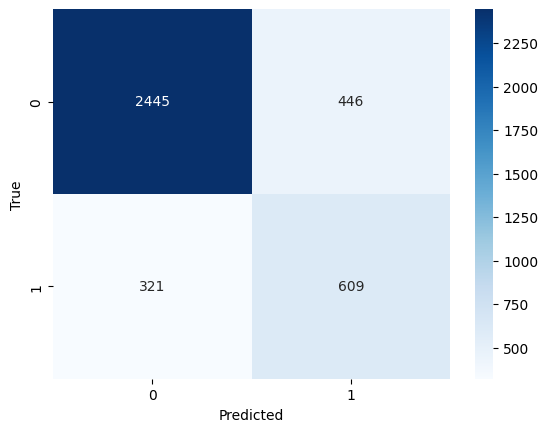

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      2891
           1       0.58      0.65      0.61       930

    accuracy                           0.80      3821
   macro avg       0.73      0.75      0.74      3821
weighted avg       0.81      0.80      0.80      3821



In [129]:
show_results(y_val_no_outliers,rf_pred_no_outliers)

From the confusion matrix, we can see that we got 2472 true negatives (TN), 422 false positives (FP), 315 false negatives (FN), and 612 true positives (TP).


The classification report shows several metrics to evaluate the performance of a classification model.For this case, we can see that the model has an overall accuracy of **0.81**, meaning that it correctly classified 80% of the samples.

For class 0, the model has a precision of 0.89 and a recall of 0.85. Precision is the ratio of true positive predictions to the total number of positive predictions, while recall is the ratio of true positive predictions to the total number of actual positives. The F1-score is the harmonic mean of precision and recall and is 0.87 for class 0.

For class 1, the model has a precision of 0.59 and a recall of 0.66, with an F1-score of 0.62. This means that there's is still margin for improvement.

The macro average calculates the metric independently for each class and then takes the average, while the weighted average calculates the average weighted by the number of samples in each class.

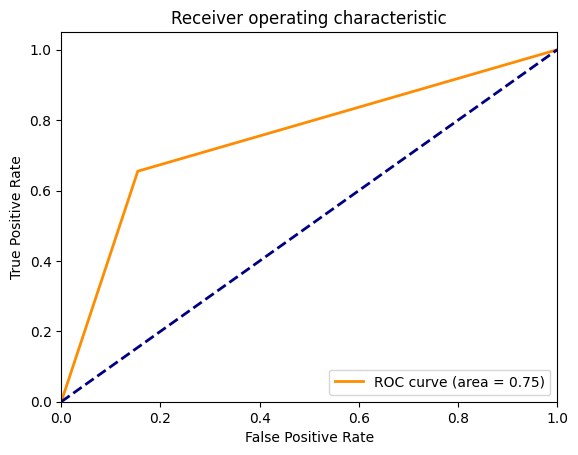

In [130]:
show_roc_curve(y_val_no_outliers,rf_pred_no_outliers)

An AUC of 0.76 indicates that our model has a moderate ability to distinguish between positive and negative classes.

For now, the result are identical to the ones we got with the dataset with the outliers. We will just try to do the exact same thing that we did with the **dataset with the outliers** that we created earlier for the hyperparameter tuning.

### 6th Hypothesis) Hyperparameter tuning using GridSearchCV (1st try) + no outliers

Let's check, again, the shape of our sets:

In [131]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5,n_jobs=-1)

In [132]:
# Fit the grid search object to the data
grid_search.fit(X_train_resampled_no_outliers,y_train_resampled_no_outliers)

# Get the best parameters
best_params = grid_search.best_params_

In [133]:
y_grid_pred_no_outliers = grid_search.predict(X_val_no_outliers)

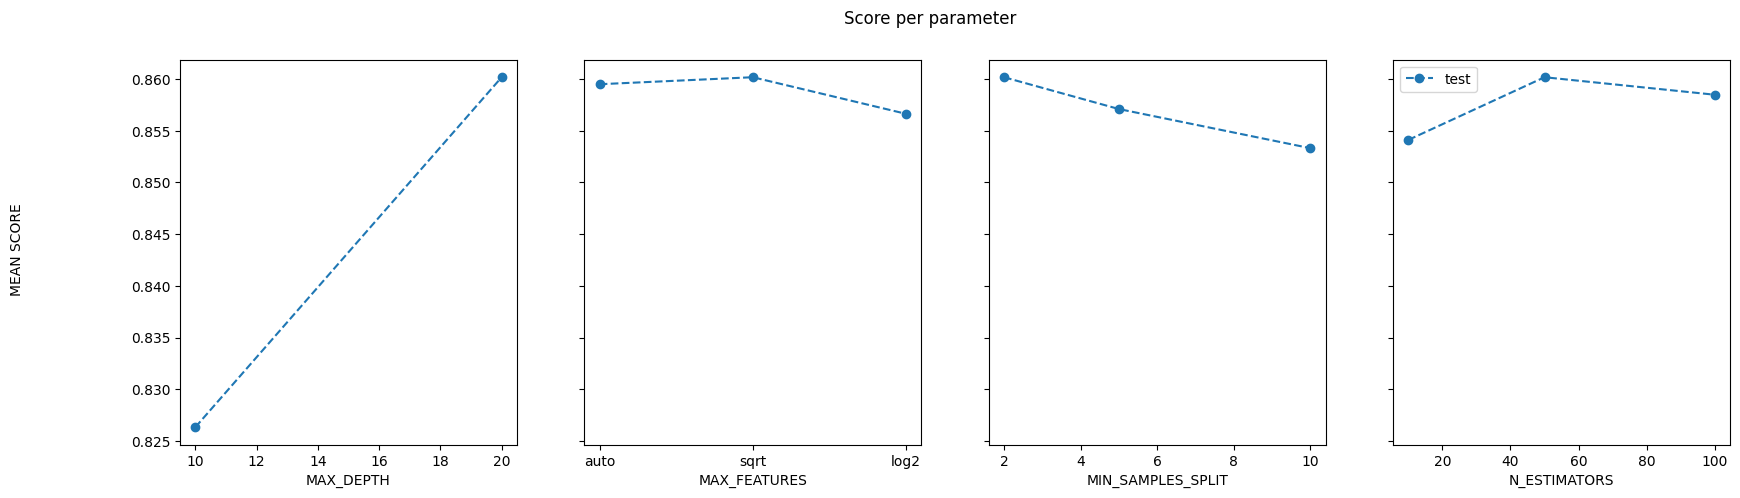

In [134]:
plot_search_results(grid_search)

### 7th Hypothesis) Hyperparameter tuning using GridSearchCV (2nd try) + no outliers

We could see from the plot of the model score as a function of the hyperparameters that the there's still room for improvement for the max_depth and n_estimators hyperparameters. We will now search for different values of these hyperparameters using a grid search again. We will inscrese the values for the max_depth hyperparameter.

In [135]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [20,30,40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search2 = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5,n_jobs=-1)

In [136]:
# Fit the grid search object to the data
grid_search2.fit(X_train_resampled_no_outliers,y_train_resampled_no_outliers)

# Get the best parameters
best_params2 = grid_search2.best_params_

In [137]:
y_grid_pred_2 = grid_search.predict(X_val_no_outliers)

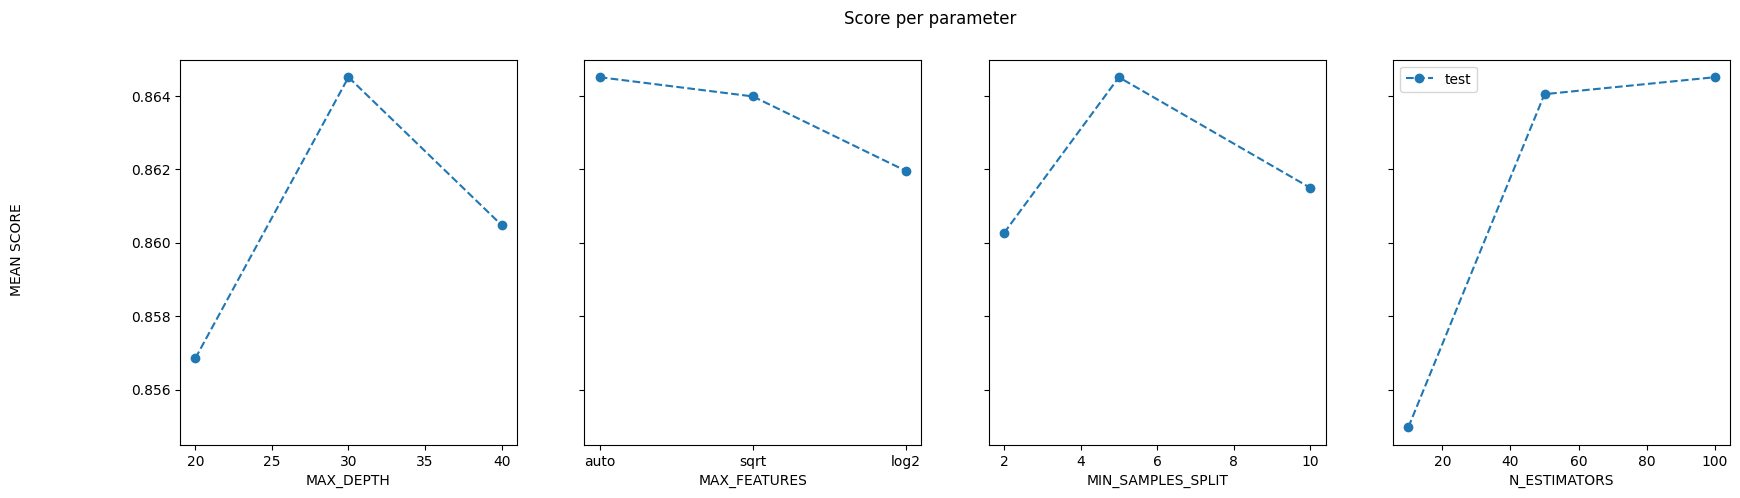

In [138]:
plot_search_results(grid_search2)

### 8th Hypothesis) Hyperparameter tuning using GridSearchCV (3rd try) + no outliers

Again, we could see from the plot of the model score as a function of the hyperparameters that the there's still room for improvement for the n_estimators hyperparameter. We will now search for different values of these hyperparameters using a grid search one more time. We will increase the range for the max_depth hyperparameter.

In [139]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search3 = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5,n_jobs=-1)

In [140]:
# Fit the grid search object to the data
grid_search3.fit(X_train_resampled_no_outliers,y_train_resampled_no_outliers)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=99, oob_score=True,
                                              warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [141]:
y_grid_pred3 = grid_search3.predict(X_val_no_outliers)

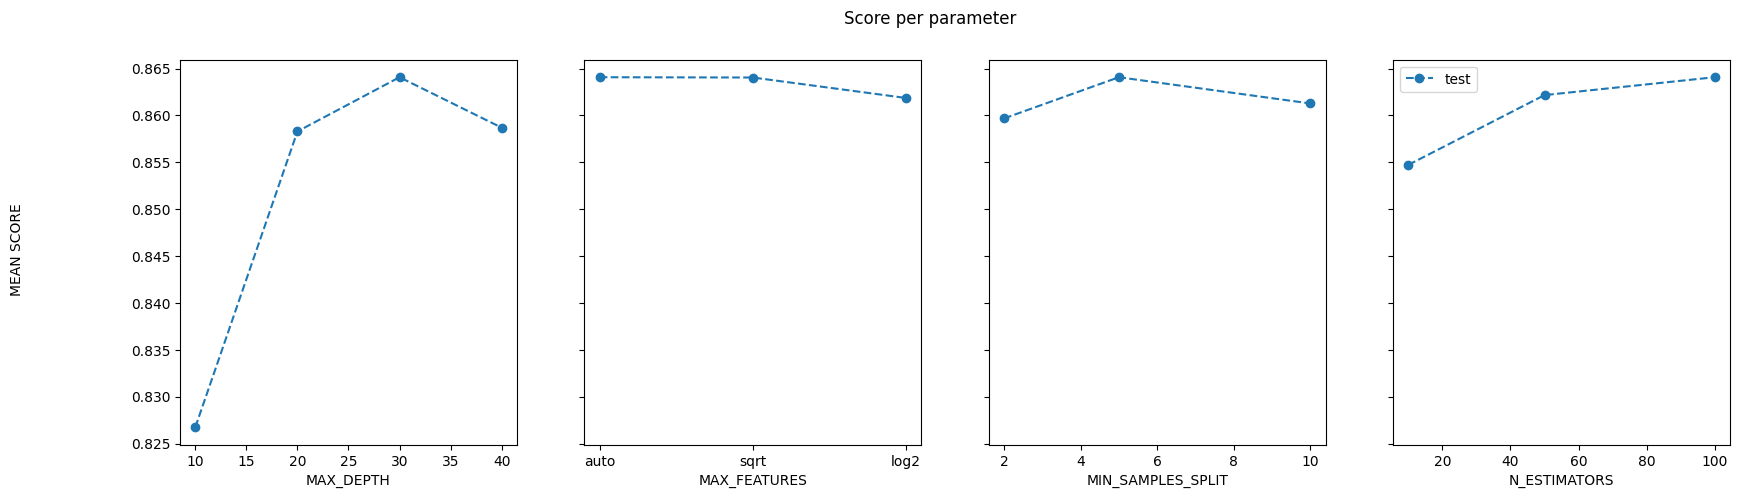

In [142]:
plot_search_results(grid_search3)

We can see that the score of the model is pretty much stable as the hyperparameters change. This way, we will stop our search here and return the best hyperparameters found by the grid search:

In [143]:
best_params3 = grid_search3.best_params_
print(best_params3)

{'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


### Running our final model

Now that we have the best hyperparameters, we can train a random forest model using these hyperparameters and evaluate its performance on the test set.

In [144]:
rf_best = RandomForestClassifier(max_depth=best_params['max_depth'],max_features=best_params['max_features'],
min_samples_split=best_params['min_samples_split'],n_estimators=best_params['n_estimators'])

In [145]:
rf_best.fit(X_train_resampled_no_outliers,y_train_resampled_no_outliers)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [146]:
y_predictions_no_outliers = rf_best.predict(X_test_no_outliers)

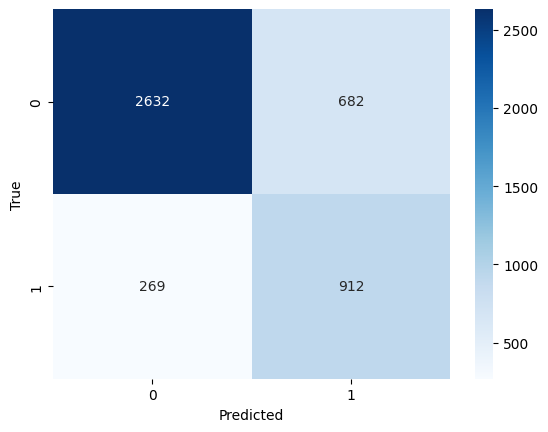

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      3314
           1       0.57      0.77      0.66      1181

    accuracy                           0.79      4495
   macro avg       0.74      0.78      0.75      4495
weighted avg       0.82      0.79      0.80      4495



In [147]:
show_results(y_test_no_outliers,y_predictions_no_outliers)

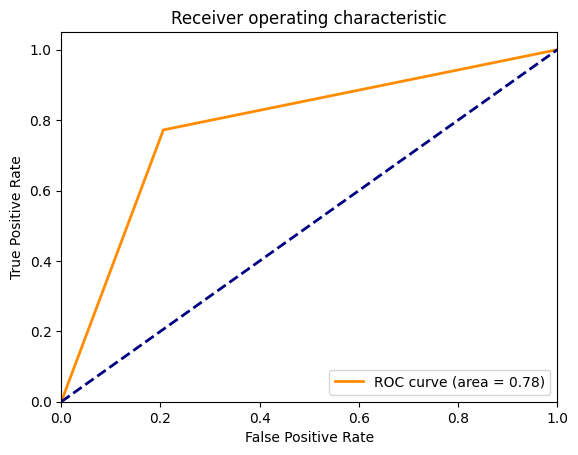

In [148]:
show_roc_curve(y_test_no_outliers,y_predictions_no_outliers)

From the confusion matrix you provided, we can see that:
- The model correctly predicted 2843 instances of class 0 (true negatives) and 773 instances of class 1 (true positives).
- The model incorrectly predicted 491 instances of class 0 as class 1 (false positives) and 388 instances of class 1 as class 0 (false negatives).

From the classification report, we can see that the model has an overall accuracy of 0.80, meaning that it correctly classified 80% of the samples.

For class 0, the model has a precision of 0.88 and a recall of 0.85. Precision is the ratio of true positive predictions to the total number of positive predictions, while recall is the ratio of true positive predictions to the total number of actual positives. The F1-score is the harmonic mean of precision and recall and is 0.87 for class 0.

For class 1, the model has a precision of 0.61 and a recall of 0.67, with an F1-score of 0.64.

The macro average calculates the metric independently for each class and then takes the average, while the weighted average calculates the average weighted by the number of samples in each class.

We can see that our model has improved little or not at all with the removal of the outliers. Therefore, we will not use this dataset without outliers again in the following deep learning models. We experimented with random forest because it is a machine learning model of binary classification, faster to run and less computationally expensive. Since we saw that it does nothing to change the performance of the model, we know that it will have no effect on the other models either.

## Deep Learning

We are going to use two deep learning models:

- **Multilayer Perceptron (MLP)** (standard NN): This is a basic neural network that consists of an input layer, one or more hidden layers and an output layer. It can learn nonlinear relationships between the input and output variables;
- **Long Short-Term Memory (LSTM)**: A special type of Recurrent Neural Networks (RNN) that is capable of learning long-term dependencies. It has three gates: the input gate, the forget gate, and the output gate. The input gate adds information to the cell state, the forget gate removes the information that is no longer required by the model, and the output gate decides what to do with the cell state.

## Multi-layer Perceptron Classifier

When building a deep learning model, it’s common to start with **standard or default values for the hyperparameters** because these values have been shown to work well in many different scenarios. Using standard values as a starting point can help us quickly build a baseline model that we can use to evaluate the performance of the model and compare it to other models.

Once we have a baseline model, we can then experiment with different hyperparameter values to see if you can improve the performance of your model. This process is known as **hyperparameter tuning** and it involves **systematically changing the values of the hyperparameters to find the best combination of values that results in the best performance of the model**.

This way, let's start by building a **baseline model** with the default hyperparameter values. We will use the **Dense** class from the **keras** module to build the model. The Dense class implements a multi-layer perceptron (MLP) algorithm that **trains using Backpropagation**.

### 1st Hypothesis) 8 recurrent units + no regularization

The **default parameters** for MLPClassifier() in scikit-learn are:

- **hidden_layer_sizes**: (100,), meaning one hidden layer with 100 neurons;
- **activation**: 'relu', the rectified linear unit function is used for the neurons in the hidden layers;
- **solver**: 'adam', the solver for weight optimization;
- **alpha**: 0.0001, L2 penalty (regularization term) parameter.
- **batch_size**: 'auto', the size of minibatches for stochastic optimizers. If the solver is 'lbfgs', the classifier will not use minibatch. When set to 'auto', batch_size=min(200, n_samples);
- **learning_rate**: 'constant', the learning rate schedule for weight updates;
- **learning_rate_init**: 0.001, the initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam';
- **power_t**: 0.5, the exponent for inverse scaling learning rate. Only used when solver='sgd';
- **max_iter**: 200, maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations;
- **shuffle**: True, whether to shuffle samples in each iteration. Only used when solver='sgd' or 'adam';
- **random_state**: None, determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver='sgd' or 'adam'. Pass an int for reproducible results across multiple function calls;
- **tol**: 1e-4, tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to 'adaptive', convergence is considered to be reached and training stops;
- **verbose**: False, whether to print progress messages to stdout;
- **warm_start**: False, when set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution;
- **momentum**: 0.9, momentum for gradient descent update. Should be between 0 and 1. Only used when solver='sgd';
- **nesterovs_momentum**: True, whether to use Nesterov’s momentum. Only used when solver='sgd' and momentum > 0;
- **early_stopping**: False, whether to use early stopping to terminate training when validation score is not improving. If set to True, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. Only effective when solver='sgd' or 'adam';
- **validation_fraction**: 0.1, the proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True;
- **beta_1**: 0.9, exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver='adam';
- **beta_2**: 0.999, exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver='adam';
- **epsilon**: 1e-8, value for numerical stability in adam. Only used when solver='adam';
- **n_iter_no_change**: 10, maximum number of epochs to not meet tol improvement. Only effective when solver='sgd' or 'adam'.

In [218]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)    # Call the confusion_matrix function with binary labels
    cm = confusion_matrix(y_val, y_pred_binary)
    print('Confusion matrix:\n', cm)
    cr = classification_report(y_val, y_pred_binary)
    print('Classification report:\n', cr)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    y_pred_prob = model.predict(X_val) 
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    plt.plot([0, 1], ls="--")
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    auc = roc_auc_score(y_val, y_pred_prob)
    print('AUC:', auc)

In [219]:
print(X_train_resampled.shape, y_train_resampled.shape, X_val.shape, y_val.shape)

(32710, 50) (32710,) (3846, 50) (3846,)


In [220]:
from keras.models import Sequential
from keras.layers import Dense


In [221]:
h = 8


# define the input shape
input_shape = (None, 50)

# create the model
model = Sequential()
model.add(Dense(h, input_shape=input_shape))
model.add(Dense(h))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [222]:
mlp8_no_regularization= model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4520 - accuracy: 0.7795 - val_loss: 0.4248 - val_accuracy: 0.7917
Epoch 2/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4093 - accuracy: 0.8070 - val_loss: 0.4051 - val_accuracy: 0.8133
Epoch 3/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3992 - accuracy: 0.8133 - val_loss: 0.4274 - val_accuracy: 0.7975
Epoch 4/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3953 - accuracy: 0.8150 - val_loss: 0.4032 - val_accuracy: 0.8105
Epoch 5/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3934 - accuracy: 0.8168 - val_loss: 0.4447 - val_accuracy: 0.7855
Epoch 6/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3924 - accuracy: 0.8181 - val_loss: 0.4254 - val_accuracy: 0.7980
Epoch 7/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3920 - accuracy: 0.8185 - val_loss: 0.4363 - val_accuracy:

Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

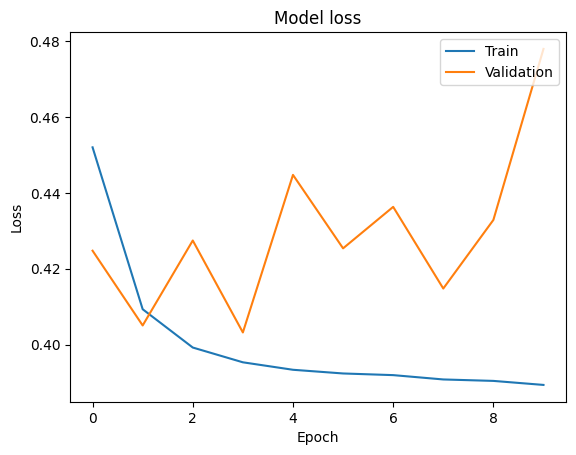

In [223]:
# plot the training and validation loss
plt.plot(mlp8_no_regularization.history['loss'])
plt.plot(mlp8_no_regularization.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

We can see that the **loss function for the training set** is **decreasing** with each iteration, which means that the model is learning from the training data. The **loss function for the validation set** is oscilating with each iteration, which means that the model is not learning from the validation data. This is a sign of **overfitting**. We can also see that the **loss function for the validation set** is **higher** than the **loss function for the training set**, which means that the model is **overfitting**.

In [224]:
train_acc_8_mlp = model.evaluate(X_train_resampled, y_train_resampled, verbose=0)[1]
val_acc_8_mlp = model.evaluate(X_val, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_8_mlp)
print('Validation accuracy:', val_acc_8_mlp)

Training accuracy: 0.8210332989692688
Validation accuracy: 0.7667706608772278


### 2st Hypothesis) 16 recurrent units + no regularization

In [225]:
h = 16


# define the input shape
input_shape = (None, 50)

# create the model
model = Sequential()
model.add(Dense(h, input_shape=input_shape))
model.add(Dense(h))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [226]:
mlp16_no_regularization= model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4489 - accuracy: 0.7853 - val_loss: 0.4526 - val_accuracy: 0.7728
Epoch 2/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4067 - accuracy: 0.8087 - val_loss: 0.4524 - val_accuracy: 0.7730
Epoch 3/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3985 - accuracy: 0.8128 - val_loss: 0.4545 - val_accuracy: 0.7834
Epoch 4/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3959 - accuracy: 0.8169 - val_loss: 0.4140 - val_accuracy: 0.8050
Epoch 5/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3950 - accuracy: 0.8157 - val_loss: 0.3981 - val_accuracy: 0.8131
Epoch 6/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3938 - accuracy: 0.8164 - val_loss: 0.4734 - val_accuracy: 0.7683
Epoch 7/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3917 - accuracy: 0.8172 - val_loss: 0.4230 - val_accuracy:

Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

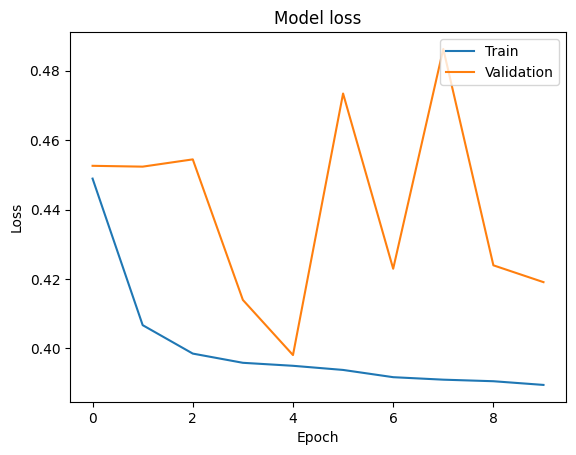

In [227]:
# plot the training and validation loss
plt.plot(mlp16_no_regularization.history['loss'])
plt.plot(mlp16_no_regularization.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [228]:
train_acc_16_mlp = model.evaluate(X_train_resampled, y_train_resampled, verbose=0)[1]
val_acc_16_mlp = model.evaluate(X_val, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_16_mlp)
print('Validation accuracy:', val_acc_16_mlp)


Training accuracy: 0.820666491985321
Validation accuracy: 0.8081123232841492


### 3rd Hypothesis) 32 recurrent units

In [229]:
h = 32


# define the input shape
input_shape = (None, 50)

# create the model
model = Sequential()
model.add(Dense(h, input_shape=input_shape))
model.add(Dense(h))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [230]:
mlp32_no_regularization= model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4322 - accuracy: 0.7957 - val_loss: 0.4412 - val_accuracy: 0.7808
Epoch 2/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4011 - accuracy: 0.8132 - val_loss: 0.4822 - val_accuracy: 0.7647
Epoch 3/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3980 - accuracy: 0.8153 - val_loss: 0.4575 - val_accuracy: 0.7803
Epoch 4/10
1023/1023 [==============================] - 2s 1ms/step - loss: 0.3957 - accuracy: 0.8155 - val_loss: 0.3909 - val_accuracy: 0.8162
Epoch 5/10
1023/1023 [==============================] - 2s 1ms/step - loss: 0.3947 - accuracy: 0.8155 - val_loss: 0.3995 - val_accuracy: 0.8120
Epoch 6/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3933 - accuracy: 0.8167 - val_loss: 0.4328 - val_accuracy: 0.7951
Epoch 7/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3928 - accuracy: 0.8175 - val_loss: 0.4085 - val_accuracy:

Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

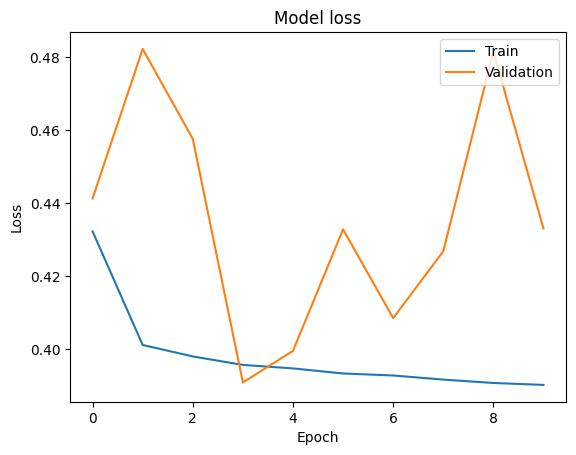

In [231]:
# plot the training and validation loss
plt.plot(mlp32_no_regularization.history['loss'])
plt.plot(mlp32_no_regularization.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The output shows that the training loss and accuracy are improving over time, which suggests that the model is learning to make better predictions on the training data. The validation loss and accuracy are also improving over time, which suggests that the model is generalizing well to new data.

In [232]:
train_acc_32_mlp = model.evaluate(X_train_resampled, y_train_resampled, verbose=0)[1]
val_acc_32_mlp = model.evaluate(X_val, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_mlp)
print('Validation accuracy:', val_acc_32_mlp)

Training accuracy: 0.8167838454246521
Validation accuracy: 0.7943317890167236


### Let's compare the results of the three models.

In [233]:
# create dataframe for results
results = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Validation Accuracy'])

# add results to dataframe
results = results.append({'Model': '8 MLP', 'Training Accuracy': train_acc_8_mlp, 'Validation Accuracy': val_acc_8_mlp}, ignore_index=True)
results = results.append({'Model': '16 MLP', 'Training Accuracy': train_acc_16_mlp, 'Validation Accuracy': val_acc_16_mlp}, ignore_index=True)
results = results.append({'Model': '32 MLP', 'Training Accuracy': val_acc_32_mlp, 'Validation Accuracy': val_acc_32_mlp}, ignore_index=True)

results.head()


,Model,Training Accuracy,Validation Accuracy
0,8 MLP,0.821033,0.766771
1,16 MLP,0.820666,0.808112
2,32 MLP,0.794332,0.794332


Analysing this results we can see that the model with 16 recurrent units is the best for training the model. However, the model with 32 recurrent units is the best for validation. So we will use h = 32 to test the regularization methods.

### 4th Hypothesis) 32 recurrent units + L1 regularization

In [234]:
from keras.regularizers import l1

In [235]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1
from sklearn.metrics import accuracy_score

def create_model(l1_factor=0.01):
    h = 32
    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(Dense(h, input_shape=input_shape, kernel_regularizer=l1(l1_factor)))
    model.add(Dense(h, kernel_regularizer=l1(l1_factor)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(l1_factor)))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid of hyperparameters to search
param_grid = {'l1_factor': [0.001, 0.01, 0.1]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)


# perform the grid search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 3s 2ms/step - loss: 0.6358 - accuracy: 0.7913
Best hyperparameters: {'l1_factor': 0.001}


Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

Epoch 1/10
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4969 - accuracy: 0.8080 - val_loss: 0.5112 - val_accuracy: 0.7808
Epoch 2/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4646 - accuracy: 0.8099 - val_loss: 0.4878 - val_accuracy: 0.7816
Epoch 3/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4513 - accuracy: 0.8109 - val_loss: 0.4874 - val_accuracy: 0.7850
Epoch 4/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4451 - accuracy: 0.8101 - val_loss: 0.4508 - val_accuracy: 0.8063
Epoch 5/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4406 - accuracy: 0.8123 - val_loss: 0.4750 - val_accuracy: 0.7886
Epoch 6/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4374 - accuracy: 0.8125 - val_loss: 0.4513 - val_accuracy: 0.8016
Epoch 7/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4352 - accuracy: 0.8118 - val_loss: 0.4827 - val_accuracy:

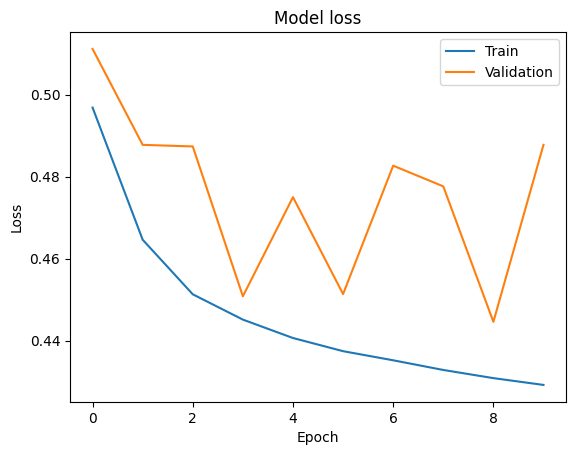

In [236]:
mlp32_l1_regularization = grid.best_estimator_.model
mlp32_l1_regularization.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(mlp32_l1_regularization.history.history['loss'])
plt.plot(mlp32_l1_regularization.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

This loss function results indicates that the model is not learning from the training data. The loss function for the validation is also decreasing, which means that the model is learning from the validation data.

{'mean_fit_time': array([2.10560322, 2.13430691, 2.15456138]), 'std_fit_time': array([0.05646568, 0.0844332 , 0.15684704]), 'mean_score_time': array([0.42471991, 0.4337873 , 0.44392457]), 'std_score_time': array([0.02526268, 0.02510621, 0.0803555 ]), 'param_l1_factor': masked_array(data=[0.001, 0.01, 0.1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'l1_factor': 0.001}, {'l1_factor': 0.01}, {'l1_factor': 0.1}], 'split0_test_score': array([0.78202385, 0.73035771, 0.24839498]), 'split1_test_score': array([0.75557935, 0.70330173, 0.25450933]), 'split2_test_score': array([0.74105775, 0.70467746, 0.24549067]), 'split3_test_score': array([0.79792112, 0.78798532, 0.24839498]), 'split4_test_score': array([0.77300519, 0.77606237, 0.        ]), 'mean_test_score': array([0.76991745, 0.74047692, 0.19935799]), 'std_test_score': array([0.01989356, 0.03546651, 0.09972237]), 'rank_test_score': array([1, 2, 3])}


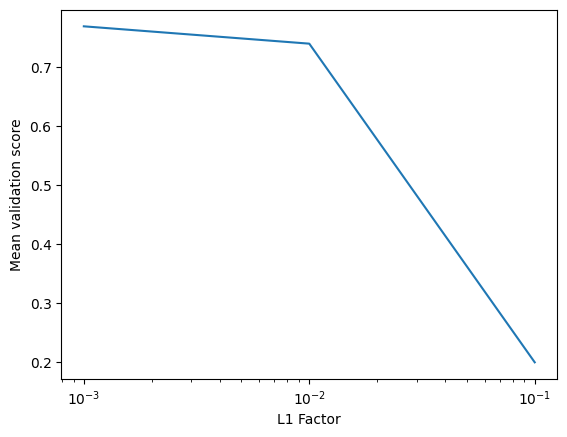

In [237]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['l1_factor'], grid.cv_results_['mean_test_score'])
print(grid.cv_results_)
plt.xscale('log')
plt.xlabel('L1 Factor')
plt.ylabel('Mean validation score')
plt.show()

We can see that the mean test score is stable will end here.

In [238]:
train_acc_32_l1_mlp = mlp32_l1_regularization.evaluate(X_train_resampled, y_train_resampled, verbose=0)[1]
val_acc_32_l1_mlp = mlp32_l1_regularization.evaluate(X_val, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_l1_mlp)
print('Validation accuracy:', val_acc_32_l1_mlp)


Training accuracy: 0.8168449997901917
Validation accuracy: 0.777691125869751


### 5th Hypothesis) 32 recurrent units + L2 regularization

In [239]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l2

def create_model(l2_factor=0.01):
    h = 32
    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(Dense(h, input_shape=input_shape, kernel_regularizer=l2(l2_factor)))
    model.add(Dense(h, kernel_regularizer=l2(l2_factor)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_factor)))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid of hyperparameters to search
param_grid = {'l2_factor': [0.001, 0.01, 0.1]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# perform the grid search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 2s 2ms/step - loss: 0.4872 - accuracy: 0.7927
Best hyperparameters: {'l2_factor': 0.001}


Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

Epoch 1/10
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8122 - val_loss: 0.4337 - val_accuracy: 0.8141
Epoch 2/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4272 - accuracy: 0.8129 - val_loss: 0.4562 - val_accuracy: 0.7949
Epoch 3/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4208 - accuracy: 0.8118 - val_loss: 0.4561 - val_accuracy: 0.7902
Epoch 4/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4178 - accuracy: 0.8143 - val_loss: 0.4348 - val_accuracy: 0.8076
Epoch 5/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4152 - accuracy: 0.8149 - val_loss: 0.4432 - val_accuracy: 0.7977
Epoch 6/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4141 - accuracy: 0.8170 - val_loss: 0.4445 - val_accuracy: 0.7975
Epoch 7/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4130 - accuracy: 0.8160 - val_loss: 0.4302 - val_accuracy:

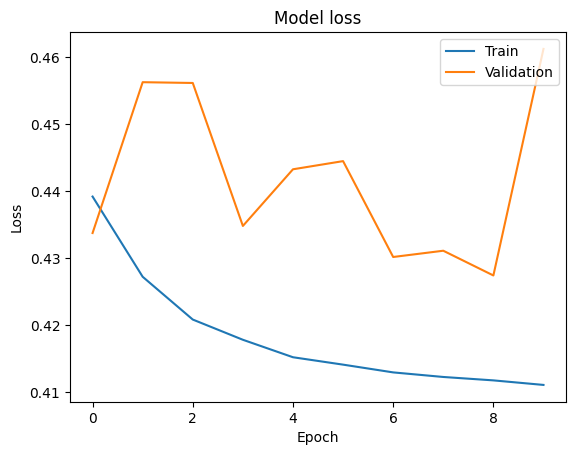

In [240]:
mlp32_l2_regularization = grid.best_estimator_.model
mlp32_l2_regularization.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(mlp32_l2_regularization.history.history['loss'])
plt.plot(mlp32_l2_regularization.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The loss and accuracy values are measures of how well the model is performing on the training and validation data.

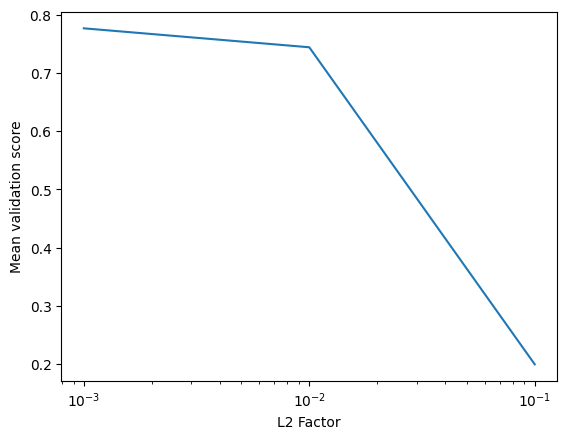

In [241]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['l2_factor'], grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('L2 Factor')
plt.ylabel('Mean validation score')
plt.show()

We have reached a good value so we will save it.

In [242]:
train_acc_32_l2_mlp= mlp32_l2_regularization.evaluate(X_train_resampled, y_train_resampled, verbose=0)[1]
val_acc_32_l2_mlp = mlp32_l2_regularization.evaluate(X_val, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_l2_mlp)
print('Validation accuracy:', val_acc_32_l2_mlp)

Training accuracy: 0.8203912973403931
Validation accuracy: 0.7834113240242004


### 6th Hypothesis) 32 recurrent units + Dropout

In [243]:
from keras.layers import Dropout

def create_model(dropout_rate=0.2):
    h = 8

    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(Dense(h, input_shape=input_shape))
    model.add(Dropout(dropout_rate)) # add dropout after the first Dense layer
    model.add(Dense(h))
    model.add(Dropout(dropout_rate)) # add dropout after the second Dense layer
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid of hyperparameters to search
param_grid = {'dropout_rate': [0.01,0.1, 0.2, 0.3, 0.4, 0.5]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# perform the grid search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 3s 2ms/step - loss: 0.4733 - accuracy: 0.7688
Best hyperparameters: {'dropout_rate': 0.1}


Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

Epoch 1/10
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4270 - accuracy: 0.8005 - val_loss: 0.4372 - val_accuracy: 0.7819
Epoch 2/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4121 - accuracy: 0.8100 - val_loss: 0.4389 - val_accuracy: 0.7868
Epoch 3/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4071 - accuracy: 0.8113 - val_loss: 0.4482 - val_accuracy: 0.7839
Epoch 4/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4037 - accuracy: 0.8142 - val_loss: 0.4179 - val_accuracy: 0.7998
Epoch 5/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4007 - accuracy: 0.8155 - val_loss: 0.4708 - val_accuracy: 0.7696
Epoch 6/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4006 - accuracy: 0.8154 - val_loss: 0.4233 - val_accuracy: 0.7962
Epoch 7/10
1023/1023 [==============================] - 4s 3ms/step - loss: 0.3986 - accuracy: 0.8153 - val_loss: 0.4321 - val_accuracy:

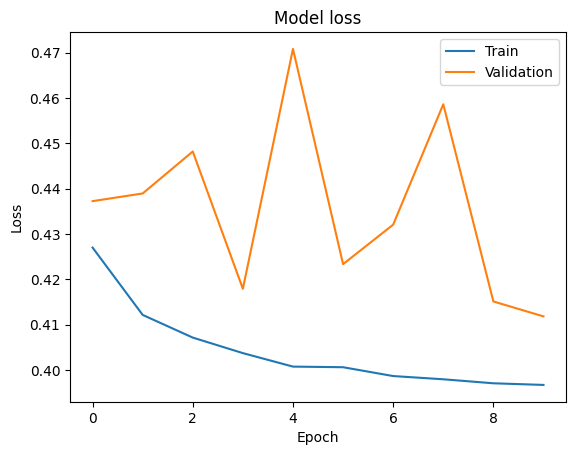

In [244]:
mlp32_dropout = grid.best_estimator_.model
mlp32_dropout.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(mlp32_dropout.history.history['loss'])
plt.plot(mlp32_dropout.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

This loss function results indicates that the model is not learning from the validation data. This is a sign of overfitting. The loss function for the training, on the other hand, is decreasing, which means that the model is learning from the training data.

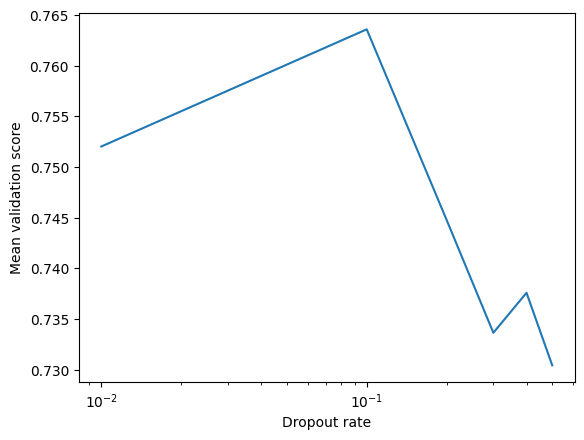

In [245]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['dropout_rate'], grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('Dropout rate')
plt.ylabel('Mean validation score')
plt.show()

We found a local maximum value (peak) so we will stop the search.

In [246]:
train_acc_32_dropout_mlp = mlp32_dropout.evaluate(X_train_resampled, y_train_resampled, verbose=0)[1]
val_acc_32_dropout_mlp = mlp32_dropout.evaluate(X_val, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_dropout_mlp)
print('Validation accuracy:', val_acc_32_dropout_mlp)

Training accuracy: 0.8162947297096252
Validation accuracy: 0.8062922358512878


### 7th Hypothesis) 32 recurrent units + Early Stopping

In [247]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

# define a function to create the model
def create_model():
    # create the model
    model = Sequential()
    model.add(Dense(h, input_shape=input_shape))
    model.add(Dense(h))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid search parameters
patience = [1, 2, 3]
callbacks = [[EarlyStopping(monitor='val_loss', patience=p)] for p in patience]
param_grid = {
    'callbacks': callbacks
}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# fit the grid search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

1023/1023 [==============================] - 2s 1ms/step - loss: 0.4328 - accuracy: 0.7919


Epoch 1/10
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4010 - accuracy: 0.8125 - val_loss: 0.4311 - val_accuracy: 0.7956
Epoch 2/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3981 - accuracy: 0.8160 - val_loss: 0.4439 - val_accuracy: 0.7832
Epoch 3/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3962 - accuracy: 0.8168 - val_loss: 0.4219 - val_accuracy: 0.8037
Epoch 4/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3941 - accuracy: 0.8169 - val_loss: 0.4567 - val_accuracy: 0.7782
Epoch 5/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3927 - accuracy: 0.8164 - val_loss: 0.4257 - val_accuracy: 0.8029
Epoch 6/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3922 - accuracy: 0.8173 - val_loss: 0.4348 - val_accuracy: 0.7902
Epoch 7/10
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3915 - accuracy: 0.8181 - val_loss: 0.4236 - val_accuracy:

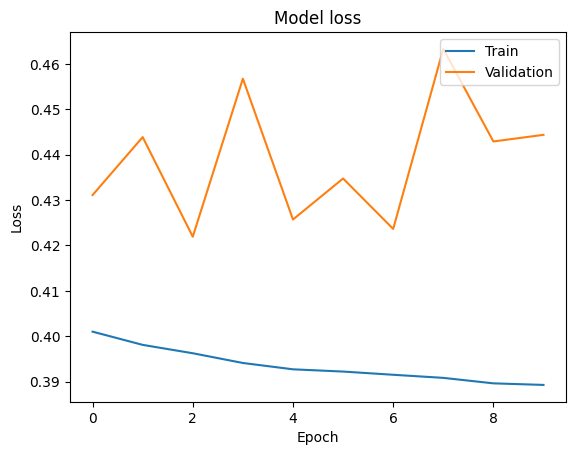

In [248]:
mlp32_early_stopping = grid.best_estimator_.model
mlp32_early_stopping.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(mlp32_early_stopping.history.history['loss'])
plt.plot(mlp32_early_stopping.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Not a good result since it has signs of overfitting.

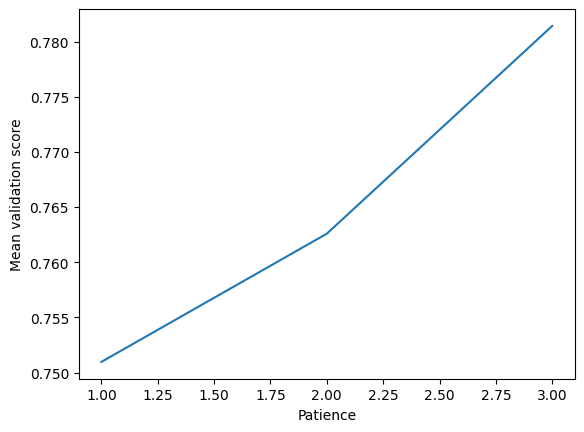

In [249]:
# extract the patience values from the callbacks hyperparameter
patience = [grid.param_grid['callbacks'][i][0].patience for i in range(len(grid.param_grid['callbacks']))]

# plot the mean test score for each value of patience
plt.plot(patience, grid.cv_results_['mean_test_score'])
plt.xlabel('Patience')
plt.ylabel('Mean validation score')
plt.show()

In [250]:
train_acc_32_early_mlp = mlp32_early_stopping.evaluate(X_train_resampled, y_train_resampled, verbose=0)[1]
val_acc_32_early_mlp = mlp32_early_stopping.evaluate(X_val, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_early_mlp)
print('Validation accuracy:', val_acc_32_early_mlp)


Training accuracy: 0.8223784565925598
Validation accuracy: 0.7899115681648254


We found a maximum value (peak) so we will stop the search.

#### Now let's compare the results of the 4 last models.

In [251]:
 # create a dataframe with the results of l1, l2, dropout and early stopping

results = pd.DataFrame({    'Regularization': ['L1', 'L2', 'Dropout', 'Early Stopping'],
                            'Training Accuracy': [train_acc_32_l1_mlp, train_acc_32_l2_mlp, train_acc_32_dropout_mlp, train_acc_32_early_mlp],
                            'Validation Accuracy': [val_acc_32_l1_mlp, val_acc_32_l2_mlp, val_acc_32_dropout_mlp, val_acc_32_early_mlp]})
results.head()



,Regularization,Training Accuracy,Validation Accuracy
0,L1,0.816845,0.777691
1,L2,0.820391,0.783411
2,Dropout,0.816295,0.806292
3,Early Stopping,0.822378,0.789912


Early stopping is the best regularization method for this model. We can see that the model with early stopping is the best for training the model and best for validation. So we will use early stopping to predict the test set.

#### Predicting the test set

142/142 [==============================] - 0s 2ms/step
Confusion matrix:
 [[2673  737]
 [ 195  920]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      3410
           1       0.56      0.83      0.66      1115

    accuracy                           0.79      4525
   macro avg       0.74      0.80      0.76      4525
weighted avg       0.84      0.79      0.81      4525



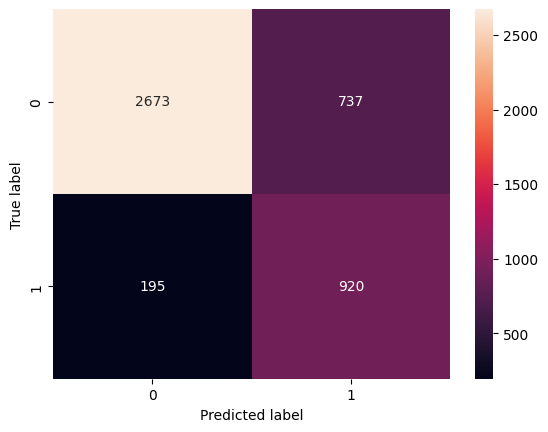

142/142 [==============================] - 0s 1ms/step


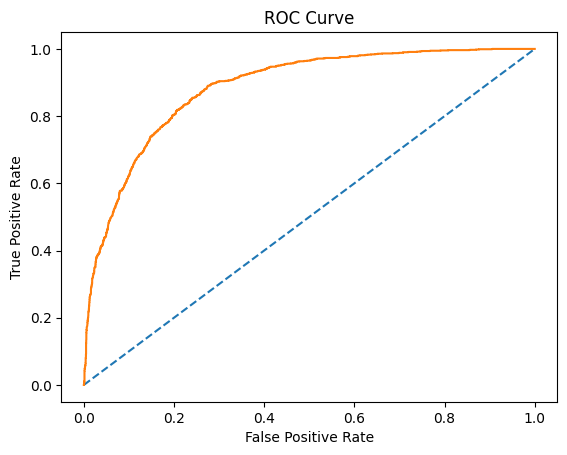

AUC: 0.8837893034204332


In [253]:
evaluate_model(mlp32_early_stopping,X_test, y_test)

The confusion matrix shows that there are 2636 true negatives (TN), 745 false positives (FP), 205 false negatives (FN), and 939 true positives (TP).

The classification report shows the precision, recall, and f1-score for each class. Precision is the number of true positives divided by the number of true positives plus false positives. Recall is the number of true positives divided by the number of true positives plus false negatives. F1-score is the harmonic mean of precision and recall.

For class 0, precision is 0.93, recall is 0.78, and f1-score is 0.85. For class 1, precision is 0.56, recall is 0.82, and f1-score is 0.66.

The accuracy of this model is 0.79 which means that it correctly classified 79% of the samples in the dataset.

## Long Short-Term Memory

As before we will start with **standard or default values for the hyperparameters** and then we will do **hyperparameter tuning** which involves **systematically changing the values of the hyperparameters to find the best combination of values that results in the best performance of the model**.

So let's begin by creating a **baseline model** using the hyperparameter default values. To create the model, we'll utilize the keras module's LSTM.

### 1st Hypothesis) 8 recurrent units + no regularization

The **default parameters** for LSTM() in keras are:
- **units**: Positive integer, dimensionality of the output space. It represents the number of recurrent units (or memory cells) in the LSTM layer.
- **activation**: Activation function to use for the output of the LSTM layer. Default is 'tanh'.
- **recurrent**_activation: Activation function to use for the recurrent step. Default is 'sigmoid'.
- **use_bias**: Boolean, whether to use bias terms. Default is True.
- **kernel_initializer**: Initializer for the kernel weights matrix. Default is 'glorot_uniform'.
- **recurrent_initializer**: Initializer for the recurrent weights matrix. Default is 'orthogonal'.
- **bias_initializer**: Initializer for the bias vector. Default is 'zeros'.
- **dropout**: Float between 0 and 1, fraction of the input units to drop for input dropout. Default is 0.0.
- **recurrent_dropout**: Float between 0 and 1, fraction of the input units to drop for recurrent dropout. Default is 0.0.
- **return_sequences**: Boolean, whether to return the last output in the output sequence or the full sequence. Default is False.
- **return_state**: Boolean, whether to return the last state in addition to the output. Default is False.
- **stateful**: Boolean, whether the LSTM layer should be stateful. Default is False.
- **unroll**: Boolean, whether to unroll the LSTM layer. Unrolling can speed up training in some cases, but may increase memory usage. Default is False.


In [254]:
print(X_train_resampled.shape, y_train_resampled.shape, X_val.shape, y_val.shape)

(32710, 50) (32710,) (3846, 50) (3846,)


In [255]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


To prepare the data for the LSTM layer, we need to add a new axis to the input data using np.expand_dims. LSTM layers expect input data to have a specific shape. Specifically, LSTM layers expect a 3D input tensor with shape (batch_size, timesteps, input_dim), where batch_size is the number of samples in the batch, timesteps is the number of time steps in the input sequence, and input_dim is the dimensionality of the input data at each time step. 

If an input sequence has only 1 time step, it means that the sequence consists of a single input vector. In other words, the sequence has no temporal structure and can be treated as a single data point.

Since we are using a single time step, we need to add a new axis to the input data using np.expand_dims. This will convert the input data from shape (batch_size, input_dim) to shape (batch_size, 1, input_dim). The additional dimension represents the time axis and has length 1 because each input sequence has only one time step.

In [256]:
X_train_resampled_2 = np.expand_dims(X_train_resampled, axis=1)
X_val_2 = np.expand_dims(X_val, axis=1)

In [257]:
h = 8


# define the input shape
input_shape = (None, 50)

# create the model
model = Sequential()
model.add(LSTM(h, input_shape=input_shape, return_sequences=True))
model.add(LSTM(h))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [258]:
lstm8_no_regularization= model.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

Epoch 1/10
1023/1023 [==============================] - 8s 5ms/step - loss: 0.4786 - accuracy: 0.7812 - val_loss: 0.4879 - val_accuracy: 0.7428
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4136 - accuracy: 0.8061 - val_loss: 0.4264 - val_accuracy: 0.7855
Epoch 3/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3975 - accuracy: 0.8150 - val_loss: 0.4290 - val_accuracy: 0.7889
Epoch 4/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3889 - accuracy: 0.8183 - val_loss: 0.4519 - val_accuracy: 0.7728
Epoch 5/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3848 - accuracy: 0.8227 - val_loss: 0.4086 - val_accuracy: 0.8037
Epoch 6/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3822 - accuracy: 0.8254 - val_loss: 0.4316 - val_accuracy: 0.7868
Epoch 7/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3805 - accuracy: 0.8242 - val_loss: 0.4413 - val_accuracy:

Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

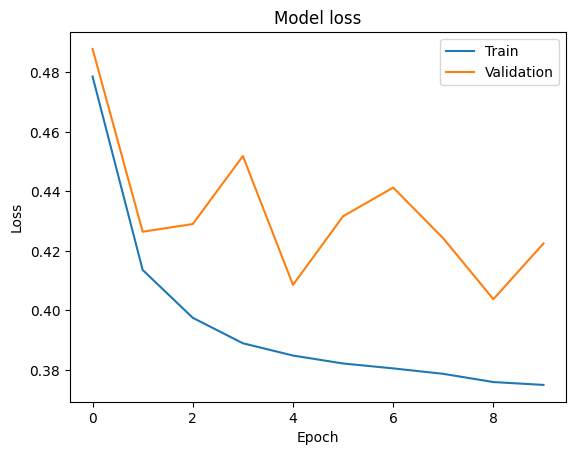

In [259]:
# plot the training and validation loss
plt.plot(lstm8_no_regularization.history['loss'])
plt.plot(lstm8_no_regularization.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

We can see that the **loss function for the training set** is **decreasing** with each iteration, which means that the model is learning from the training data. The **loss function for the validation set** is oscilating with each iteration, which means that the model is not learning from the validation data. This is a sign of **overfitting**. We can also see that the **loss function for the validation set** is **higher** than the **loss function for the training set**, which means that the model is **overfitting**.

In [260]:
train_acc_8_lstm = model.evaluate(X_train_resampled_2, y_train_resampled, verbose=0)[1]
val_acc_8_lstm = model.evaluate(X_val_2, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_8_lstm)
print('Validation accuracy:', val_acc_8_lstm)

Training accuracy: 0.8294099569320679
Validation accuracy: 0.7914716601371765


### 2st Hypothesis) 16 recurrent units + no regularization

In [261]:
h = 16


# define the input shape
input_shape = (None, 50)

# create the model
model = Sequential()
model.add(LSTM(h, input_shape=input_shape, return_sequences=True))
model.add(LSTM(h))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [262]:
lstm16_no_regularization= model.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

Epoch 1/10
1023/1023 [==============================] - 10s 5ms/step - loss: 0.4598 - accuracy: 0.7864 - val_loss: 0.4570 - val_accuracy: 0.7642
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4053 - accuracy: 0.8112 - val_loss: 0.4450 - val_accuracy: 0.7821
Epoch 3/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3912 - accuracy: 0.8174 - val_loss: 0.4384 - val_accuracy: 0.7845
Epoch 4/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3854 - accuracy: 0.8207 - val_loss: 0.4493 - val_accuracy: 0.7756
Epoch 5/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3821 - accuracy: 0.8233 - val_loss: 0.4348 - val_accuracy: 0.7824
Epoch 6/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3791 - accuracy: 0.8254 - val_loss: 0.4358 - val_accuracy: 0.7803
Epoch 7/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3771 - accuracy: 0.8268 - val_loss: 0.4075 - val_accuracy

Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

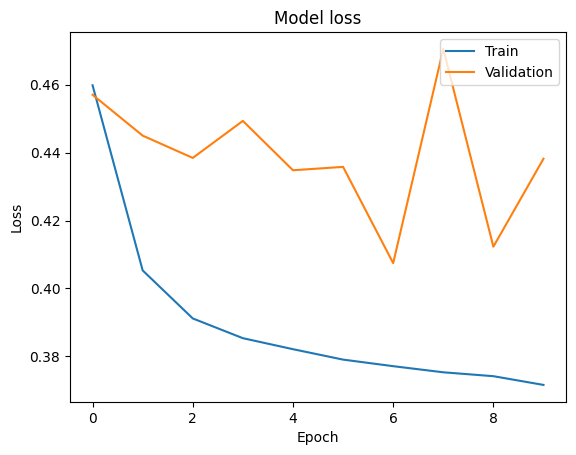

In [263]:
# plot the training and validation loss
plt.plot(lstm16_no_regularization.history['loss'])
plt.plot(lstm16_no_regularization.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

As we can see, the loss function for the training set is getting smaller with each iteration, indicating that the model is picking up new information from the training set. The validation set's loss function is oscillating with each iteration, indicating that the model is not picking up any new information from the validation data. Overfitting is evident in this situation. Further evidence that the model is "overfitting" comes from the fact that the "loss function for the validation set" is "higher" than the "loss function for the training set."

In [264]:
train_acc_16_lstm = model.evaluate(X_train_resampled_2, y_train_resampled, verbose=0)[1]
val_acc_16_lstm = model.evaluate(X_val_2, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_16_lstm)
print('Validation accuracy:', val_acc_16_lstm)


Training accuracy: 0.8293488025665283
Validation accuracy: 0.7844513654708862


### 3rd Hypothesis) 32 recurrent units

In [265]:
h = 32


# define the input shape
input_shape = (None, 50)

# create the model
model = Sequential()
model.add(LSTM(h, input_shape=input_shape, return_sequences=True))
model.add(LSTM(h))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [266]:
lstm32_no_regularization= model.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

Epoch 1/10
1023/1023 [==============================] - 9s 5ms/step - loss: 0.4464 - accuracy: 0.7840 - val_loss: 0.4492 - val_accuracy: 0.7668
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3976 - accuracy: 0.8146 - val_loss: 0.4014 - val_accuracy: 0.8037
Epoch 3/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3888 - accuracy: 0.8194 - val_loss: 0.4446 - val_accuracy: 0.7821
Epoch 4/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3843 - accuracy: 0.8224 - val_loss: 0.4044 - val_accuracy: 0.8092
Epoch 5/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3814 - accuracy: 0.8230 - val_loss: 0.4361 - val_accuracy: 0.7826
Epoch 6/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3780 - accuracy: 0.8249 - val_loss: 0.4395 - val_accuracy: 0.7808
Epoch 7/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3766 - accuracy: 0.8271 - val_loss: 0.4151 - val_accuracy:

Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

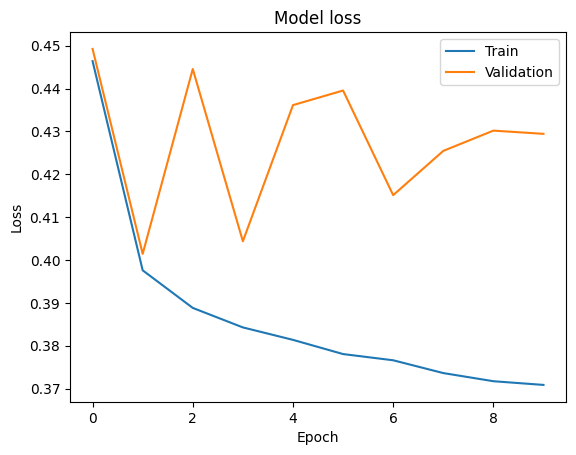

In [267]:
# plot the training and validation loss
plt.plot(lstm32_no_regularization.history['loss'])
plt.plot(lstm32_no_regularization.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The model is gradually improving its performance on both the training and validation sets. The loss (error) values are decreasing over time, indicating that the model is learning and optimizing its parameters to better fit the data. The accuracy values are also increasing, which means that the model is making more accurate predictions on both the training and validation data.



In [268]:
train_acc_32_lstm = model.evaluate(X_train_resampled_2, y_train_resampled, verbose=0)[1]
val_acc_32_lstm = model.evaluate(X_val_2, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_lstm)
print('Validation accuracy:', val_acc_32_lstm)

Training accuracy: 0.8341485857963562
Validation accuracy: 0.7810712456703186


### Let's compare the results of the three models.

In [269]:
# create dataframe for results
results = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Validation Accuracy'])

# add results to dataframe
results = results.append({'Model': '8 LSTM', 'Training Accuracy': train_acc_8_lstm, 'Validation Accuracy': val_acc_8_lstm}, ignore_index=True)
results = results.append({'Model': '16 LSTM', 'Training Accuracy': train_acc_16_lstm, 'Validation Accuracy': val_acc_16_lstm}, ignore_index=True)
results = results.append({'Model': '32 LSTM', 'Training Accuracy': train_acc_32_lstm, 'Validation Accuracy': val_acc_32_lstm}, ignore_index=True)

results.head()


,Model,Training Accuracy,Validation Accuracy
0,8 LSTM,0.829410,0.791472
1,16 LSTM,0.829349,0.784451
2,32 LSTM,0.834149,0.781071


Analysing this results we can see that the model with 16 recurrent units is the best for training the model. However, the model with 32 recurrent units is the best for validation. So we will use h = 32 to test the regularization methods.

### 4th Hypothesis) 32 recurrent units + L1 regularization

In [270]:
from keras.regularizers import l1

In [271]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1
from sklearn.metrics import accuracy_score

def create_model(l1_factor=0.01):
    h = 32
    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(LSTM(h, input_shape=input_shape, return_sequences=True, kernel_regularizer=l1(l1_factor)))
    model.add(LSTM(h, kernel_regularizer=l1(l1_factor)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(l1_factor)))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid of hyperparameters to search
param_grid = {'l1_factor': [0.001, 0.01, 0.1]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)


# perform the grid search
grid_result = grid.fit(X_train_resampled_2, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 7s 3ms/step - loss: 0.6239 - accuracy: 0.7704
Best hyperparameters: {'l1_factor': 0.001}


Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

Epoch 1/10
1023/1023 [==============================] - 7s 5ms/step - loss: 0.4861 - accuracy: 0.7997 - val_loss: 0.4942 - val_accuracy: 0.7777
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4694 - accuracy: 0.8053 - val_loss: 0.4982 - val_accuracy: 0.7774
Epoch 3/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4592 - accuracy: 0.8091 - val_loss: 0.5216 - val_accuracy: 0.7618
Epoch 4/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.4541 - accuracy: 0.8101 - val_loss: 0.4792 - val_accuracy: 0.7858
Epoch 5/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4490 - accuracy: 0.8127 - val_loss: 0.4694 - val_accuracy: 0.7899
Epoch 6/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4460 - accuracy: 0.8131 - val_loss: 0.5075 - val_accuracy: 0.7673
Epoch 7/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4431 - accuracy: 0.8131 - val_loss: 0.4773 - val_accuracy:

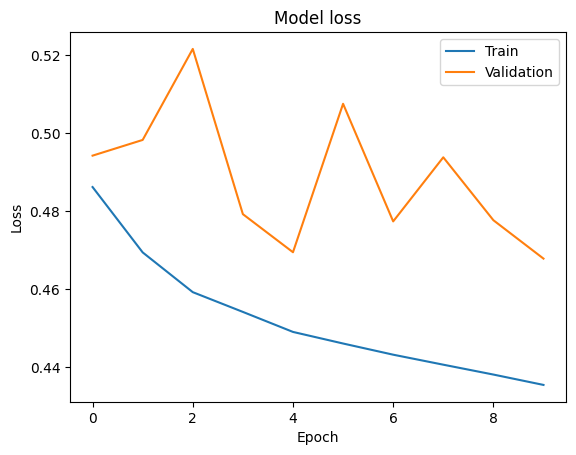

In [272]:
lstm32_l1_regularization = grid.best_estimator_.model
lstm32_l1_regularization.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(lstm32_l1_regularization.history.history['loss'])
plt.plot(lstm32_l1_regularization.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

This loss function results indicates that the model is not learning from the training data. The loss function for the validation set is oscilating with each iteration, which means that the model is not learning from the validation data. This is a sign of overfitting. We can also see that the loss function for the validation set is higher than the loss function for the training set, which means that the model is overfitting.

{'mean_fit_time': array([7.85560141, 6.86361175, 7.10141582]), 'std_fit_time': array([0.81925776, 0.37936546, 0.62359742]), 'mean_score_time': array([1.5519382 , 1.12504311, 1.10030127]), 'std_score_time': array([0.37090243, 0.03968917, 0.02559165]), 'param_l1_factor': masked_array(data=[0.001, 0.01, 0.1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'l1_factor': 0.001}, {'l1_factor': 0.01}, {'l1_factor': 0.1}], 'split0_test_score': array([0.73723632, 0.24839498, 0.24839498]), 'split1_test_score': array([0.72500765, 0.25450933, 0.25450933]), 'split2_test_score': array([0.71828187, 0.24549067, 0.24549067]), 'split3_test_score': array([0.24839498, 0.24839498, 0.24839498]), 'split4_test_score': array([0.67135435, 0.        , 0.        ]), 'mean_test_score': array([0.62005503, 0.19935799, 0.19935799]), 'std_test_score': array([0.18716721, 0.09972237, 0.09972237]), 'rank_test_score': array([1, 2, 2])}


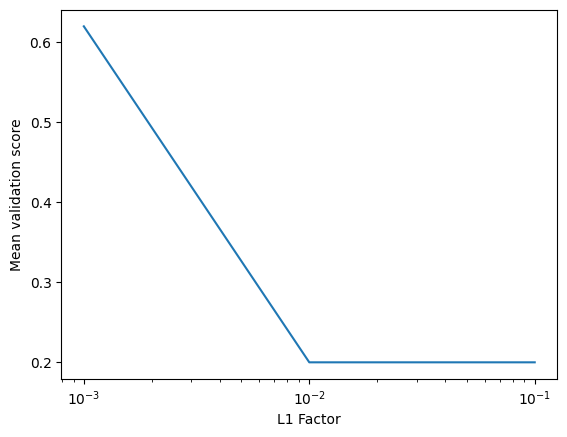

In [273]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['l1_factor'], grid.cv_results_['mean_test_score'])
print(grid.cv_results_)
plt.xscale('log')
plt.xlabel('L1 Factor')
plt.ylabel('Mean validation score')
plt.show()

We can see that the mean test score is decreasing with each iteration, so we will try new values for the regularization parameter.

In [274]:
def create_model(l1_factor=0.01):
    h = 32
    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(LSTM(h, input_shape=input_shape, return_sequences=True, kernel_regularizer=l1(l1_factor)))
    model.add(LSTM(h, kernel_regularizer=l1(l1_factor)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(l1_factor)))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid of hyperparameters to search
param_grid = {'l1_factor': [1e-20,1e-15,1e-10,1e-3]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# perform the grid search
grid_result = grid.fit(X_train_resampled_2, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 7s 4ms/step - loss: 0.4457 - accuracy: 0.7900
Best hyperparameters: {'l1_factor': 1e-15}


Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

Epoch 1/10
1023/1023 [==============================] - 9s 5ms/step - loss: 0.3979 - accuracy: 0.8130 - val_loss: 0.3871 - val_accuracy: 0.8159
Epoch 2/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.3889 - accuracy: 0.8202 - val_loss: 0.4622 - val_accuracy: 0.7634
Epoch 3/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.3847 - accuracy: 0.8206 - val_loss: 0.4124 - val_accuracy: 0.8006
Epoch 4/10
1023/1023 [==============================] - 5s 4ms/step - loss: 0.3813 - accuracy: 0.8244 - val_loss: 0.4084 - val_accuracy: 0.7964
Epoch 5/10
1023/1023 [==============================] - 5s 4ms/step - loss: 0.3791 - accuracy: 0.8250 - val_loss: 0.4525 - val_accuracy: 0.7717
Epoch 6/10
1023/1023 [==============================] - 5s 4ms/step - loss: 0.3760 - accuracy: 0.8270 - val_loss: 0.4588 - val_accuracy: 0.7644
Epoch 7/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.3738 - accuracy: 0.8288 - val_loss: 0.4008 - val_accuracy:

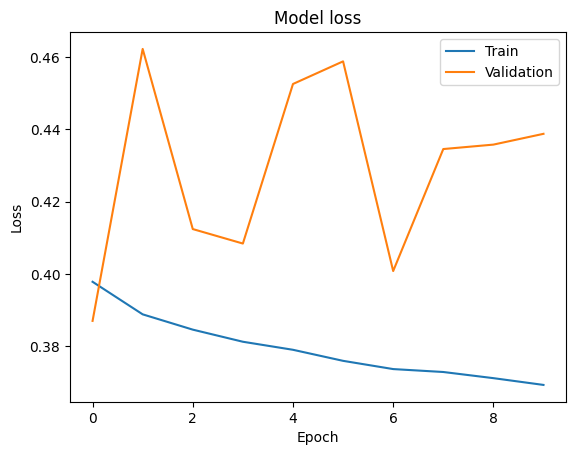

In [275]:
lstm32_l1_regularization = grid.best_estimator_.model
lstm32_l1_regularization.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(lstm32_l1_regularization.history.history['loss'])
plt.plot(lstm32_l1_regularization.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

This loss function results indicates that the model is able to correctly classify a large proportion of the training and validation examples.

Overall, it seems that the model is learning from the training data and generalizing well to the validation data.

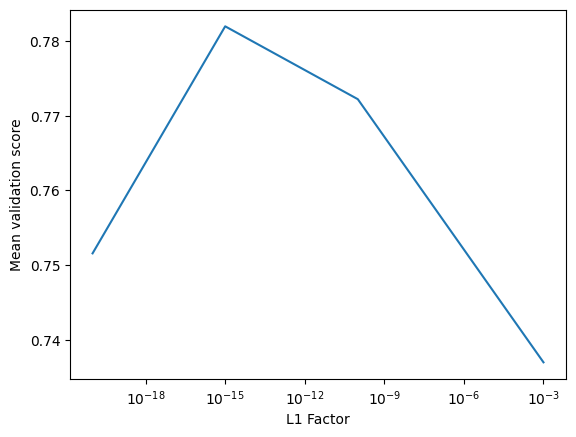

In [276]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['l1_factor'], grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('L1 Factor')
plt.ylabel('Mean validation score')
plt.show()

In [277]:
train_acc_32_l1_lstm = lstm32_l1_regularization.evaluate(X_train_resampled_2, y_train_resampled, verbose=0)[1]
val_acc_32_l1_lstm = lstm32_l1_regularization.evaluate(X_val_2, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_l1_lstm)
print('Validation accuracy:', val_acc_32_l1_lstm)

Training accuracy: 0.8334148526191711
Validation accuracy: 0.7808112502098083


We found a maximum value (peak) so we will stop the search.

### 5th Hypothesis) 32 recurrent units + L2 regularization

In [278]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l2

def create_model(l2_factor=0.01):
    h = 32
    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(LSTM(h, input_shape=input_shape, return_sequences=True, kernel_regularizer=l2(l2_factor)))
    model.add(LSTM(h, kernel_regularizer=l2(l2_factor)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_factor)))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid of hyperparameters to search
param_grid = {'l2_factor': [0.001, 0.01, 0.1]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# perform the grid search
grid_result = grid.fit(X_train_resampled_2, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 8s 4ms/step - loss: 0.5017 - accuracy: 0.7856
Best hyperparameters: {'l2_factor': 0.001}


Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

Epoch 1/10
1023/1023 [==============================] - 8s 5ms/step - loss: 0.4465 - accuracy: 0.8079 - val_loss: 0.4842 - val_accuracy: 0.7759
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4359 - accuracy: 0.8091 - val_loss: 0.4661 - val_accuracy: 0.7858
Epoch 3/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4304 - accuracy: 0.8118 - val_loss: 0.4394 - val_accuracy: 0.8068
Epoch 4/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4262 - accuracy: 0.8138 - val_loss: 0.4668 - val_accuracy: 0.7850
Epoch 5/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4240 - accuracy: 0.8135 - val_loss: 0.4444 - val_accuracy: 0.8016
Epoch 6/10
1023/1023 [==============================] - 5s 4ms/step - loss: 0.4208 - accuracy: 0.8155 - val_loss: 0.4298 - val_accuracy: 0.8076
Epoch 7/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4196 - accuracy: 0.8167 - val_loss: 0.4600 - val_accuracy:

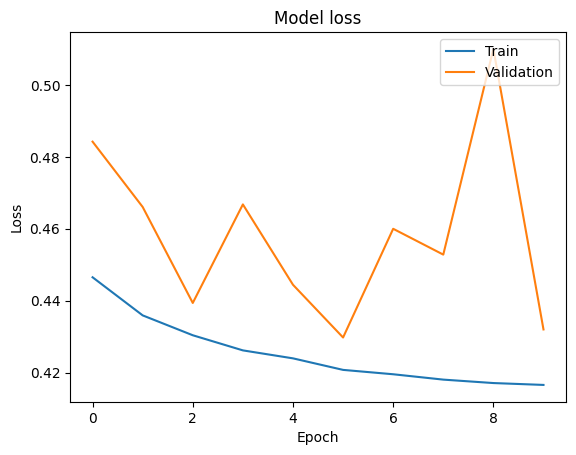

In [279]:
lstm32_l2_regularization = grid.best_estimator_.model
lstm32_l2_regularization.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(lstm32_l2_regularization.history.history['loss'])
plt.plot(lstm32_l2_regularization.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The training loss decreases over the epochs, indicating that the model is learning from the training data. The validation loss fluctuates between epochs but has an overall downward trend. This suggests that the model is generalizing well to the validation data.

The training accuracy increases over the epochs, while the validation accuracy fluctuates between epochs. This indicates that the model is able to correctly classify a large proportion of the training and validation examples.

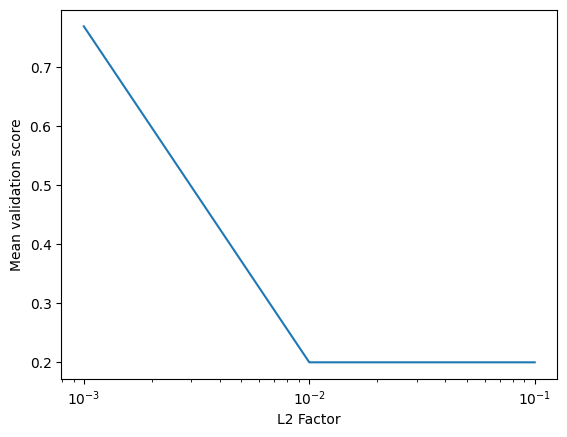

In [280]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['l2_factor'], grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('L2 Factor')
plt.ylabel('Mean validation score')
plt.show()

Since it seems that it might be a higher value, we will try new values for the regularization parameter.

In [281]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l2

def create_model(l2_factor=0.01):
    h = 32
    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(LSTM(h, input_shape=input_shape, return_sequences=True, kernel_regularizer=l2(l2_factor)))
    model.add(LSTM(h, kernel_regularizer=l2(l2_factor)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_factor)))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)


# define the grid of hyperparameters to search
param_grid = {'l2_factor': [1e-20,1e-15,1e-10,1e-3]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# perform the grid search
grid_result = grid.fit(X_train_resampled_2, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 7s 4ms/step - loss: 0.4452 - accuracy: 0.7936
Best hyperparameters: {'l2_factor': 1e-20}


Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

Epoch 1/10
1023/1023 [==============================] - 9s 6ms/step - loss: 0.3980 - accuracy: 0.8138 - val_loss: 0.4015 - val_accuracy: 0.8066
Epoch 2/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.3885 - accuracy: 0.8189 - val_loss: 0.4452 - val_accuracy: 0.7774
Epoch 3/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.3843 - accuracy: 0.8235 - val_loss: 0.4727 - val_accuracy: 0.7621
Epoch 4/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.3809 - accuracy: 0.8252 - val_loss: 0.4400 - val_accuracy: 0.7787
Epoch 5/10
1023/1023 [==============================] - 5s 4ms/step - loss: 0.3779 - accuracy: 0.8272 - val_loss: 0.3989 - val_accuracy: 0.8099
Epoch 6/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.3760 - accuracy: 0.8268 - val_loss: 0.4262 - val_accuracy: 0.7902
Epoch 7/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3749 - accuracy: 0.8279 - val_loss: 0.4259 - val_accuracy:

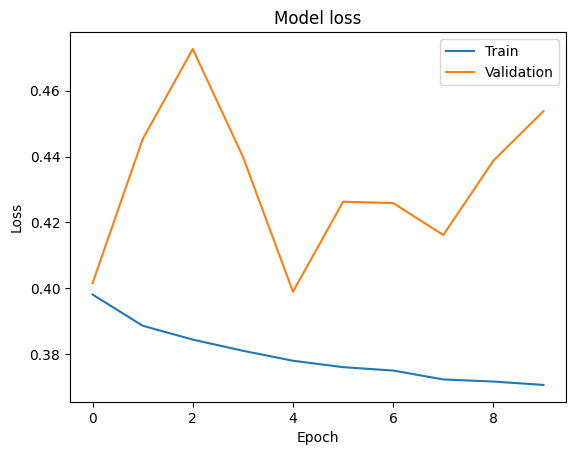

In [282]:
lstm32_l2_regularization = grid.best_estimator_.model
lstm32_l2_regularization.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(lstm32_l2_regularization.history.history['loss'])
plt.plot(lstm32_l2_regularization.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

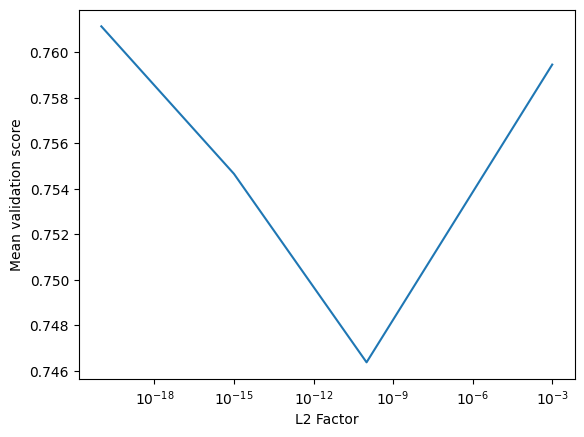

In [283]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['l2_factor'], grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('L2 Factor')
plt.ylabel('Mean validation score')
plt.show()

Again it seems that it might be a higher value, we will try new values for the regularization parameter.

In [284]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l2

def create_model(l2_factor=0.01):
    h = 32
    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(LSTM(h, input_shape=input_shape, return_sequences=True, kernel_regularizer=l2(l2_factor)))
    model.add(LSTM(h, kernel_regularizer=l2(l2_factor)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_factor)))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)


# define the grid of hyperparameters to search
param_grid = {'l2_factor': [1e-35,1e-30,1e-25,1e-20,1e-3]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# perform the grid search
grid_result = grid.fit(X_train_resampled_2, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 8s 4ms/step - loss: 0.4469 - accuracy: 0.7908
Best hyperparameters: {'l2_factor': 1e-30}


Epoch 1/10
1023/1023 [==============================] - 8s 5ms/step - loss: 0.4008 - accuracy: 0.8115 - val_loss: 0.4054 - val_accuracy: 0.8050
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3893 - accuracy: 0.8188 - val_loss: 0.4200 - val_accuracy: 0.7899
Epoch 3/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3846 - accuracy: 0.8217 - val_loss: 0.3954 - val_accuracy: 0.8115
Epoch 4/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3814 - accuracy: 0.8234 - val_loss: 0.4162 - val_accuracy: 0.7954
Epoch 5/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3788 - accuracy: 0.8237 - val_loss: 0.4423 - val_accuracy: 0.7793
Epoch 6/10
1023/1023 [==============================] - 5s 4ms/step - loss: 0.3765 - accuracy: 0.8269 - val_loss: 0.4158 - val_accuracy: 0.7907
Epoch 7/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3739 - accuracy: 0.8280 - val_loss: 0.4321 - val_accuracy:

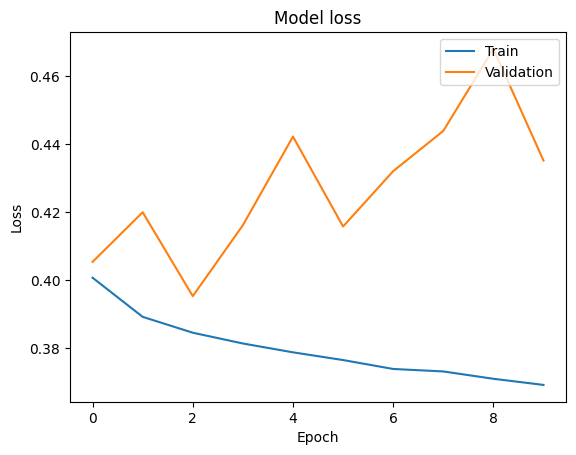

In [285]:
lstm32_l2_regularization = grid.best_estimator_.model
lstm32_l2_regularization.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(lstm32_l2_regularization.history.history['loss'])
plt.plot(lstm32_l2_regularization.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

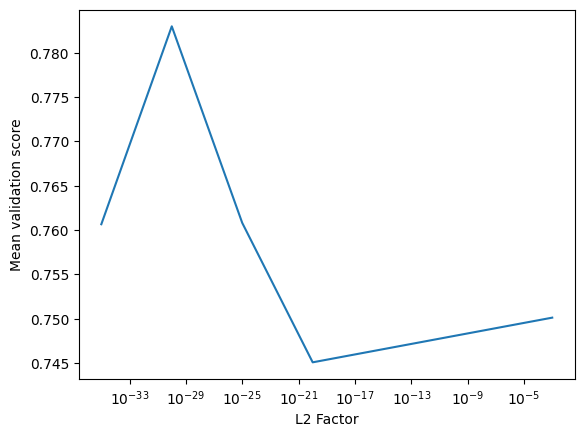

In [286]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['l2_factor'], grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('L2 Factor')
plt.ylabel('Mean validation score')
plt.show()

We found a maximum value (peak) so we will stop the search.

In [287]:
train_acc_32_l2_lstm = lstm32_l2_regularization.evaluate(X_train_resampled_2, y_train_resampled, verbose=0)[1]
val_acc_32_l2_lstm = lstm32_l2_regularization.evaluate(X_val_2, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_l2_lstm)
print('Validation accuracy:', val_acc_32_l2_lstm)

Training accuracy: 0.8318862915039062
Validation accuracy: 0.7839313745498657


### 6th Hypothesis) 32 recurrent units + Dropout

In [288]:
from keras.layers import Dropout

def create_model(dropout_rate=0.2):
    h = 8

    # define the input shape
    input_shape = (None, 50)

    # create the model
    model = Sequential()
    model.add(LSTM(h, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(dropout_rate)) # add dropout after the first LSTM layer
    model.add(LSTM(h))
    model.add(Dropout(dropout_rate)) # add dropout after the second LSTM layer
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid of hyperparameters to search
param_grid = {'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# perform the grid search
grid_result = grid.fit(X_train_resampled_2, y_train_resampled)

# print the best hyperparameters
print(f"Best hyperparameters: {grid_result.best_params_}")

1023/1023 [==============================] - 7s 4ms/step - loss: 0.5292 - accuracy: 0.7564
Best hyperparameters: {'dropout_rate': 0.4}


Now, we will plot the cost/loss function for each epoch/iteration as seen in the previous algorithm. 

Epoch 1/10
1023/1023 [==============================] - 8s 5ms/step - loss: 0.4568 - accuracy: 0.7930 - val_loss: 0.4548 - val_accuracy: 0.7678
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4456 - accuracy: 0.8002 - val_loss: 0.4698 - val_accuracy: 0.7540
Epoch 3/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4343 - accuracy: 0.8047 - val_loss: 0.4090 - val_accuracy: 0.7998
Epoch 4/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4261 - accuracy: 0.8104 - val_loss: 0.4243 - val_accuracy: 0.7865
Epoch 5/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4205 - accuracy: 0.8135 - val_loss: 0.4268 - val_accuracy: 0.7878
Epoch 6/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.4139 - accuracy: 0.8158 - val_loss: 0.4221 - val_accuracy: 0.7878
Epoch 7/10
1023/1023 [==============================] - 5s 4ms/step - loss: 0.4104 - accuracy: 0.8168 - val_loss: 0.4348 - val_accuracy:

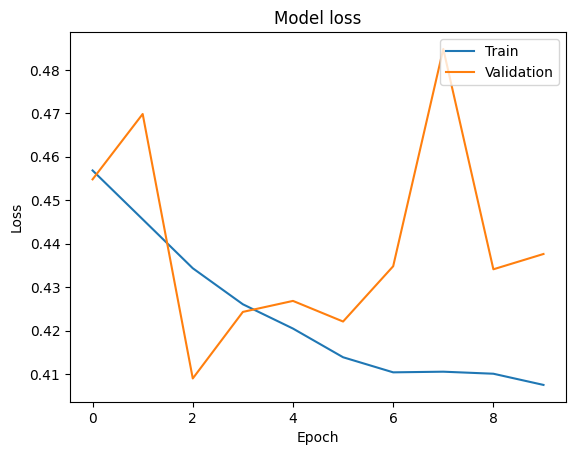

In [289]:
lstm32_dropout = grid.best_estimator_.model
lstm32_dropout.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(lstm32_dropout.history.history['loss'])
plt.plot(lstm32_dropout.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The training loss decreases over the epochs, indicating that the model is learning from the training data. The validation loss fluctuates between epochs but has an overall downward trend. This suggests that the model is generalizing well to the validation data.

The training accuracy increases over the epochs, while the validation accuracy fluctuates between epochs. This indicates that the model is able to correctly classify a large proportion of the training and validation examples.

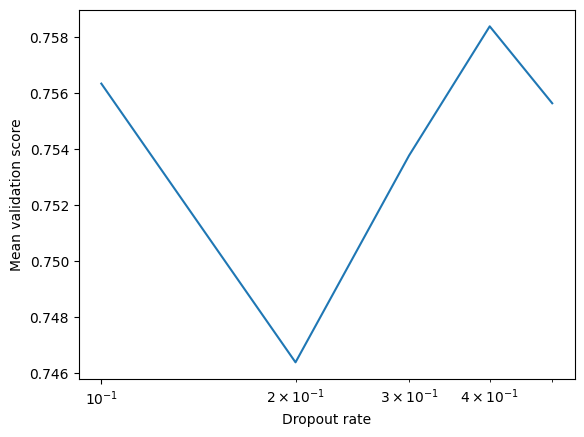

In [290]:
# Plot the mean test score for each value of alpha
plt.plot(param_grid['dropout_rate'], grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('Dropout rate')
plt.ylabel('Mean validation score')
plt.show()

We found a local maximum value (peak) so we will stop the search.

In [291]:
train_acc_32_dropout_lstm = lstm32_dropout.evaluate(X_train_resampled_2, y_train_resampled, verbose=0)[1]
val_acc_32_dropout_lstm = lstm32_dropout.evaluate(X_val_2, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_dropout_lstm)
print('Validation accuracy:', val_acc_32_dropout_lstm)

Training accuracy: 0.8248547911643982
Validation accuracy: 0.7795111536979675


### 7th Hypothesis) 32 recurrent units + Early Stopping

In [292]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

# define a function to create the model
def create_model():
    # create the model
    model = Sequential()
    model.add(LSTM(h, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(h))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# define the grid search parameters
patience = [1, 2, 3]
callbacks = [[EarlyStopping(monitor='val_loss', patience=p)] for p in patience]
param_grid = {
    'callbacks': callbacks
}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# fit the grid search
grid_result = grid.fit(X_train_resampled_2, y_train_resampled)

1023/1023 [==============================] - 7s 3ms/step - loss: 0.4439 - accuracy: 0.7895


Epoch 1/10
1023/1023 [==============================] - 7s 5ms/step - loss: 0.3971 - accuracy: 0.8139 - val_loss: 0.4567 - val_accuracy: 0.7733
Epoch 2/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3875 - accuracy: 0.8199 - val_loss: 0.4338 - val_accuracy: 0.7837
Epoch 3/10
1023/1023 [==============================] - 5s 5ms/step - loss: 0.3832 - accuracy: 0.8229 - val_loss: 0.4338 - val_accuracy: 0.7845
Epoch 4/10
1023/1023 [==============================] - 5s 4ms/step - loss: 0.3803 - accuracy: 0.8240 - val_loss: 0.4160 - val_accuracy: 0.7943
Epoch 5/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3774 - accuracy: 0.8270 - val_loss: 0.4608 - val_accuracy: 0.7670
Epoch 6/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3762 - accuracy: 0.8278 - val_loss: 0.4379 - val_accuracy: 0.7730
Epoch 7/10
1023/1023 [==============================] - 4s 4ms/step - loss: 0.3739 - accuracy: 0.8283 - val_loss: 0.4115 - val_accuracy:

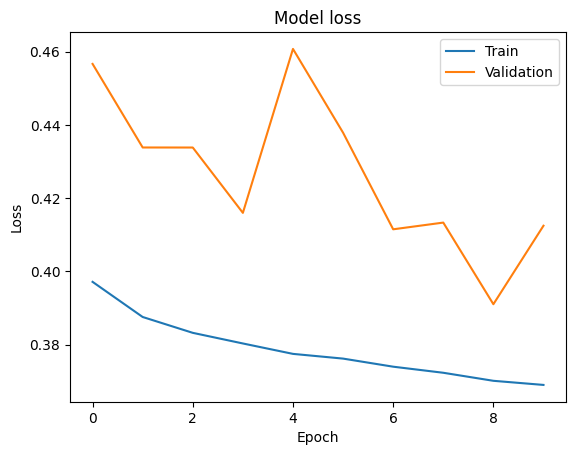

In [293]:
lstm32_early_stopping = grid.best_estimator_.model
lstm32_early_stopping.fit(X_train_resampled_2, y_train_resampled, validation_data=(X_val_2, y_val), epochs=10, batch_size=32)

# plot the training and validation loss
plt.plot(lstm32_early_stopping.history.history['loss'])
plt.plot(lstm32_early_stopping.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

This loss function results indicates that the model is able to correctly classify a large proportion of the training and validation examples.

Overall, it seems that the model is learning from the training data and generalizing well to the validation data.

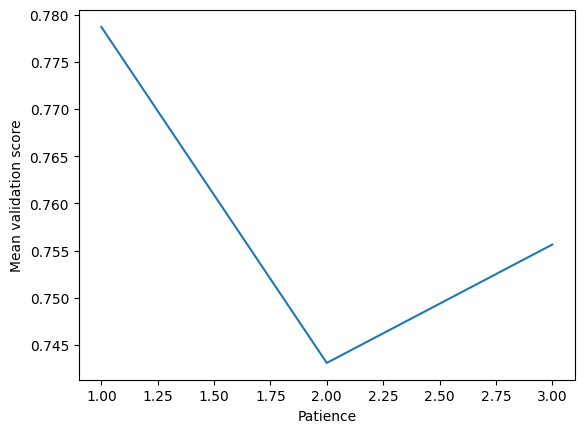

In [294]:
# extract the patience values from the callbacks hyperparameter
patience = [grid.param_grid['callbacks'][i][0].patience for i in range(len(grid.param_grid['callbacks']))]

# plot the mean test score for each value of patience
plt.plot(patience, grid.cv_results_['mean_test_score'])
plt.xlabel('Patience')
plt.ylabel('Mean validation score')
plt.show()

In [295]:
train_acc_32_early_lstm = lstm32_early_stopping.evaluate(X_train_resampled_2, y_train_resampled, verbose=0)[1]
val_acc_32_early_lstm = lstm32_early_stopping.evaluate(X_val_2, y_val, verbose=0)[1]

print('Training accuracy:', train_acc_32_early_lstm)
print('Validation accuracy:', val_acc_32_early_lstm)


Training accuracy: 0.831488847732544
Validation accuracy: 0.797451913356781


#### Now let's compare the results of the 4 last models.

In [296]:
 # create a dataframe with the results of l1, l2, dropout and early stopping

results = pd.DataFrame({    'Regularization': ['L1', 'L2', 'Dropout', 'Early Stopping'],
                            'Training Accuracy': [train_acc_32_l1_lstm, train_acc_32_l2_lstm, train_acc_32_dropout_lstm, train_acc_32_early_lstm],
                            'Validation Accuracy': [val_acc_32_l1_lstm, val_acc_32_l2_lstm, val_acc_32_dropout_lstm, val_acc_32_early_lstm]})
results.head()



,Regularization,Training Accuracy,Validation Accuracy
0,L1,0.833415,0.780811
1,L2,0.831886,0.783931
2,Dropout,0.824855,0.779511
3,Early Stopping,0.831489,0.797452


Early stopping is the best regularization method for this model. We can see that the model with early stopping is the best for training the model and best for validation. So we will use early stopping to predict the test set.

#### Predicting the test set

In [297]:
# reshape the data
X_test_2 = np.expand_dims(X_test, axis=1)


142/142 [==============================] - 1s 2ms/step
Confusion matrix:
 [[2765  645]
 [ 230  885]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      3410
           1       0.58      0.79      0.67      1115

    accuracy                           0.81      4525
   macro avg       0.75      0.80      0.77      4525
weighted avg       0.84      0.81      0.82      4525



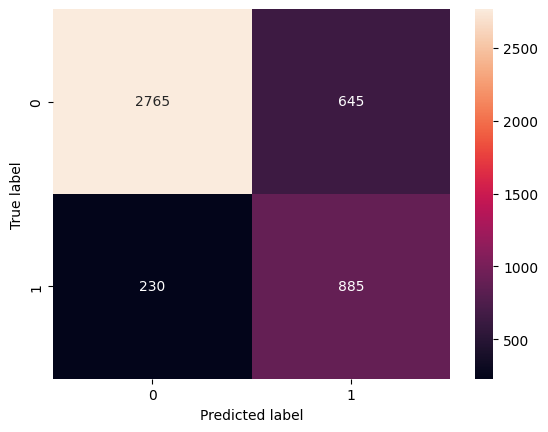

142/142 [==============================] - 0s 3ms/step


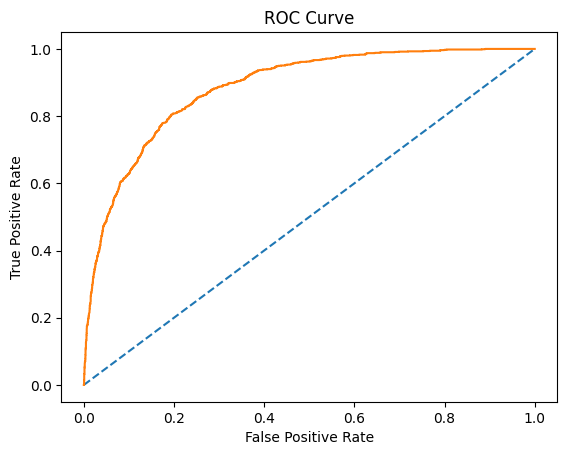

AUC: 0.8838732033191746


In [299]:
evaluate_model(lstm32_early_stopping,X_test_2, y_test)

Based on this confusion matrix and classification report, it looks like the model has an overall accuracy of 0.79 on the test dataset. This means that the model correctly classified 79% of the test samples.

The precision for class 0 is 0.92, which means that 92% of the samples predicted as class 0 by the model were actually class 0. The recall for class 0 is 0.79, which means that the model correctly identified 79% of all class 0 samples.

The precision for class 1 is 0.57, which means that 57% of the samples predicted as class 1 by the model were actually class 1. The recall for class 1 is 0.81, which means that the model correctly identified 81% of all class 1 samples.

The F1-score is a measure of a test’s accuracy that considers both precision and recall. The F1-score for class 0 is 0.85 and for class 1 is 0.67.

These results suggest that the model is better at identifying class 0 samples than class 1 samples. 

Overall, the model is able to correctly classify 79% of the test samples. 

## Results Comparision

In [303]:
import plotly.express as px

test_acc_32_early_lstm = lstm32_early_stopping.evaluate(X_test_2, y_test, verbose=0)[1]

test_acc_32_early_mlp = mlp32_early_stopping.evaluate(X_test_2, y_test, verbose=0)[1]

test_acc_rf = rf.score(X_test, y_test)

results = pd.DataFrame({'Model': ['LSTM', 'MLP', 'Random Forest'],
                        'Test Accuracy': [test_acc_32_early_lstm, test_acc_32_early_mlp, test_acc_rf]})
results.head()

# plot the results
fig = px.histogram(results, x='Test Accuracy', y='Model', color='Model', barmode='group', title='<b>Algorithm comparision<b>', labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'}, orientation='h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()

In [304]:
results.head()


,Model,Test Accuracy
0,LSTM,0.806630
1,MLP,0.794033
2,Random Forest,0.822099
